In [1]:
##~working~##histogram Loading ##

%matplotlib ipympl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import matplotlib.colors as mcolors
import os
datapick = 6
figsize = (10, 7)
# Initialize the filename variable
filename = ''

if datapick == 1:
    filename = '/tmp/icpy/icpy/histogram_data_10000.npz'  # 10000 x 10000
elif datapick == 2:
    filename = '/tmp/icpy/icpy/histogram_data_100_bins.npz'  # 100 bins
elif datapick == 3:
    filename = '/tmp/icpy/icpy/histogram_data_162_bins.npz'  # 162 bins
elif datapick == 4:
    filename = '/tmp/icpy/icpy/histogram_data_162x35y_bins.npz'  # 162 x 35 bins
elif datapick == 5:
    filename = '/tmp/icpy/icpy/histogram_data_10000_bins_max35ts.npz'  # 10000 x 10000 bins max 35 ts 
elif datapick == 6:
    filename = '/tmp/icpy/icpy/histogram_data_1000_bins.npz'  # 9720 x 3500 bins
elif datapick == 7:
    filename = '/tmp/icpy/icpy/histogram_data_variable_bins_10000_ts.npz'  # 9720 x 3500 bins
elif datapick == 8:
    filename = '/tmp/icpy/icpy/histogram_data_variable_bins_1000_ts.npz'  # 9720 x 3500 bins
else: # choose 0 
    filename = '/tmp/icpy/icpy/histogram_data_9720x3500y_bins.npz'  # 9720 x 3500 bins

# Load the data from the determined filename
data = np.load(filename)
declinations = [42]
declinations_str = ', '.join(map(str, declinations))
# Print the datapick and the filename
print(f"Data pick = {datapick}")
print(f"Loading file: {filename}")

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Verify the data
print(histogram_2d)
print(x_edges)
print(y_edges)
print(f"Histogram 2D Shape: {histogram_2d.shape}")
print(f"X edges (Declination): {x_edges[0]} to {x_edges[-1]}")
print(f"Y edges (Hat_TS): {y_edges[0]} to {y_edges[-1]}")
print(f"Histogram Data Sum: {np.sum(histogram_2d)}")

# Print the contents of the file
print("Contents of the .npz file:")
for key in data.files:
    print(f"Key: {key}")
    print(f"Shape: {data[key].shape}")
    print(f"Data:\n{data[key]}\n")

# Define the directory where you want to save the plots
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# def save_plot(fig, ax):
#     """
#     Save the given figure to the specified directory, using the title as the filename.

#     Parameters:
#     - fig: The matplotlib figure object to be saved.
#     - ax: The matplotlib axes object where the plot is drawn.
#     """
#     # Extract the title from the plot
#     title = ax.get_title()
    
#     # Create a valid filename from the title
#     # Replace spaces and special characters with underscores
#     filename = title.replace(' ', '_').replace('/', '_') + '.png'
    
#     # Full path for the file
#     filepath = os.path.join(save_dir, filename)
    
#     # Save the plot
#     fig.savefig(filepath)
#     print(f"Plot saved as {filepath}")

Data pick = 6
Loading file: /tmp/icpy/icpy/histogram_data_1000_bins.npz
[[ 41677.    815.    858. ...      0.      0.      0.]
 [ 43503.    870.    878. ...      0.      0.      0.]
 [ 45868.    836.    773. ...      0.      0.      0.]
 ...
 [157893.   4257.   4239. ...      0.      0.      0.]
 [163903.   4355.   4260. ...      0.      0.      0.]
 [167084.   4291.   3949. ...      0.      0.      0.]]
[-81.    -80.838 -80.676 ...  80.676  80.838  81.   ]
[ 0.     0.035  0.07  ... 34.93  34.965 35.   ]
Histogram 2D Shape: (1000, 1000)
X edges (Declination): -81.0 to 81.0
Y edges (Hat_TS): 0.0 to 35.0
Histogram Data Sum: 232482600.0
Contents of the .npz file:
Key: histogram_2d
Shape: (1000, 1000)
Data:
[[ 41677.    815.    858. ...      0.      0.      0.]
 [ 43503.    870.    878. ...      0.      0.      0.]
 [ 45868.    836.    773. ...      0.      0.      0.]
 ...
 [157893.   4257.   4239. ...      0.      0.      0.]
 [163903.   4355.   4260. ...      0.      0.      0.]
 [16708

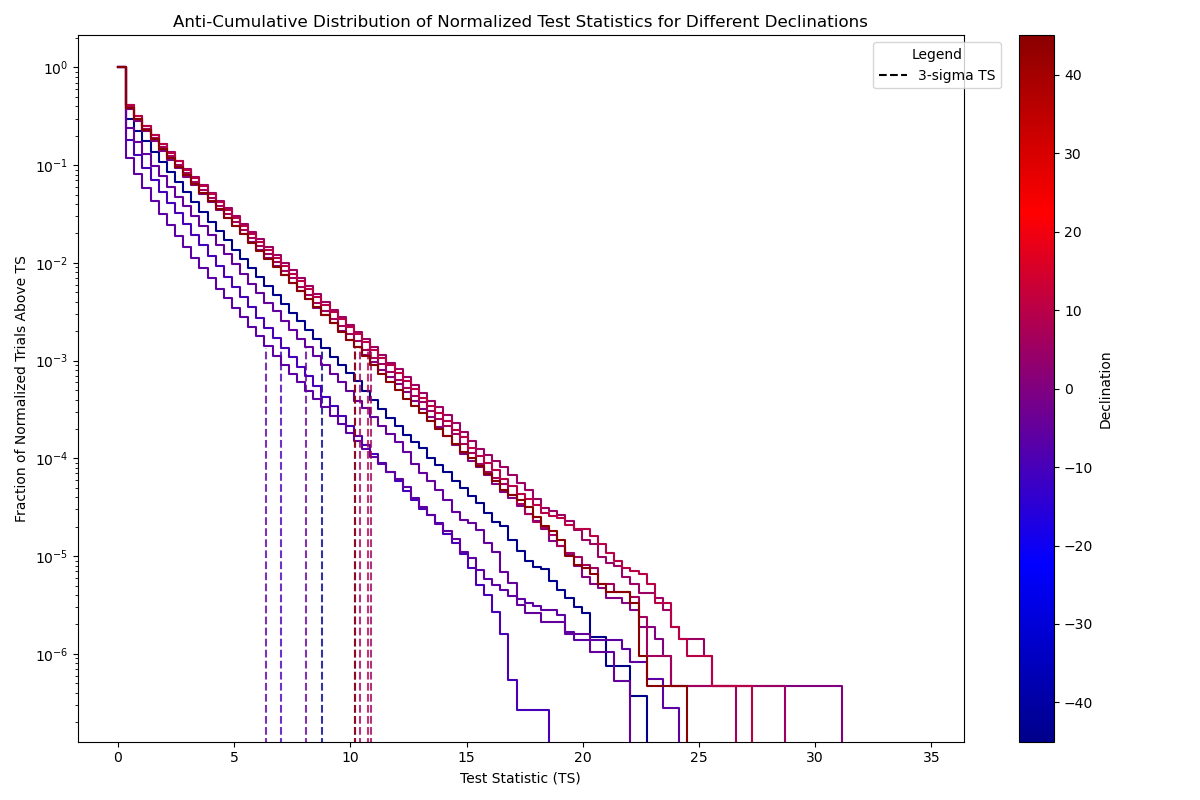

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import chi2


# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']
# Create a function to find the critical TS value for a given cumulative distribution

def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    #print(f"Total Trials: {total_trials}, p_value * total_trials: {target}")
    
    # Check if the target value is within the range of the cumulative distribution
    if target > cumulative_distribution[0] or target < cumulative_distribution[-1]:
        #print("Target is out of the range of the cumulative distribution.")
        return y_edges[-1] if target < cumulative_distribution[-1] else y_edges[0]
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    #print(f"Critical Index: {critical_index}, Interpolated Critical Value: {critical_value}")
    return critical_value
    
# Define specific declination values (in degrees)
declinations = [-45, -10, -6, -5, 0, 5, 6, 10, 45]

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-45, vmax=45)

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the anti-cumulative distributions and 3-sigma TS lines
for decl in declinations:
    color = cmap(norm(decl))
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Plot the anti-cumulative distribution
        ax.plot(y_edges[:-1], fraction_above_ts_norm, drawstyle='steps-post', color=color)

        # Calculate the intersection for 3-sigma TS lines
        y_critical = np.interp(empirical_critical_value, y_edges[:-1], fraction_above_ts_norm)
        
        # Plot vertical line up to the intersection point
        ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color=color, linestyle='--', alpha=0.8)

        # Plot horizontal line with transparency from y-axis to the intersection point
        ax.plot([0, empirical_critical_value], [y_critical, y_critical], color=color, linestyle='--', alpha=0)

# Create a single legend entry for the 3-sigma TS lines
sigma_line = plt.Line2D([0], [0], color='black', linestyle='--')
ax.legend([sigma_line], ['3-sigma TS'], loc='upper right', bbox_to_anchor=(1.05, 1), title='Legend')

# Add the colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Declination')

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Anti-Cumulative Distribution of Normalized Test Statistics for Different Declinations')
ax.set_yscale('log')
ax.grid(False)
plt.tight_layout()
plt.show()


At a declination of [-74]
χ²(df=2.00±0.00)
3-sigma uncertainty: Lower=8.36, Upper=8.36
4-sigma uncertainty: Lower=15.54, Upper=15.54
4.5-sigma uncertainty: Lower=19.32, Upper=19.32


/tmp/ipykernel_9690/2986737203.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Legend')


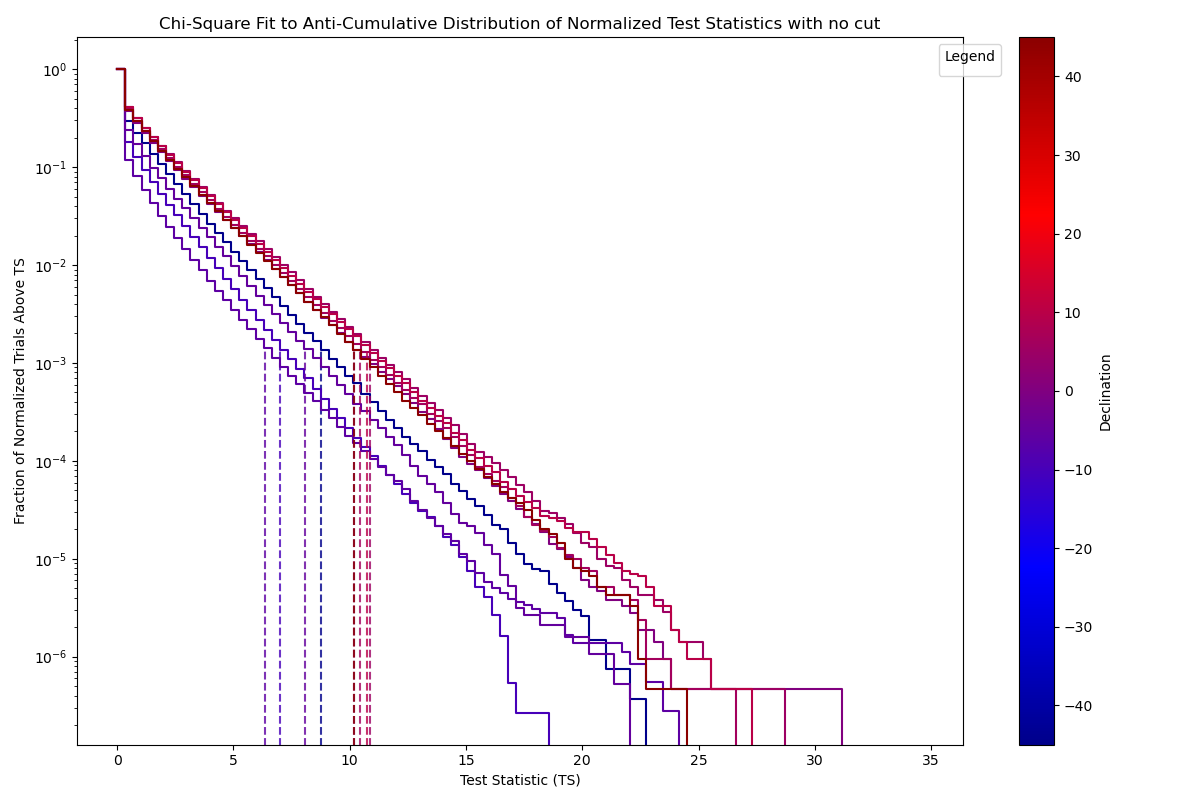

In [12]:
import numpy as np
from scipy.stats import chi2
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Create a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value  

# Define specific declination values (in degrees)
declinations = [-74]

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Initialize a dictionary to store uncertainties for each sigma level
uncertainties_by_sigma = {3: [], 4: [], 4.5: []}

# Process the data for the specified declinations
for decl in declinations:
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        # Apply spline smoothing
        spline_smoothing_factor = 0.1  # Adjust this value to control the smoothing level
        spline = UnivariateSpline(y_edges[:-1], fraction_above_ts_norm, s=spline_smoothing_factor)
        smoothed_y_data = spline(y_edges[:-1])

        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = smoothed_y_data > 0
        x_data_valid = y_edges[:-1][valid_data_mask]
        y_data_valid = smoothed_y_data[valid_data_mask]

        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom

        # Process the empirical and theoretical critical values for 3, 4, and 4.5 sigma
        for sigma, p_value in [(3, 0.0027/2), (4, 6.33425e-5/2), (4.5, 3.3976731e-6/2)]:
            empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, p_value, y_edges[:-1])
            
            # Calculate the chi-squared critical value
            critical_ts_chi2 = chi2.ppf(1 - p_value, df)
            
            # Calculate the number of TS values above the empirical critical value
            N_2 = np.sum(histogram_2d[idx, :] >= empirical_critical_value)
            N = total_counts
            
            # Calculate the uncertainties
            plus_var = np.sqrt(N_2) / N if N_2 > 0 else 0
            minus_var = np.sqrt(N_2) / N if N_2 > 0 else 0
            
            # Calculate lower and upper uncertainties
            lower_uncertainty = empirical_critical_value - minus_var
            upper_uncertainty = empirical_critical_value + plus_var
            
            # Store the uncertainties in the dictionary
            uncertainties_by_sigma[sigma] = (lower_uncertainty, upper_uncertainty)

# Print results
print('At a declination of', declinations)
print(f'\u03C7²(df={df:.2f}±{df_err:.2f})')

for sigma, (lower_uncertainty, upper_uncertainty) in uncertainties_by_sigma.items():
    print(f'{sigma}-sigma uncertainty: Lower={lower_uncertainty:.2f}, Upper={upper_uncertainty:.2f}')
# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Square Fit to Anti-Cumulative Distribution of Normalized Test Statistics with no cut')
ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Legend')
ax.grid(False)
plt.tight_layout()

# Display the plot
plt.show()

Results for mu = 0.1
 Declination          N        N_2    Empirical TS    Uncertainty (+/-)
------------------------------------------------------------
         -45  795669.00      46.00         10.8340               0.0000
         -10  675052.00      42.00          9.6228               0.0000
          -6  425906.00      41.00         10.0481               0.0000
          -5  459820.00      40.00         10.4823               0.0000
           0  794114.00      48.00         12.1528               0.0000
           5  871853.00      51.00         12.6089               0.0000
           6  832189.00      49.00         12.2476               0.0000
          10  867604.00      48.00         12.4626               0.0000
          45  814747.00      49.00         11.8572               0.0000


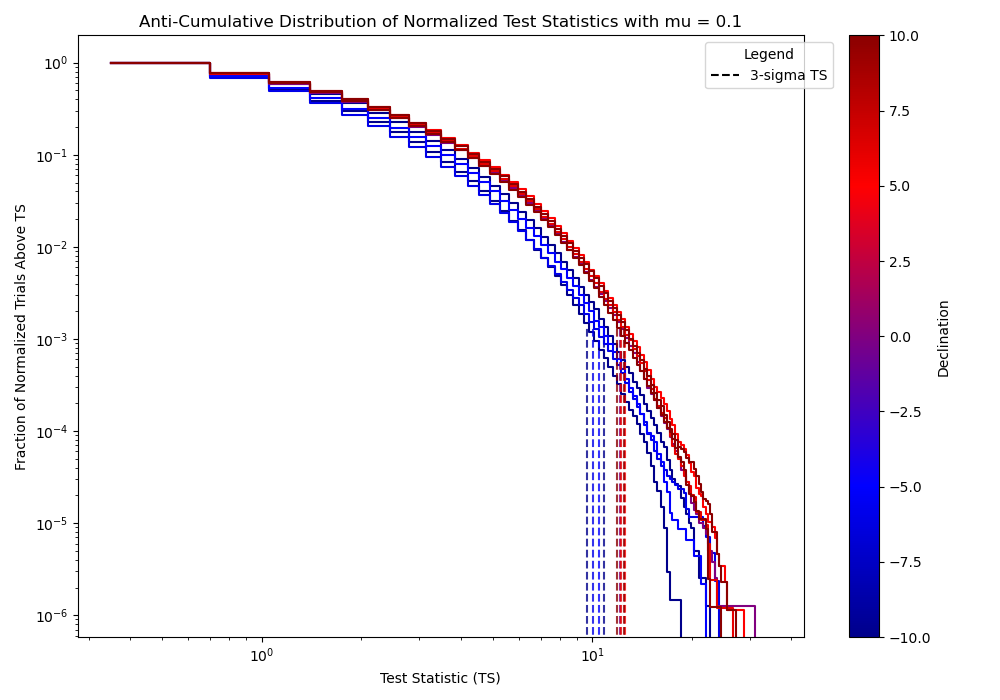


------------------------------------------------------------

Results for mu = 0.5
 Declination          N        N_2    Empirical TS    Uncertainty (+/-)
------------------------------------------------------------
         -45  604631.00      45.00         11.3068               0.0000
         -10  470776.00      41.00         10.1540               0.0000
          -6  289878.00      40.00         10.7767               0.0000
          -5  328840.00      39.00         11.0626               0.0000
           0  600312.00      47.00         12.6206               0.0000
           5  673117.00      50.00         13.1212               0.0000
           6  634663.00      48.00         12.7994               0.0000
          10  668616.00      47.00         12.9001               0.0000
          45  622293.00      46.00         12.3218               0.0000


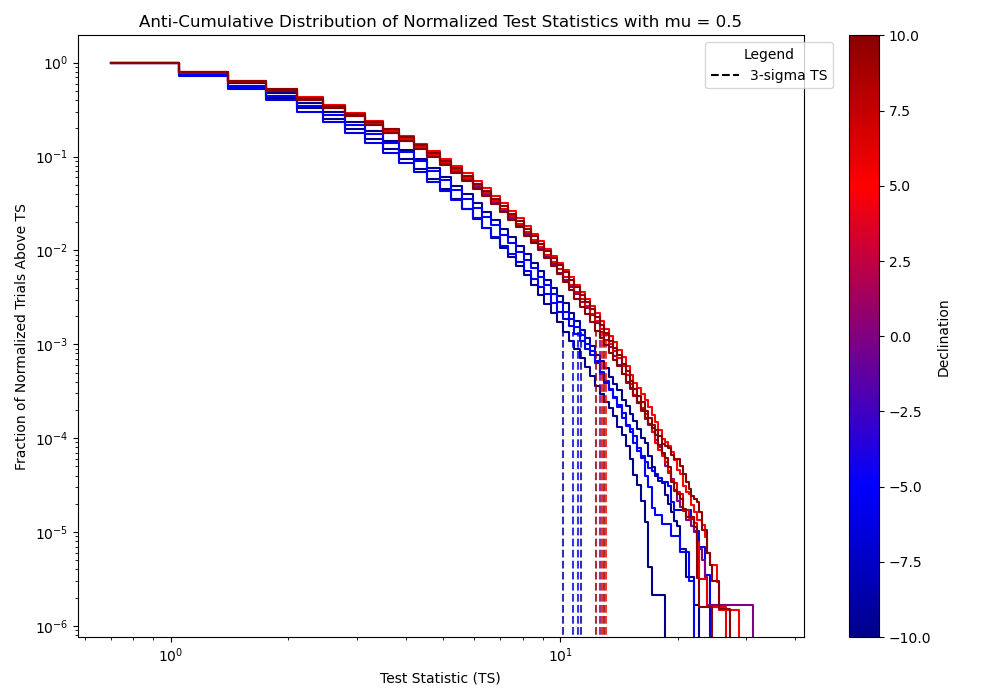


------------------------------------------------------------

Results for mu = 1
 Declination          N        N_2    Empirical TS    Uncertainty (+/-)
------------------------------------------------------------
         -45  471946.00      44.00         11.7301               0.0000
         -10  345654.00      40.00         10.6598               0.0000
          -6  208138.00      38.00         11.4063               0.0001
          -5  245521.00      38.00         11.5654               0.0001
           0  470003.00      46.00         13.0725               0.0000
           5  535555.00      49.00         13.6114               0.0000
           6  500002.00      47.00         13.2300               0.0000
          10  531484.00      46.00         13.3350               0.0000
          45  490549.00      45.00         12.8161               0.0000


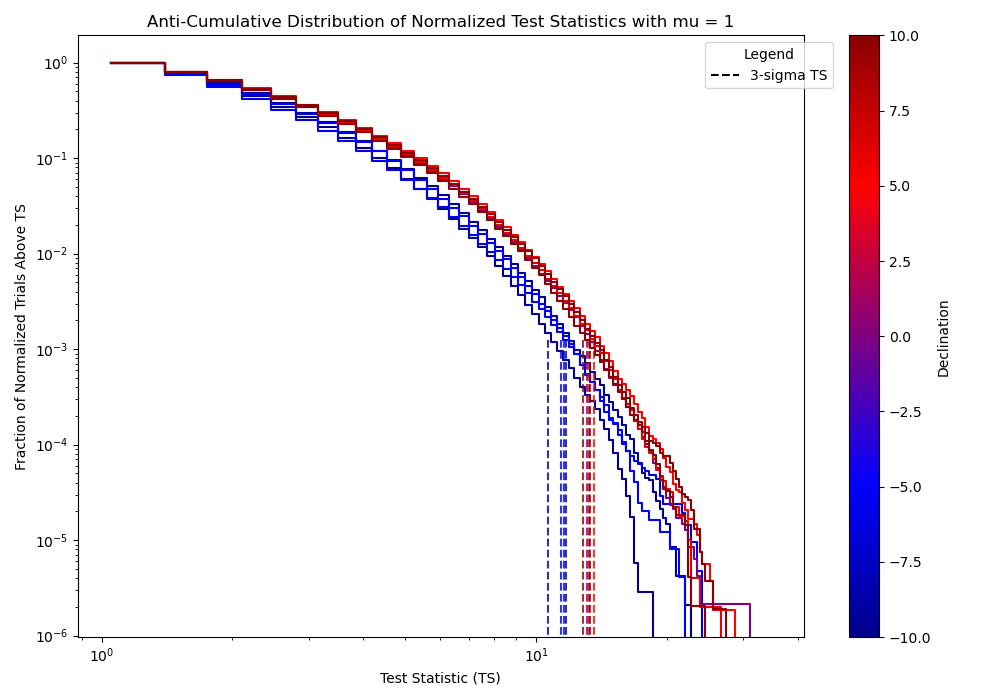


------------------------------------------------------------

Results for mu = 2
 Declination          N        N_2    Empirical TS    Uncertainty (+/-)
------------------------------------------------------------
         -45  227250.00      41.00         13.1235               0.0001
         -10  153890.00      35.00         11.9763               0.0001
          -6   87260.00      34.00         12.8900               0.0001
          -5  114432.00      35.00         12.7328               0.0001
           0  242583.00      41.00         14.1548               0.0001
           5  287547.00      46.00         14.7473               0.0000
           6  262779.00      44.00         14.4410               0.0001
          10  283985.00      43.00         14.5034               0.0000
          45  251923.00      41.00         14.1217               0.0001


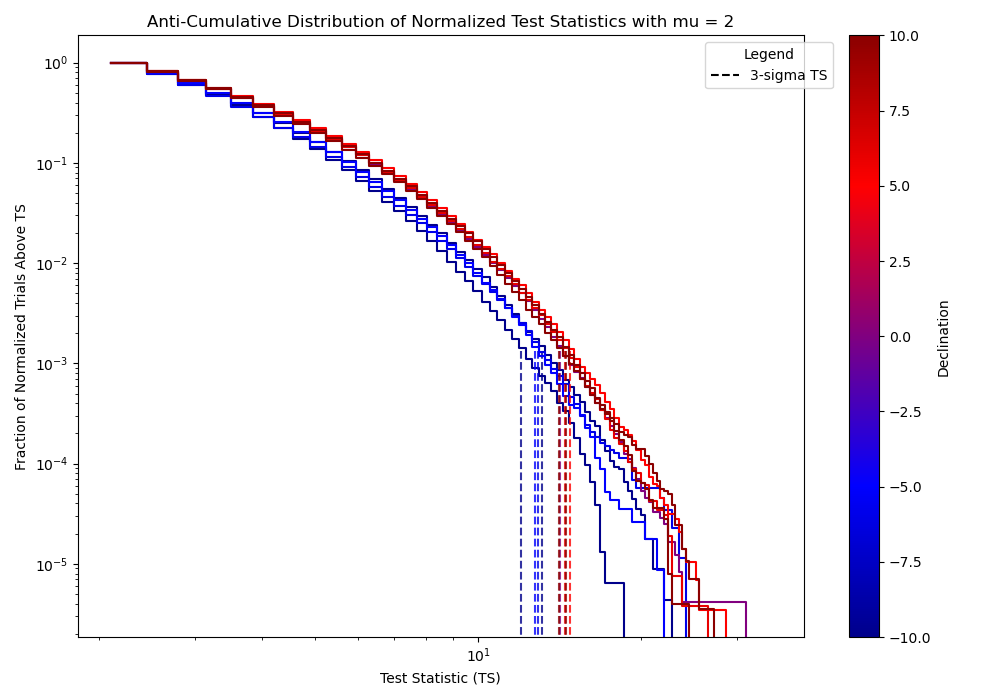


------------------------------------------------------------



In [13]:
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Define specific declination values (in degrees)
declinations = [-45, -10, -6, -5, 0, 5, 6, 10, 45]

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-10, vmax=10)
# Define different mu values
mu_values = [0.1, 0.5, 1, 2]

# Loop through each mu value
for mu in mu_values:
    # Initialize lists for uncertainties
    uncertainty_lower = []
    uncertainty_upper = []

    # Create subplots for each mu value
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Print a header for the current mu value
    print(f"Results for mu = {mu}")
    print(f"{'Declination':>12} {'N':>10} {'N_2':>10} {'Empirical TS':>15} {'Uncertainty (+/-)':>20}")
    print("-" * 60)
    
    # Plot the anti-cumulative distributions and 3-sigma TS lines
    for decl in declinations:
        color = cmap(norm(decl))
        
        # Find index and plot
        idx = np.abs(x_edges - decl).argmin()
        total_counts = np.sum(histogram_2d[idx, :])
        if total_counts > 0:
            # Filter the data based on mu
            valid_indices = y_edges[:-1] >= mu
            filtered_y_edges = y_edges[:-1][valid_indices]
            filtered_histogram = histogram_2d[idx, :][valid_indices]
            
            total_counts_filtered = np.sum(filtered_histogram)
            if total_counts_filtered > 0:
                normalized_histogram = filtered_histogram / total_counts_filtered
                cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
                total_trials_norm = cumulative_sum_norm_hist[0]
                fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm
                
                empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, filtered_y_edges)

                # Calculate the number of TS values above the 3-sigma threshold
                N_2 = np.sum(filtered_histogram >= empirical_critical_value)
                N = total_counts_filtered
                
                # Calculate the uncertainties
                plus_var = (N_2 + np.sqrt(N_2)) / N if N_2 > 0 else 0
                minus_var = (N_2 - np.sqrt(N_2)) / N if N_2 > 0 else 0
                
                lower_uncertainty = empirical_critical_value - minus_var
                upper_uncertainty = empirical_critical_value + plus_var
                
                uncertainty_lower.append(lower_uncertainty)
                uncertainty_upper.append(upper_uncertainty)
                
                total_uncertainty = plus_var - minus_var
                
                # Print the values for each declination in a single line
                print(f"{decl:>12} {N:>10.2f} {N_2:>10.2f} {empirical_critical_value:>15.4f} {total_uncertainty:>20.4f}")
                
                # Plot the anti-cumulative distribution
                ax.plot(filtered_y_edges, fraction_above_ts_norm, drawstyle='steps-post', color=color)

                # Calculate the intersection for 3-sigma TS lines
                y_critical = np.interp(empirical_critical_value, filtered_y_edges, fraction_above_ts_norm)
                
                # Plot vertical line up to the intersection point
                ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color=color, linestyle='--', alpha=0.8)
                
                # Plot horizontal line with transparency from y-axis to the intersection point
                ax.plot([0, empirical_critical_value], [y_critical, y_critical], color=color, linestyle='--', alpha=0)

    # Create a single legend entry for the 3-sigma TS lines
    sigma_line = plt.Line2D([0], [0], color='black', linestyle='--')
    ax.legend([sigma_line], ['3-sigma TS'], loc='upper right', bbox_to_anchor=(1.05, 1), title='Legend')

    # Add the colorbar to the plot
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label('Declination')

    # Finalize the plot
    ax.set_xlabel('Test Statistic (TS)')
    ax.set_ylabel('Fraction of Normalized Trials Above TS')
    ax.set_title(f'Anti-Cumulative Distribution of Normalized Test Statistics with mu = {mu}')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.grid(False)
    plt.tight_layout()
    
    # Display the plot for the current mu value
    plt.show()
    
    # Print a separator line for readability
    print("\n" + "-"*60 + "\n")


Processing mu = 0.0...
Processing mu = 0.1...
Processing mu = 0.5...
Processing mu = 1...
Processing mu = 2...


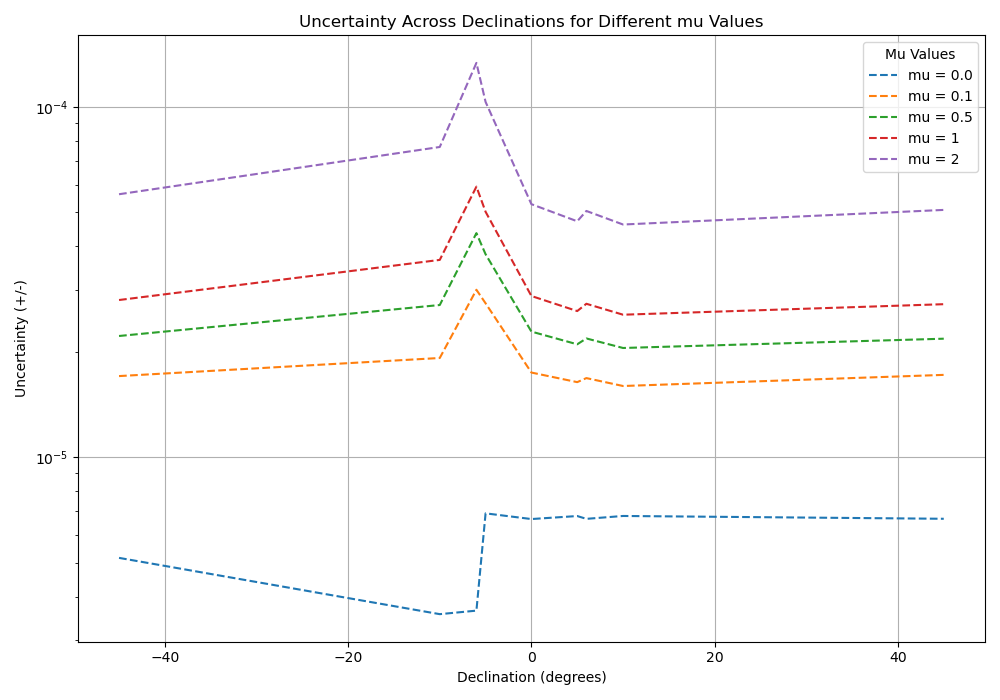

In [14]:
##~Working~##  Uncertainty with mu cut  ##
##~~~~~~~~~##===========================##


# Define different mu values
mu_values = [0.0, 0.1, 0.5, 1, 2]

# Initialize a dictionary to store uncertainties for each mu value
uncertainties_by_mu = {mu: [] for mu in mu_values}

# Loop through each mu value
for mu in mu_values:
    print(f"Processing mu = {mu}...")
    
    # Loop through each declination
    for decl in declinations:
        # Find index for current declination
        idx = np.abs(x_edges - decl).argmin()
        total_counts = np.sum(histogram_2d[idx, :])
        
        if total_counts > 0:
            # Filter the data based on mu
            valid_indices = y_edges[:-1] >= mu
            filtered_y_edges = y_edges[:-1][valid_indices]
            filtered_histogram = histogram_2d[idx, :][valid_indices]
            
            total_counts_filtered = np.sum(filtered_histogram)
            if total_counts_filtered > 0:
                normalized_histogram = filtered_histogram / total_counts_filtered
                cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
                
                # Find empirical critical value
                empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, filtered_y_edges)
                
                # Calculate the number of TS values above the 3-sigma threshold
                N_2 = np.sum(filtered_histogram >= empirical_critical_value)
                N = total_counts_filtered
                
                # Calculate the uncertainties
                plus_var = (N_2 + np.sqrt(N_2)) / N if N_2 > 0 else 0
                minus_var = (N_2 - np.sqrt(N_2)) / N if N_2 > 0 else 0
                
                total_uncertainty = plus_var - minus_var
                
                # Store the uncertainty in the dictionary
                uncertainties_by_mu[mu].append(total_uncertainty)
            else:
                # If no valid data after filtering, append NaN or zero
                uncertainties_by_mu[mu].append(float('nan'))
        else:
            uncertainties_by_mu[mu].append(float('nan'))

# Plotting the uncertainties
fig, ax = plt.subplots(figsize= (10, 7))

for mu, uncertainties in uncertainties_by_mu.items():
    ax.plot(declinations, uncertainties, label=f'mu = {mu}', linestyle='--')

ax.set_xlabel('Declination (degrees)')
ax.set_ylabel('Uncertainty (+/-)')
ax.set_title('Uncertainty Across Declinations for Different mu Values')
ax.set_yscale('log')
ax.grid(True)
ax.legend(title='Mu Values')
plt.tight_layout()
plt.show()


In [15]:
##~Working~## Find the Highest TS  ##
##~~~~~~~~~##======================##

import numpy as np

# Assuming data is already loaded and contains 'histogram_2d', 'x_edges', and 'y_edges'

# Initialize lists to track the last non-zero test statistics before they drop to zero
min_ts_values = []
min_decl_values = []

# Loop through each declination bin to find the last non-zero TS before it drops to zero
for i in range(histogram_2d.shape[0]):
    ts_row = histogram_2d[i, :]
    non_zero_indices = np.nonzero(ts_row)[0]

    if len(non_zero_indices) > 0:
        # The last non-zero index before the TS drops to zero
        last_non_zero_index = non_zero_indices[-1]
        min_ts_values.append(y_edges[last_non_zero_index])
        min_decl_values.append(x_edges[i])

# Sort the minimum TS values to get the smallest ones
min_ts_values = np.array(min_ts_values)
min_decl_values = np.array(min_decl_values)

sorted_min_indices = np.argsort(min_ts_values)

# Get the minimum 5 non-zero TS values before they drop to zero
min_5_ts_values = min_ts_values[sorted_min_indices[:5]]
min_5_decl_values = min_decl_values[sorted_min_indices[:5]]

# Find the maximum 5 non-zero TS values across the entire data
ts_values = []
decl_values = []

for i in range(histogram_2d.shape[0]):
    for j in range(histogram_2d.shape[1]):
        if histogram_2d[i, j] > 0:
            ts_values.append(y_edges[j])
            decl_values.append(x_edges[i])

ts_values = np.array(ts_values)
decl_values = np.array(decl_values)

sorted_max_indices = np.argsort(ts_values)

max_5_ts_values = ts_values[sorted_max_indices[-5:]]
max_5_decl_values = decl_values[sorted_max_indices[-5:]]

# Output the results
print("Minimum 5 non-zero test statistic values and their corresponding declination bins:")
for i in range(5):
    print(f"{i+1}. Declination: {min_5_decl_values[i]:.2f} degrees, TS Value: {min_5_ts_values[i]:.2f}")

print("\nMaximum 5 non-zero test statistic values and their corresponding declination bins:")
for i in range(5):
    print(f"{i+1}. Declination: {max_5_decl_values[i]:.2f} degrees, TS Value: {max_5_ts_values[i]:.2f}")


Minimum 5 non-zero test statistic values and their corresponding declination bins:
1. Declination: -77.76 degrees, TS Value: 17.15
2. Declination: 77.76 degrees, TS Value: 17.85
3. Declination: 79.38 degrees, TS Value: 17.85
4. Declination: -9.72 degrees, TS Value: 18.20
5. Declination: -72.90 degrees, TS Value: 18.90

Maximum 5 non-zero test statistic values and their corresponding declination bins:
1. Declination: 43.74 degrees, TS Value: 31.50
2. Declination: -32.40 degrees, TS Value: 31.85
3. Declination: 74.52 degrees, TS Value: 33.25
4. Declination: 30.78 degrees, TS Value: 33.25
5. Declination: 30.78 degrees, TS Value: 34.65


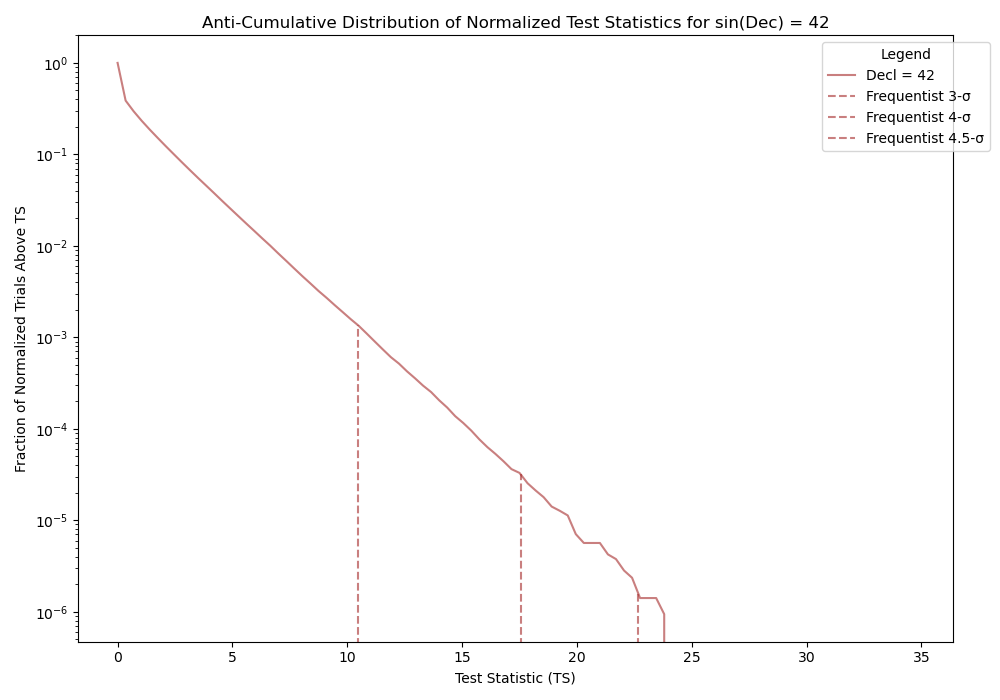

Frequentist critical value at 3-sigma: 10.479443725961538
Frequentist critical value at 4-sigma: 17.55913912361328
Frequentist critical value at 4.5-sigma: 22.64329123891017


In [19]:
##~Working~##  Unfitted raw Dist.  ##
##~~~~~~~~~##======================##



import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Create a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Define specific declination values (in degrees)
declinations = [42]
declinations_str = ', '.join(map(str, declinations))
# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-10, vmax=10)

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the anti-cumulative distributions and fit the chi-square model
for decl in declinations:
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        color = 'brown'
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        frequentist_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Calculate the number of TS values above the 3-sigma threshold
        N_2 = np.sum(histogram_2d[idx, :] >= frequentist_critical_value)
        N = total_counts
        
        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(y_edges[:-1], fraction_above_ts_norm, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]     
        frequentist_critical_values = {}
        # Plot the Frequentist and Fitted critical values for 3, 4, and 4.5 sigma
        for sigma, p_value in [(3, 0.0027/2), (4, 6.33425e-5/2), (4.5, 3.3976731e-6/2)]:
            frequentist_critical_value = find_critical_ts(cumulative_sum_norm_hist, p_value, y_edges[:-1])
            frequentist_critical_values[sigma] = frequentist_critical_value
            # Plot the frequentist critical value
            y_critical_frequentist= np.interp(frequentist_critical_value, x_data_valid, y_data_valid)
            ax.plot([frequentist_critical_value, frequentist_critical_value], [0, y_critical_frequentist], color=color, linestyle='--', alpha=0.6, label=f'Frequentist {sigma}-σ')

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title(f'Anti-Cumulative Distribution of Normalized Test Statistics for sin(Dec) = {declinations_str}')
ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Legend')
ax.grid(False)
plt.tight_layout()

# Display the plot
plt.show()
# Print the frequentist critical values for all sigma levels
for sigma, critical_value in frequentist_critical_values.items():
    print(f"Frequentist critical value at {sigma}-sigma: {critical_value}")
# # Print the data points
# for i, ts in enumerate(y_edges[:-1]):
#     print(f"TS: {ts:.2f}, Fraction of Trials Above TS: {fraction_above_ts_norm[i]:.6f}")


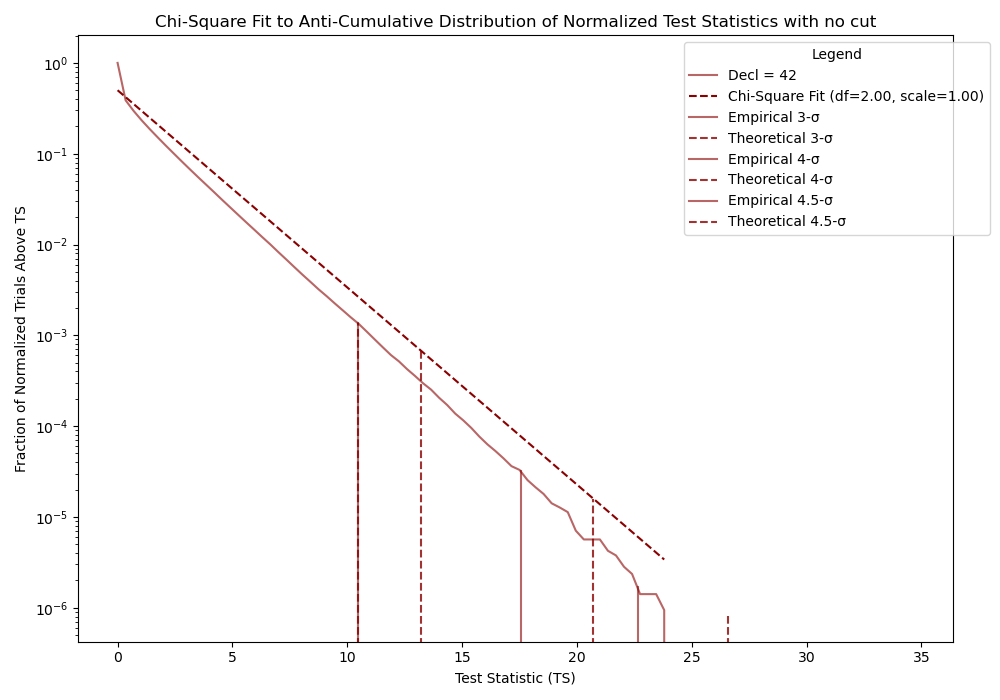

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Create a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Define chi-square model function
def chi_square_model(x, df, scale):
    return chi2.pdf(x, df, scale=scale)

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the anti-cumulative distributions and fit the chi-square model
for decl in declinations:
    color = cmap(norm(decl))
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Calculate the number of TS values above the 3-sigma threshold
        N_2 = np.sum(histogram_2d[idx, :] >= empirical_critical_value)
        N = total_counts
        
        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(y_edges[:-1], fraction_above_ts_norm, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]
        
        # Fit the chi-square model to the valid data
        popt, pcov = curve_fit(chi_square_model, x_data_valid, y_data_valid, p0=[2.0, 1.0])
        df, scale = popt
        
        # Calculate the chi-square fit using the valid data
        chi_square_fit = chi_square_model(x_data_valid, df, scale)
        
        # Plot the chi-square fit
        ax.plot(x_data_valid, chi_square_fit, color=color, linestyle='--', label=f'Chi-Square Fit (df={df:.2f}, scale={scale:.2f})')
        
        # Optional: Plot vertical line at empirical critical value
        y_critical = np.interp(empirical_critical_value, x_data_valid, y_data_valid)
        ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color=color, linestyle='--', alpha=0.8)
        
        # Plot the empirical and theoretical critical values for 3, 4, and 4.5 sigma
        for sigma, p_value in [(3, 0.0027/2), (4, 6.33425e-5/2), (4.5, 3.3976731e-6/2)]:
            empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, p_value, y_edges[:-1])

            # Calculate the chi-square critical value
            critical_ts_chi2 = chi2.ppf(1 - p_value, df)
            
            # Plot the empirical critical value
            y_critical_empirical = np.interp(empirical_critical_value, x_data_valid, y_data_valid)
            ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical_empirical], color=color, linestyle='-', alpha=0.6, label=f'Empirical {sigma}-σ')

            # Plot the theoretical chi-square critical value
            y_critical_chi2 = chi_square_model(critical_ts_chi2, df, scale)
            ax.plot([critical_ts_chi2, critical_ts_chi2], [0, y_critical_chi2], color=color, linestyle='--', alpha=0.8, label=f'Theoretical {sigma}-σ')



# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Square Fit to Anti-Cumulative Distribution of Normalized Test Statistics with no cut')
ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Legend')
ax.grid(False)
plt.tight_layout()

# Display the plot
plt.show()

# # Print the data points
# for i, ts in enumerate(y_edges[:-1]):
#     print(f"TS: {ts:.2f}, Fraction of Trials Above TS: {fraction_above_ts_norm[i]:.6f}")




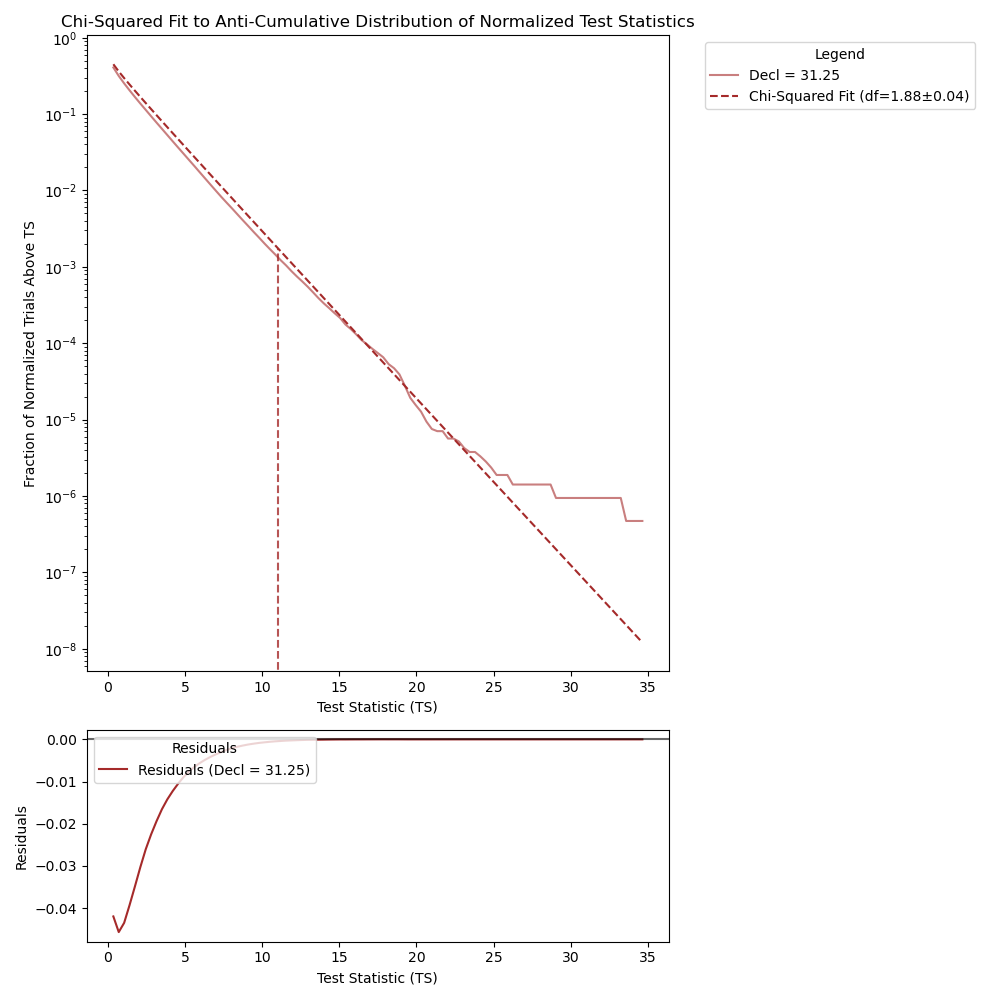

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Threshold value to discard TS values below this threshold
mu = 0.13  # Set this to the desired value

# Create a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Define Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)


# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})


# Plot the anti-cumulative distributions and fit the chi-squared model
for decl in declinations:
    color = 'brown'
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       

        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Filter out any data below mu before plotting
        valid_data_mask = (y_edges[:-1] >= mu)
        x_data_valid = y_edges[:-1][valid_data_mask]
        y_data_valid = fraction_above_ts_norm[valid_data_mask]

        # Plot the filtered anti-cumulative distribution
        ax.plot(x_data_valid, y_data_valid, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Ensure there are enough data points to fit
        if len(x_data_valid) > 1:
            # Fit the chi-squared model to the valid data
            popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
            df = popt[0]
            df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
            
            # Calculate the chi-squared fit only over the valid range
            x_fit = np.linspace(x_data_valid.min(), x_data_valid.max(), 100)
            chi_squared_fit = chi_squared_model(x_fit, df)
            
            # Plot the chi-squared fit only within the valid range
            ax.plot(x_fit, chi_squared_fit, color=color, linestyle='--', label=f'Chi-Squared Fit (df={df:.2f}±{df_err:.2f})')
            
            # Calculate residuals and plot them
            residuals = y_data_valid - chi_squared_model(x_data_valid, df)
            ax_res.plot(x_data_valid, residuals, color=color, linestyle='-', label=f'Residuals (Decl = {decl})')
            
            # Optional: Plot vertical line at empirical critical value (if within valid data range)
            if empirical_critical_value >= mu:
                y_critical = np.interp(empirical_critical_value, x_fit, chi_squared_fit)
                ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color=color, linestyle='--', alpha=0.8)


# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Squared Fit to Anti-Cumulative Distribution of Normalized Test Statistics')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Legend')
ax.grid(False)
ax.set_yscale('log')
# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='-', alpha=0.6)
ax_res.legend(loc='upper left', title='Residuals')
ax_res.grid(False)

plt.tight_layout()

# Display the plot
plt.show()


Starting empirical x value: 0.7, y value: 0.31589280534070746
Starting fit x value: 0.7, y value: 0.3710321500132203
Sum of squared residuals for Decl = 31.25: 0.0042
At a declination of [31.25]
For μ = 0.4
χ²(df=1.37±0.03)
[ 0.    0.35  0.7   1.05  1.4   1.75  2.1   2.45  2.8   3.15  3.5   3.85
  4.2   4.55  4.9   5.25  5.6   5.95  6.3   6.65  7.    7.35  7.7   8.05
  8.4   8.75  9.1   9.45  9.8  10.15 10.5  10.85 11.2  11.55 11.9  12.25
 12.6  12.95 13.3  13.65 14.   14.35 14.7  15.05 15.4  15.75 16.1  16.45
 16.8  17.15 17.5  17.85 18.2  18.55 18.9  19.25 19.6  19.95 20.3  20.65
 21.   21.35 21.7  22.05 22.4  22.75 23.1  23.45 23.8  24.15 24.5  24.85
 25.2  25.55 25.9  26.25 26.6  26.95 27.3  27.65 28.   28.35 28.7  29.05
 29.4  29.75 30.1  30.45 30.8  31.15 31.5  31.85 32.2  32.55 32.9  33.25
 33.6  33.95 34.3  34.65 35.  ]


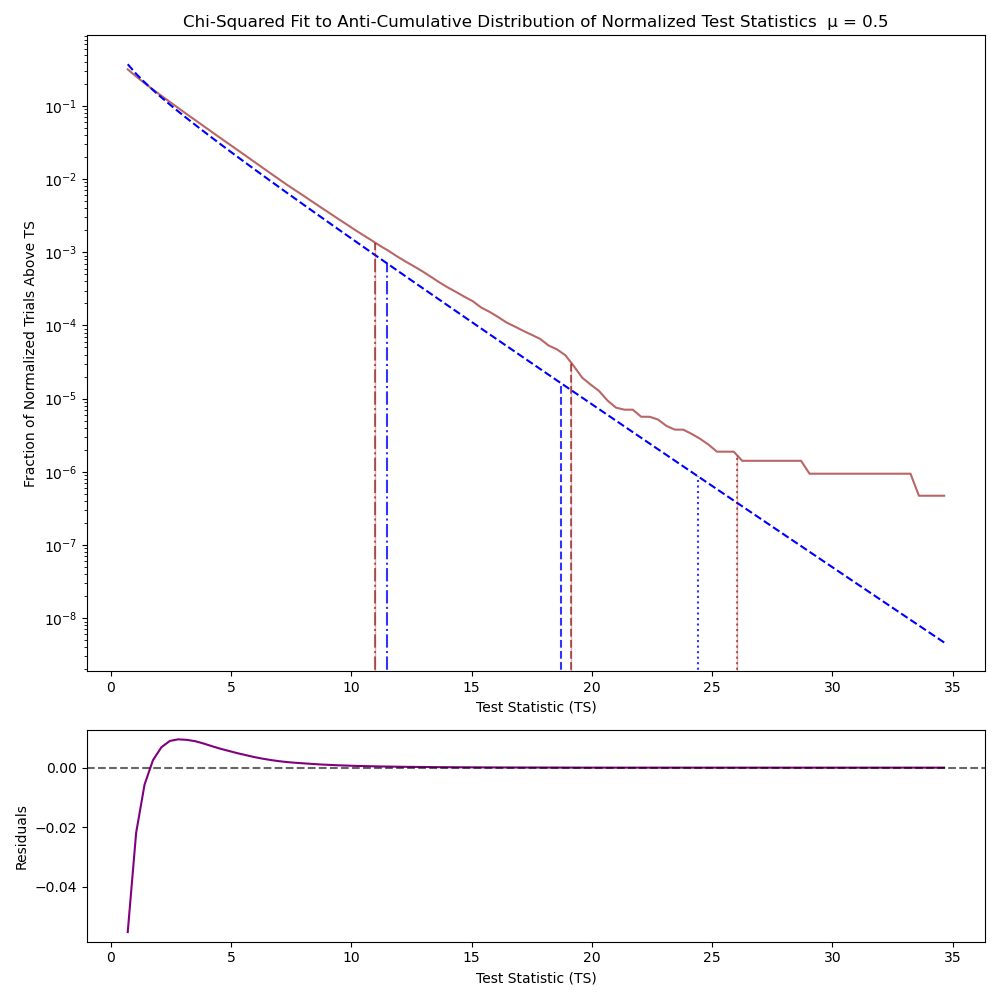

In [27]:




import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Create a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Define Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Define specific declination values (in degrees)
declinations = [31.25]

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-10, vmax=10)

# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Threshold value to discard TS values below this threshold
mu = .4 # Set this to the desired value
# Initialize a dictionary to store uncertainties for each sigma level
uncertainties_by_sigma = {3: [], 4: [], 4.5: []}

# Plot the anti-cumulative distributions and fit the chi-squared model
for decl in declinations:
    color = cmap(norm(decl))
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros) -- this step is now redundant since we've already filtered
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]

        # Print the starting x, y values for the empirical data
        print(f"Starting empirical x value: {x_data_valid[0]}, y value: {y_data_valid[0]}")
        
        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df)

        # Print the starting x, y values for the chi-squared fit
        print(f"Starting fit x value: {x_data_valid[0]}, y value: {chi_squared_fit[0]}")
        
        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color='blue', linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')
        
        # Calculate residuals and plot them
        residuals = y_data_valid - chi_squared_fit
        ax_res.plot(x_data_valid, residuals, color='purple', linestyle='-', label=f'Residuals (Decl = {decl})')
        
        # Calculate and print the sum of squared residuals
        sum_squared_residuals = np.sum(residuals**2)
        print(f'Sum of squared residuals for Decl = {decl}: {sum_squared_residuals:.4f}')
        
        # Plot the empirical and theoretical critical values for 3, 4, and 4.5 sigma
        for sigma, p_value in [(3, 0.0027/2), (4, 6.33425e-5/2), (4.5, 3.3976731e-6/2)]:
            empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, p_value, y_edges[:-1])
            
            # Calculate the chi-squared critical value
            critical_ts_chi2 = chi2.ppf(1 - p_value, df)
            
            # Define the line styles based on sigma value
            if sigma == 3:
                line_style = '-.'
            elif sigma == 4:
                line_style = '--'
            elif sigma == 4.5:
                line_style = ':'
            
            # Plot the empirical critical value
            y_critical_empirical = np.interp(empirical_critical_value, x_data_valid, y_data_valid)
            ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical_empirical], color=color, linestyle=line_style, alpha=0.6)
            
            # Plot the theoretical chi-squared critical value
            y_critical_chi2 = chi_squared_model(critical_ts_chi2, df)
            ax.plot([critical_ts_chi2, critical_ts_chi2], [0, y_critical_chi2], color='blue', linestyle=line_style, alpha=0.8)
            
            # Calculate the number of TS values above the empirical critical value
            N_2 = np.sum(histogram_2d[idx, :] >= empirical_critical_value)
            N = total_counts
            
            # Calculate the uncertainties
            plus_var = np.sqrt(N_2) / N if N_2 > 0 else 0
            minus_var = np.sqrt(N_2) / N if N_2 > 0 else 0
            
            # Calculate lower and upper uncertainties
            lower_uncertainty = empirical_critical_value - minus_var
            upper_uncertainty = empirical_critical_value + plus_var
            
            # Store the uncertainties in the dictionary
            uncertainties_by_sigma[sigma] = (lower_uncertainty, upper_uncertainty)
            
            # Fill between the lower and upper bounds of the uncertainty
            ax.fill_between(
                [lower_uncertainty, upper_uncertainty],
                [0, 0],
                [y_critical_empirical, y_critical_empirical],
                color=color,
                alpha=0.3,  # Adjust transparency as needed
                label=f'{sigma}-sigma uncertainty'
            )

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Squared Fit to Anti-Cumulative Distribution of Normalized Test Statistics  μ = 0.5')

ax.grid(False)
ax.set_yscale('log')

# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
ax_res.grid(False)

print('At a declination of', declinations)
print('For μ =', mu)
print(f'\u03C7²(df={df:.2f}±{df_err:.2f})')
plt.tight_layout()
print(y_edges)
# Display the plot
plt.show()

/tmp/ipykernel_9690/2177535947.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})


Starting empirical x value: 1.0499999999999998, y value: 0.25254631112182735
Starting fit x value: 1.0499999999999998, y value: 0.27788153843393054
Sum of squared residuals for Decl = 31.25: 0.0011
Frequentist 3-sigma critical value: 11.0023
Fitted 3-sigma critical value: 11.6072
Frequentist 4-sigma critical value: 19.1296
Fitted 4-sigma critical value: 18.8597
Frequentist 4.5-sigma critical value: 26.0374
Fitted 4.5-sigma critical value: 24.5688
At a declination of [31.25]
χ²(df=1.42±0.01, μ=1.00±0.00)


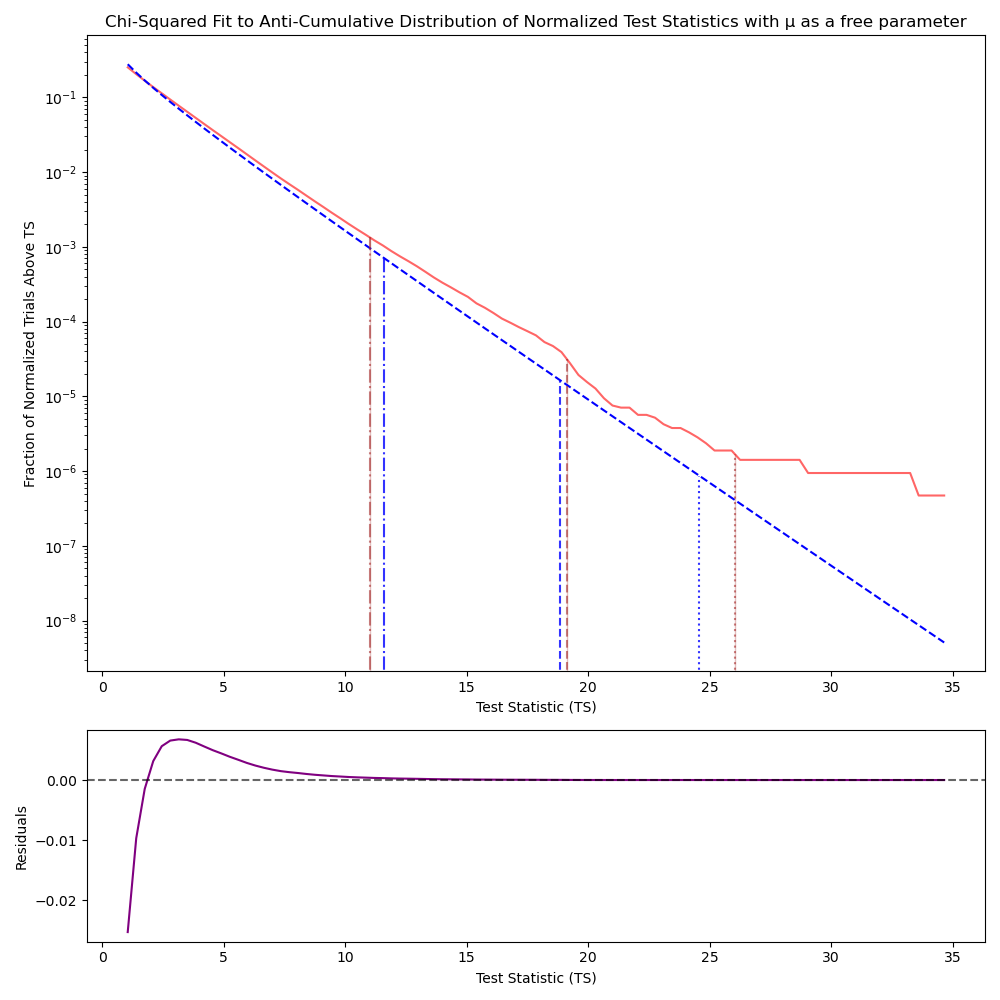

In [28]:
##~~~~~~~~~##======================##
##~Testing~## ##
##~~~~~~~~~##======================##



import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Create a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Define Chi-squared model function with mu as a free parameter
def chi_squared_model(k, df, mu):
    return chi2.pdf(k, df) * (k >= mu)



# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Threshold value to discard TS values below this threshold
mu_initial = 1 # Initial guess for mu

# Initialize a dictionary to store uncertainties for each sigma level
uncertainties_by_sigma = {3: [], 4: [], 4.5: []}

# Plot the anti-cumulative distributions and fit the chi-squared model
for decl in declinations:
    color = 'brown'
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu_initial
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color='red', label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]

        # Print the starting x, y values for the empirical data
        print(f"Starting empirical x value: {x_data_valid[0]}, y value: {y_data_valid[0]}")
        
        # Fit the chi-squared model to the valid data, including mu as a free parameter
        # Applying bounds to ensure sensible values
        popt, pcov = curve_fit(
            chi_squared_model, x_data_valid, y_data_valid, 
            p0=[2.0, mu_initial], 
            bounds=([0.1, 0], [10, 2]),  # Corrected bounds on df and mu
            maxfev=10000
        )

        df, mu_fitted = popt
        df_err, mu_err = np.sqrt(np.diag(pcov))  # Uncertainties in df and mu
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df, mu_fitted)

        # Print the starting x, y values for the chi-squared fit
        print(f"Starting fit x value: {x_data_valid[0]}, y value: {chi_squared_fit[0]}")
        
        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color='blue', linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f}, μ={mu_fitted:.2f}±{mu_err:.2f})')
        
        # Calculate residuals and plot them
        residuals = y_data_valid - chi_squared_fit
        ax_res.plot(x_data_valid, residuals, color='purple', linestyle='-', label=f'Residuals (Decl = {decl})')
        
        # Calculate and print the sum of squared residuals
        sum_squared_residuals = np.sum(residuals**2)
        print(f'Sum of squared residuals for Decl = {decl}: {sum_squared_residuals:.4f}')
        
        # Plot the empirical and theoretical critical values for 3, 4, and 4.5 sigma
        for sigma, p_value in [(3, 0.0027/2), (4, 6.33425e-5/2), (4.5, 3.3976731e-6/2)]:
            empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, p_value, y_edges[:-1])
            
            # Calculate the chi-squared critical value
            critical_ts_chi2 = chi2.ppf(1 - p_value, df)
            
            # Define the line styles based on sigma value
            if sigma == 3:
                line_style = '-.'
            elif sigma == 4:
                line_style = '--'
            elif sigma == 4.5:
                line_style = ':'
            
            # Plot the empirical critical value
            y_critical_empirical = np.interp(empirical_critical_value, x_data_valid, y_data_valid)
            ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical_empirical], color=color, linestyle=line_style, alpha=0.6)
            
            # Plot the theoretical chi-squared critical value
            y_critical_chi2 = chi_squared_model(critical_ts_chi2, df, mu_fitted)
            ax.plot([critical_ts_chi2, critical_ts_chi2], [0, y_critical_chi2], color='blue', linestyle=line_style, alpha=0.8)
            
            # Calculate the number of TS values above the empirical critical value
            N_2 = np.sum(histogram_2d[idx, :] >= empirical_critical_value)
            N = total_counts
            
            # Calculate the uncertainties
            plus_var = np.sqrt(N_2) / N if N_2 > 0 else 0
            minus_var = np.sqrt(N_2) / N if N_2 > 0 else 0
            
            # Calculate lower and upper uncertainties
            lower_uncertainty = empirical_critical_value - minus_var
            upper_uncertainty = empirical_critical_value + plus_var
            
            # Store the uncertainties in the dictionary
            uncertainties_by_sigma[sigma] = (lower_uncertainty, upper_uncertainty)
            
            # Fill between the lower and upper bounds of the uncertainty
            ax.fill_between(
                [lower_uncertainty, upper_uncertainty],
                [0, 0],
                [y_critical_empirical, y_critical_empirical],
                color=color,
                alpha=0.3,  # Adjust transparency as needed
                label=f'{sigma}-sigma uncertainty'
            )
            print(f"Frequentist {sigma}-sigma critical value: {empirical_critical_value:.4f}")
            print(f"Fitted {sigma}-sigma critical value: {critical_ts_chi2:.4f}")
# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Squared Fit to Anti-Cumulative Distribution of Normalized Test Statistics with μ as a free parameter')

ax.grid(False)
ax.set_yscale('log')

# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
ax_res.grid(False)

print('At a declination of', declinations)
print(f'\u03C7²(df={df:.2f}±{df_err:.2f}, μ={mu_fitted:.2f}±{mu_err:.2f})')
plt.tight_layout()

# Display the plot
plt.show()

TypeError: chi_squared_model() missing 1 required positional argument: 'mu'

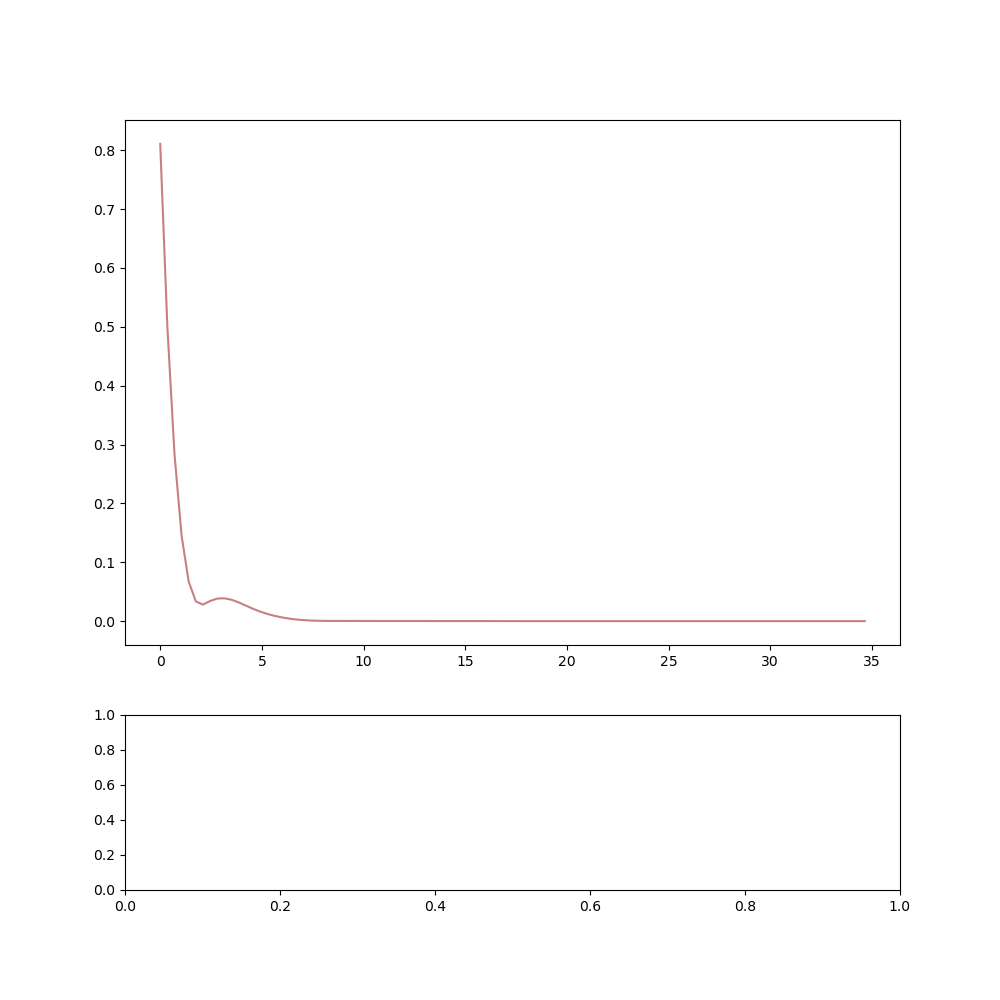

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.interpolate import UnivariateSpline

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Create a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value  

# Define specific declination values (in degrees)
mu = 0.5

# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Initialize a dictionary to store uncertainties for each sigma level
uncertainties_by_sigma = {3: [], 4: [], 4.5: []}

# Plot the anti-cumulative distributions and fit the chi-squared model
for decl in declinations:
    color = 'brown'
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        # Apply spline smoothing
        spline_smoothing_factor = 0.1  # Adjust this value to control the smoothing level
        spline = UnivariateSpline(y_edges[:-1], fraction_above_ts_norm, s=spline_smoothing_factor)
        smoothed_y_data = spline(y_edges[:-1])

        # Plot the smoothed anti-cumulative distribution and store the line object
        line, = ax.plot(y_edges[:-1], smoothed_y_data, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = smoothed_y_data > 0
        x_data_valid = y_edges[:-1][valid_data_mask]
        y_data_valid = smoothed_y_data[valid_data_mask]

        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df)

        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color='blue', linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')
        
        # Calculate residuals and plot them
        residuals = y_data_valid - chi_squared_fit
        ax_res.plot(x_data_valid, residuals, color='purple', linestyle='-', label=f'Residuals (Decl = {decl})')
        
        # Plot the empirical and theoretical critical values for 3, 4, and 4.5 sigma
        for sigma, p_value in [(3, 0.0027/2), (4, 6.33425e-5/2), (4.5, 3.3976731e-6/2)]:
            empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, p_value, y_edges[:-1])
            
            # Calculate the chi-squared critical value
            critical_ts_chi2 = chi2.ppf(1 - p_value, df)
            
            # Define the line styles based on sigma value
            if sigma == 3:
                line_style = '-.'
            elif sigma == 4:
                line_style = '--'
            elif sigma == 4.5:
                line_style = ':'
            
            # Plot the empirical critical value
            y_critical_empirical = np.interp(empirical_critical_value, x_data_valid, y_data_valid)
            ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical_empirical], color=color, linestyle=line_style, alpha=0.6)
            
            # Plot the theoretical chi-squared critical value
            y_critical_chi2 = chi_squared_model(critical_ts_chi2, df)
            ax.plot([critical_ts_chi2, critical_ts_chi2], [0, y_critical_chi2], color='blue', linestyle=line_style, alpha=0.8)
            
            # Calculate the number of TS values above the empirical critical value
            N_2 = np.sum(histogram_2d[idx, :] >= empirical_critical_value)
            N = total_counts
            
            # Calculate the uncertainties
            plus_var = np.sqrt(N_2) / N if N_2 > 0 else 0
            minus_var = np.sqrt(N_2) / N if N_2 > 0 else 0
            
            # Calculate lower and upper uncertainties
            lower_uncertainty = empirical_critical_value - minus_var
            upper_uncertainty = empirical_critical_value + plus_var
            
            # Store the uncertainties in the dictionary
            uncertainties_by_sigma[sigma] = (lower_uncertainty, upper_uncertainty)
            
            # Fill between the lower and upper bounds of the uncertainty
            ax.fill_between(
                [lower_uncertainty, upper_uncertainty],
                [0, 0],
                [y_critical_empirical, y_critical_empirical],
                color=color,
                alpha=0.3,  # Adjust transparency as needed
                label=f'{sigma}-sigma uncertainty'
            )

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Squared Fit to Anti-Cumulative Distribution of Normalized Test Statistics with μ as a free parameter')

ax.grid(False)
ax.set_yscale('log')

# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
ax_res.grid(False)

print('At a declination of', declinations)
print(f'\u03C7²(df={df:.2f}±{df_err:.2f}, μ={mu_fitted:.2f}±{mu_err:.2f})')
plt.tight_layout()

# Display the plot
plt.show()


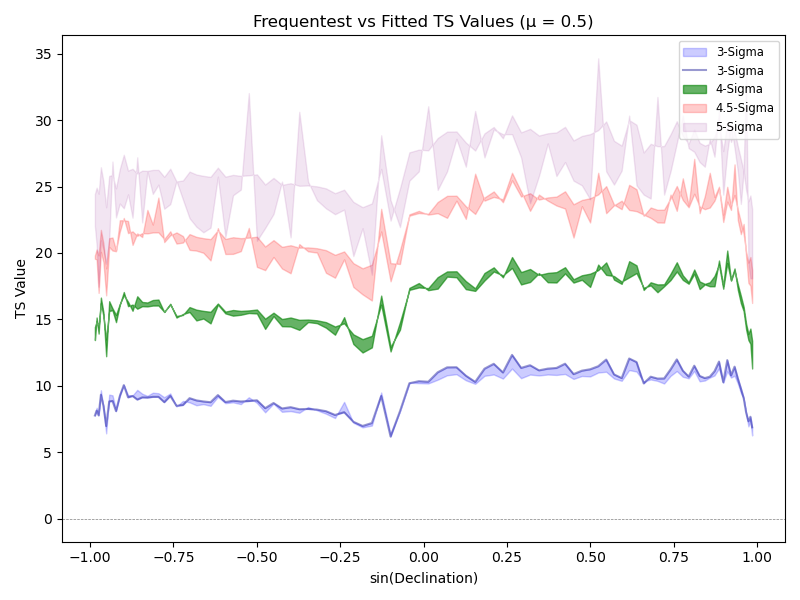

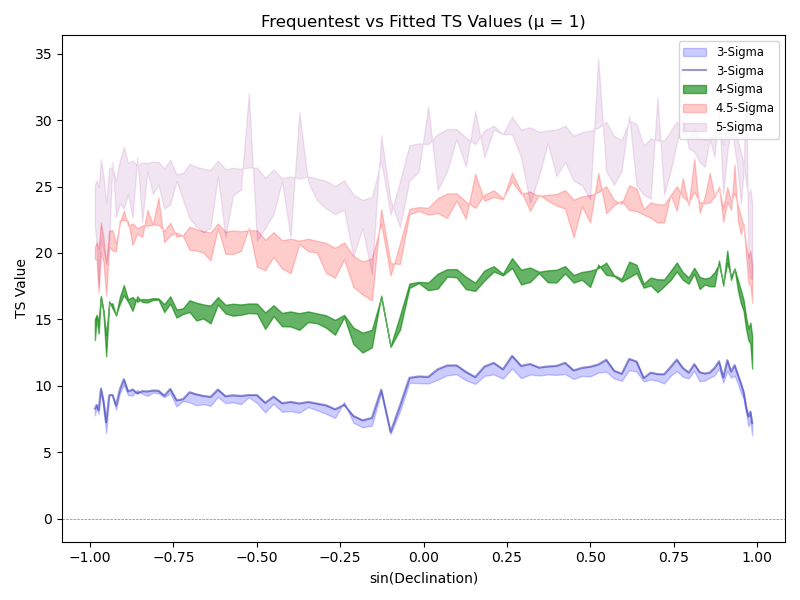

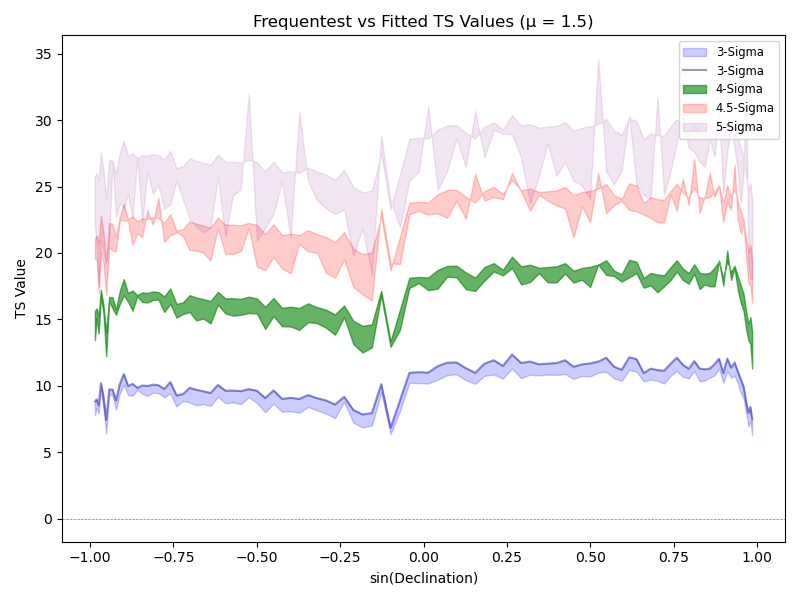

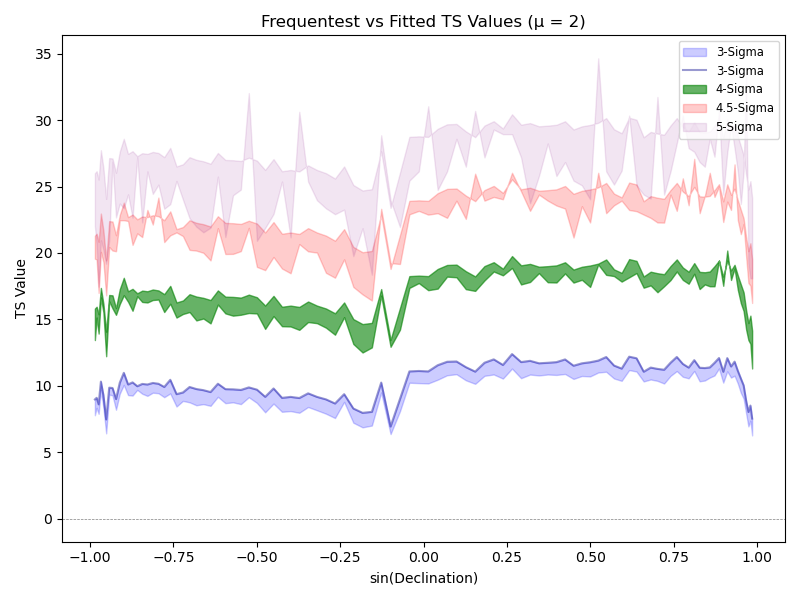

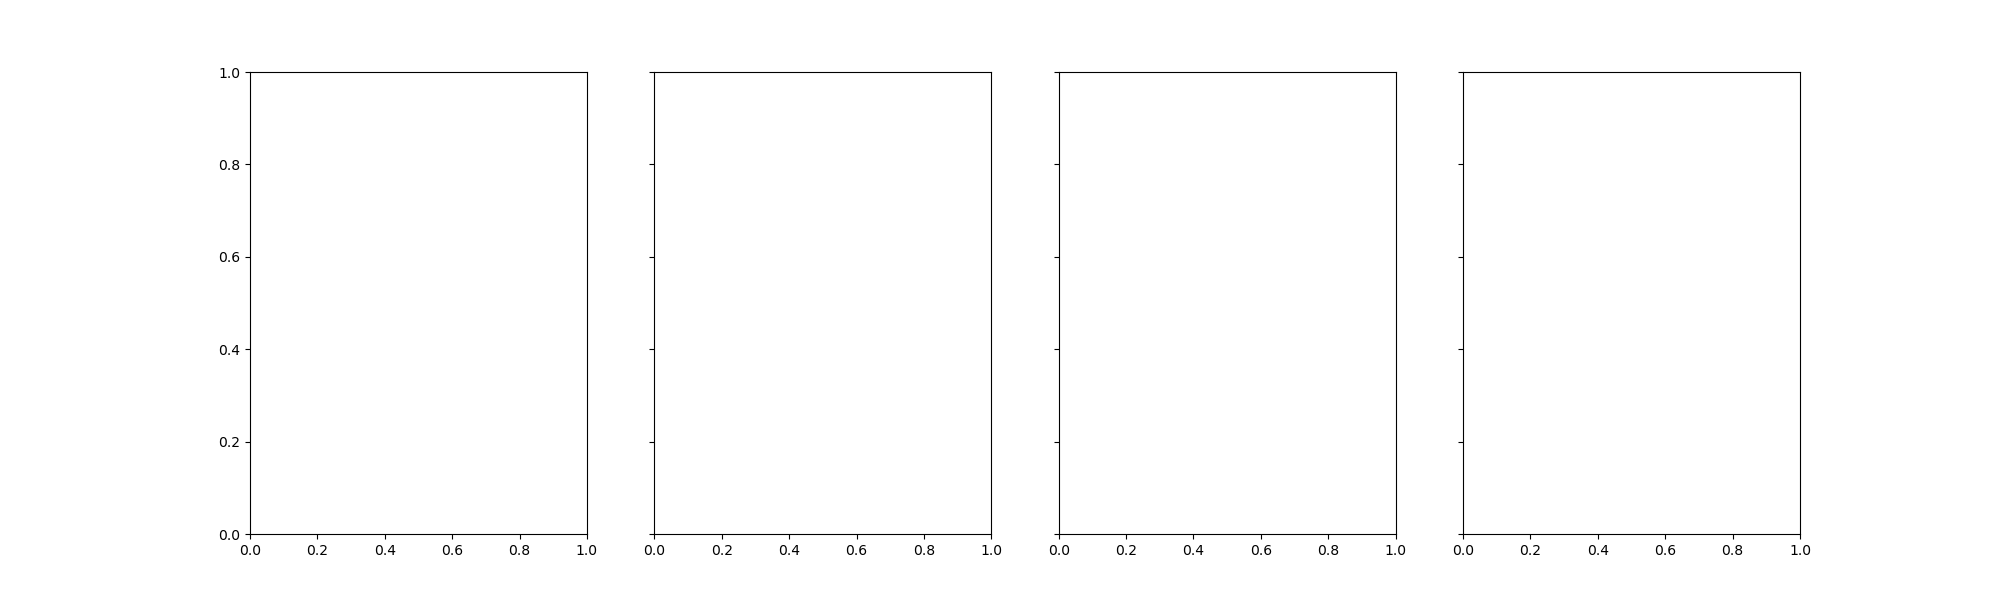

In [3]:
##~Working~## TS manual Sin(dec) Diff.##
##~~~~~~~~~##=========================##


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Define Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Convert declination edges to sine of declination
sin_x_edges = np.sin(np.radians(x_edges))

# List of mu values to investigate
mu_values = [0.5, 1, 1.5, 2]

# Plotting for each mu value
fig, axs = plt.subplots(1, len(mu_values), figsize=(20, 6), sharey=True)

# Loop over mu values
for i, mu in enumerate(mu_values):
    sin_x_midpoints = []
    empirical_3sigma = []
    theoretical_3sigma = []
    empirical_4sigma = []
    theoretical_4sigma = []
    empirical_4_5sigma = []
    theoretical_4_5sigma = []
    empirical_5sigma = []
    theoretical_5sigma = []
    
    # Plot the anti-cumulative distributions and calculate differences
    for idx in range(len(x_edges) - 1):
        total_counts = np.sum(histogram_2d[idx, :])
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            total_trials_norm = cumulative_sum_norm_hist[0]
            fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm

            # Apply the mu filter to y_edges and fraction_above_ts_norm
            filtered_mask = y_edges[:-1] >= mu
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

            # Fit the chi-squared model to the valid data
            popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
            df = popt[0]

            # Calculate and store the empirical and theoretical values for 3, 4, 4.5, and 5 sigma
            for sigma, p_value, emp_list, theo_list in [
                (3, 0.0027/2, empirical_3sigma, theoretical_3sigma), 
                (4, 6.33425e-5/2, empirical_4sigma, theoretical_4sigma), 
                (4.5, 3.3976731e-6/2, empirical_4_5sigma, theoretical_4_5sigma),
                (5, 2.8665157e-7/2, empirical_5sigma, theoretical_5sigma)
            ]:
                empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, p_value, y_edges[:-1])
                critical_ts_chi2 = chi2.ppf(1 - p_value, df)
                emp_list.append(empirical_critical_value)
                theo_list.append(critical_ts_chi2)

            # Store the midpoint of sin(declination)
            sin_x_midpoints.append((sin_x_edges[idx] + sin_x_edges[idx + 1]) / 2)

    # Create a new figure for each mu value
    plt.figure(figsize=(8, 6))
    
    # Plot for each sigma level with fill_between
    plt.fill_between(sin_x_midpoints, empirical_3sigma, theoretical_3sigma, color='blue', alpha=0.2, label='3-Sigma')
    plt.plot(sin_x_midpoints,theoretical_3sigma, color='darkblue',linestyle='-', alpha=0.4, label='3-Sigma')
    plt.fill_between(sin_x_midpoints, empirical_4sigma, theoretical_4sigma, color='green', alpha=0.6, label='4-Sigma')
    plt.fill_between(sin_x_midpoints, empirical_4_5sigma, theoretical_4_5sigma, color='red', alpha=0.2, label='4.5-Sigma')
    plt.fill_between(sin_x_midpoints, empirical_5sigma, theoretical_5sigma, color='purple', alpha=0.1, label='5-Sigma')



    plt.axhline(y=0, color='grey', linestyle='--', linewidth=0.5)
    plt.xlabel('sin(Declination)')
    plt.ylabel('TS Value')
    plt.title(f'Frequentest vs Fitted TS Values (μ = {mu})')
    plt.legend(loc='upper right', fontsize='small')
    plt.grid(False)
    plt.tight_layout()

    # Save and show each plot separately
    plt.savefig(f'Freqentest_vs_Fittted_sigma_ts_mu_{mu}.png')
    plt.show()

Sum of squared residuals for Decl = 45: 0.0045
Error Empirical/Fit : -0.3822
At a declination of [45]
For μ = 0.5
χ²(df=1.08±0.03)


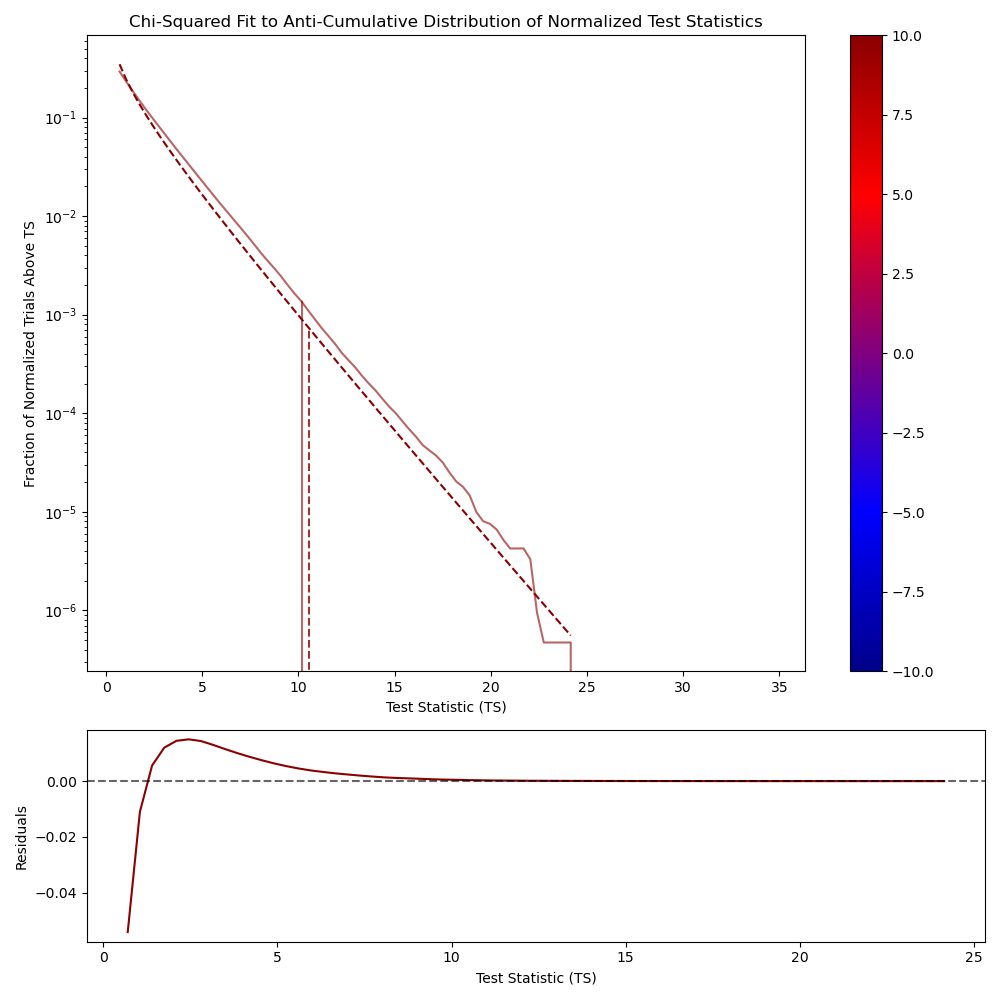

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']



# Create a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Define Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Define specific declination values (in degrees)
declinations = [45]

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-10, vmax=10)

# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Threshold value to discard TS values below this threshold
mu = .5 # Set this to the desired value

# Plot the anti-cumulative distributions and fit the chi-squared model
for decl in declinations:
    color = cmap(norm(decl))
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros) -- this step is now redundant since we've already filtered
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]
        
        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df)
        
        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color=color, linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')
        
        # Calculate residuals and plot them
        residuals = y_data_valid - chi_squared_fit
        ax_res.plot(x_data_valid, residuals, color=color, linestyle='-', label=f'Residuals (Decl = {decl})')
        
        # Calculate and print the sum of squared residuals
        sum_squared_residuals = np.sum(residuals**2)
        print(f'Sum of squared residuals for Decl = {decl}: {sum_squared_residuals:.4f}')
        # Optional: Plot vertical line at empirical critical value
        y_critical = np.interp(empirical_critical_value, x_data_valid, y_data_valid)
        ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color=color, linestyle='-', alpha=0.6)
        
        # Calculate the 3-sigma critical value from the chi-squared distribution
        critical_ts_chi2 = chi2.ppf(1 - 0.0027/2, df)
        
        # Find the corresponding y value on the chi-squared fit curve
        y_critical_chi2 = chi_squared_model(critical_ts_chi2, df)
        
        # Plot the vertical line for the chi-squared 3-sigma critical value, only extending to the chi-squared fit curve
        ax.plot([critical_ts_chi2, critical_ts_chi2], [0, y_critical_chi2], color=color, linestyle='--', alpha=0.8)
        # Calculate and print the distance between the empirical and chi-squared 3-sigma critical values
        distance_between_lines = empirical_critical_value - critical_ts_chi2
        print(f'Error Empirical/Fit : {distance_between_lines:.4f}')
# Add the colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Squared Fit to Anti-Cumulative Distribution of Normalized Test Statistics')




ax.grid(False)
ax.set_yscale('log')

# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
ax_res.grid(False)

print('At a declination of', declinations)
print('For μ =', mu)
print(f'\u03C7²(df={df:.2f}±{df_err:.2f})')
plt.tight_layout()

# Display the plot
plt.show()


Optimized μ: 0.5600
Sum of squared residuals for Decl = -44.55: 0.0040
Error Empirical/Fit : -0.3161
At a declination of [-44.55]
For μ = 0.5600231192328717
χ²(df=0.68±0.02)


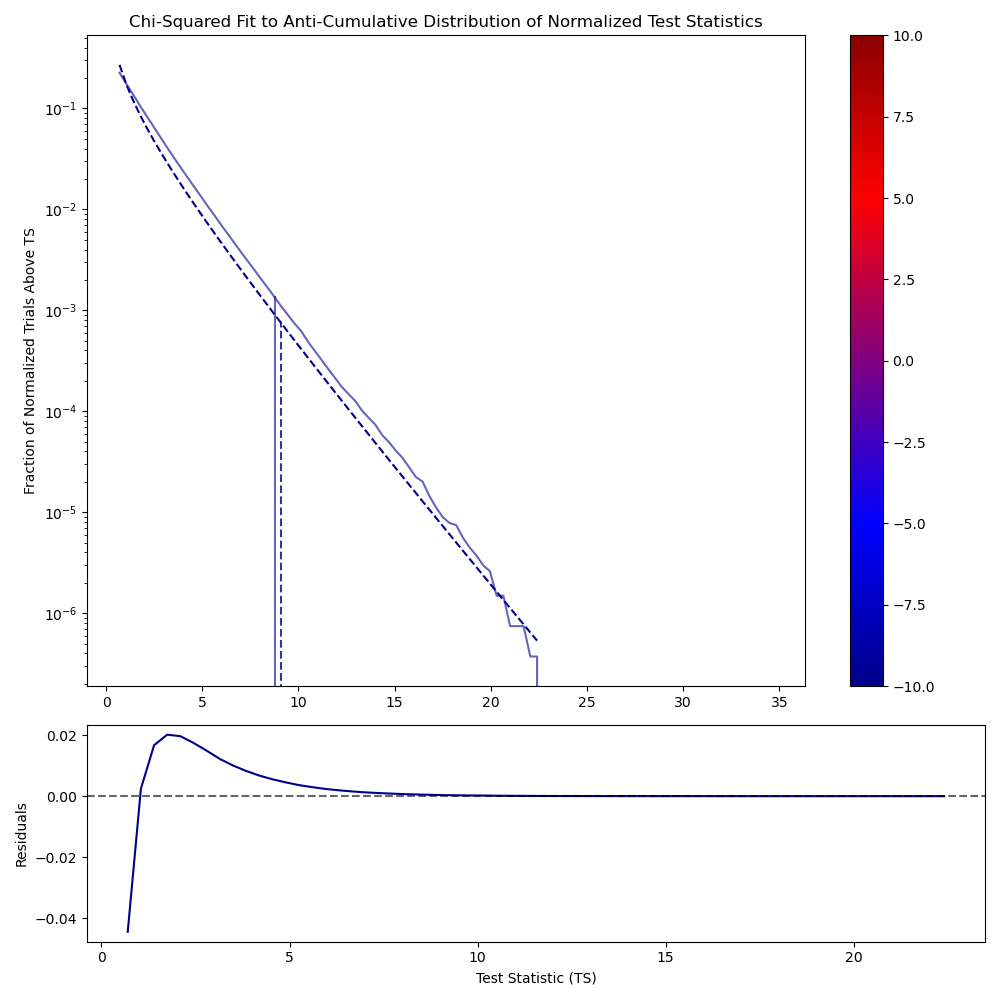

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit, minimize
from scipy.stats import chi2
from scipy.optimize import differential_evolution

# Access the individual arrays (assuming these are provided in `data`)
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Specific declination values (in degrees)
declinations = [-44.55]

# Function to compute the distance between empirical and chi-squared critical values for a given mu
def compute_distance(mu, histogram_2d, x_edges, y_edges, declinations):
    distances = []
    mu = mu[0]  # Extract scalar value if mu is passed as an array
    for decl in declinations:
        idx = np.abs(x_edges - decl).argmin()
        total_counts = np.sum(histogram_2d[idx, :])
        
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            total_trials_norm = cumulative_sum_norm_hist[0]
            fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
            
            empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

            # Apply the mu filter to y_edges and fraction_above_ts_norm
            filtered_mask = y_edges[:-1] >= mu
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

            # Debug: Check if filtering is too aggressive or too loose
            #print(f"mu: {mu:.4f}, Number of points after filtering: {len(filtered_y_edges)}")

            # If no data remains after filtering, skip this iteration
            if len(filtered_y_edges) == 0 or len(filtered_fraction_above_ts_norm) == 0:
                continue
            
            # Fit the chi-squared model to the valid data
            try:
                popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
                df = popt[0]
            except (RuntimeError, ValueError):
                continue  # Skip if fitting fails
            
            # Calculate the chi-squared fit using the valid data
            critical_ts_chi2 = chi2.ppf(1 - 0.0027/2, df)
            
            # Calculate the distance between the two critical values
            distance = abs(empirical_critical_value - critical_ts_chi2)
            distances.append(distance)
    
    # Return the sum of distances for all declinations (or the mean, depending on your preference)
    return np.sum(distances)

# Initial guess for mu
initial_mu = 0.2

# Run the minimization with a more robust method
result = differential_evolution(compute_distance, bounds=[(0, 2)], args=(histogram_2d, x_edges, y_edges, declinations))

# Extract the optimized mu value
optimized_mu = result.x[0]
print(f'Optimized μ: {optimized_mu:.4f}')

# Now use the optimized mu in the plotting code
mu = optimized_mu

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-10, vmax=10)

# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot the anti-cumulative distributions and fit the chi-squared model
for decl in declinations:
    color = cmap(norm(decl))
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]
        
        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df)
        
        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color=color, linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')
        
        # Calculate residuals and plot them
        residuals = y_data_valid - chi_squared_fit
        ax_res.plot(x_data_valid, residuals, color=color, linestyle='-', label=f'Residuals (Decl = {decl})')
        
        # Calculate and print the sum of squared residuals
        sum_squared_residuals = np.sum(residuals**2)
        print(f'Sum of squared residuals for Decl = {decl}: {sum_squared_residuals:.4f}')
        
        # Optional: Plot vertical line at empirical critical value
        y_critical = np.interp(empirical_critical_value, x_data_valid, y_data_valid)
        ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color=color, linestyle='-', alpha=0.6)
        
        # Calculate the 3-sigma critical value from the chi-squared distribution
        critical_ts_chi2 = chi2.ppf(1 - 0.0027/2, df)
        
        # Find the corresponding y value on the chi-squared fit curve
        y_critical_chi2 = chi_squared_model(critical_ts_chi2, df)
        
        # Plot the vertical line for the chi-squared 3-sigma critical value, only extending to the chi-squared fit curve
        ax.plot([critical_ts_chi2, critical_ts_chi2], [0, y_critical_chi2], color=color, linestyle='--', alpha=0.8)
        
        # Calculate and print the distance between the empirical and chi-squared 3-sigma critical values
        distance_between_lines = empirical_critical_value - critical_ts_chi2
        print(f'Error Empirical/Fit : {distance_between_lines:.4f}')

# Add the colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')

# Finalize the plot|
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Squared Fit to Anti-Cumulative Distribution of Normalized Test Statistics')
ax.grid(False)
ax.set_yscale('log')

# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
ax_res.grid(False)

print('At a declination of', declinations)
print('For μ =', mu)
print(f'\u03C7²(df={df:.2f}±{df_err:.2f})')
plt.tight_layout()

# Display the plot
plt.show()


Optimized μ: 0.4796


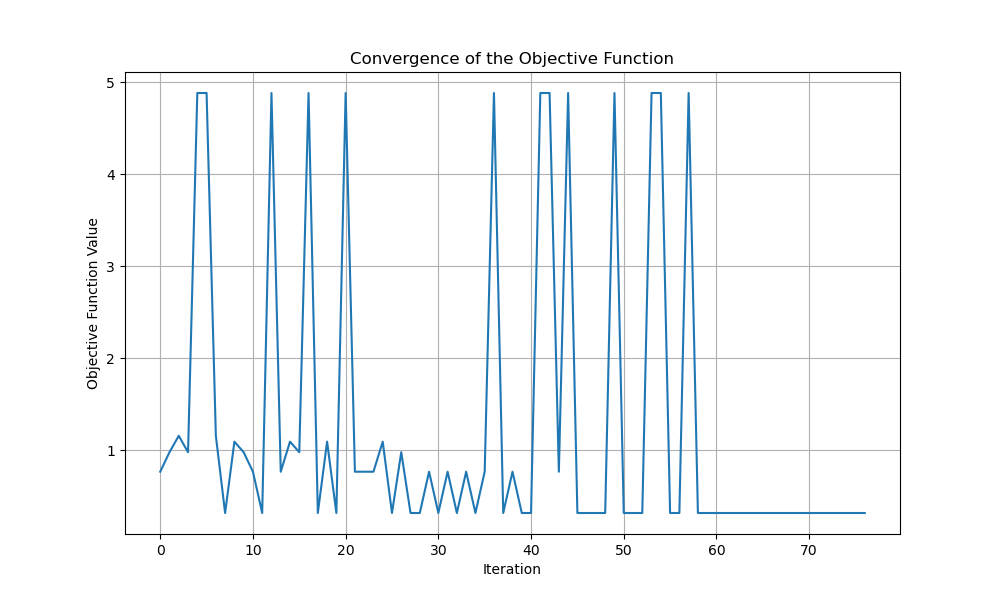

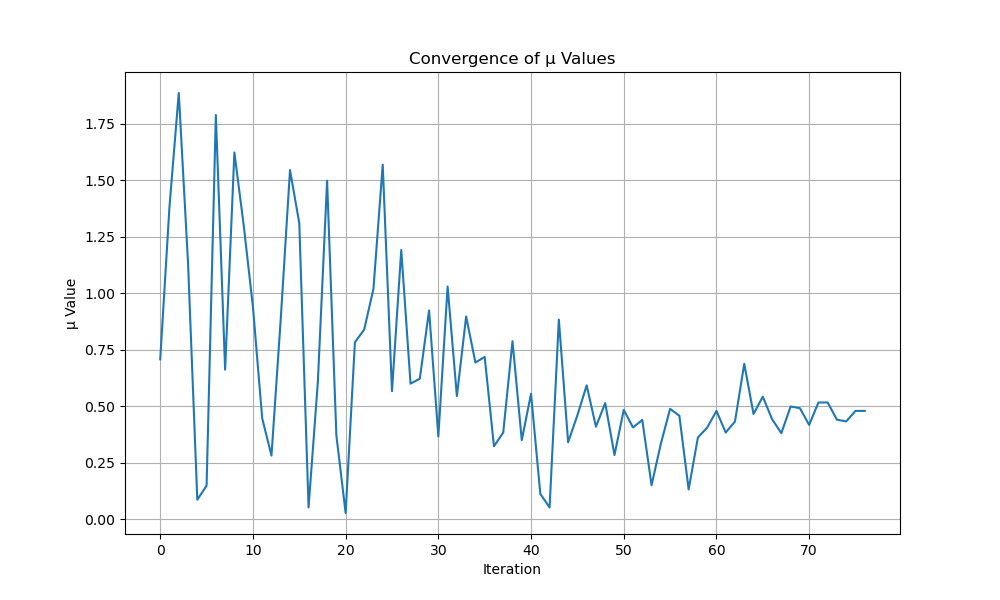

Sum of squared residuals for Decl = -44.55: 0.0040
Error Empirical/Fit : -0.3161
At a declination of [-44.55]
For μ = 0.47964313697124994
χ²(df=0.68±0.02)


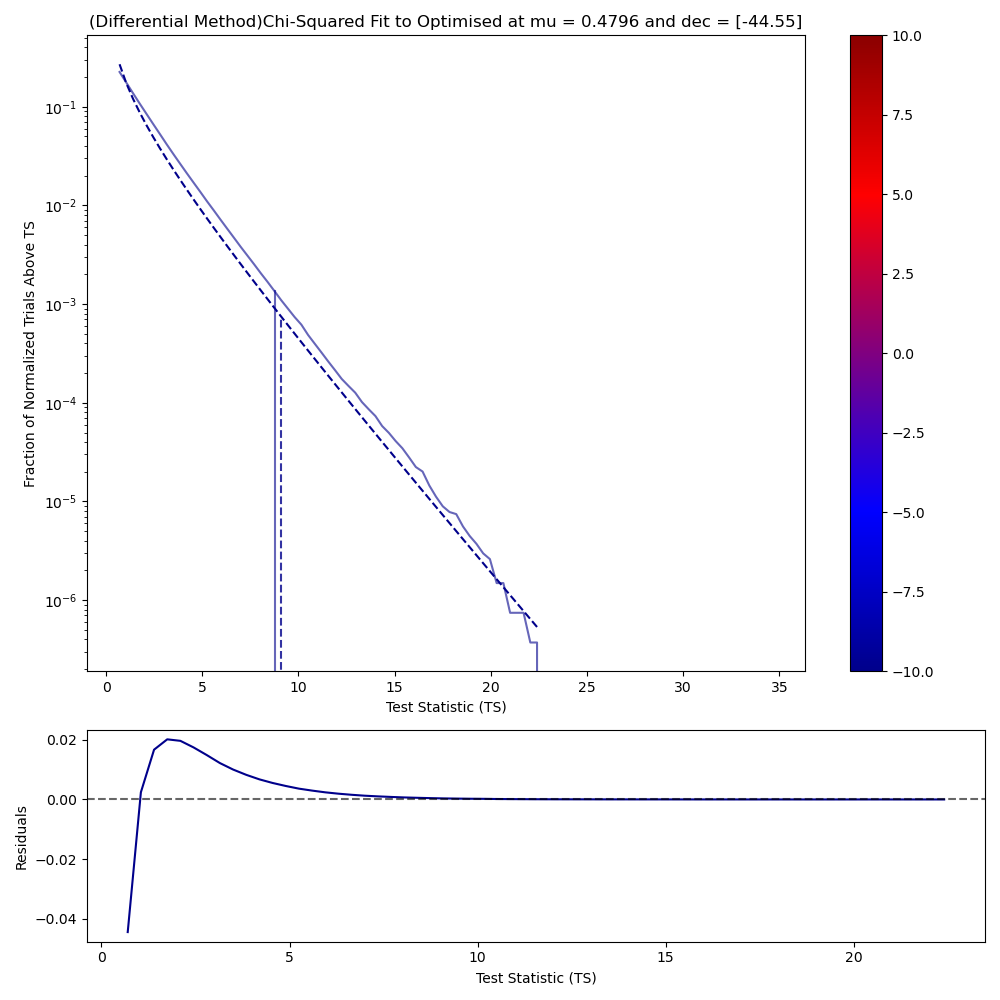

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit, differential_evolution
from scipy.stats import chi2

# Access the individual arrays (assuming these are provided in `data`)
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Specific declination values (in degrees)
# Lists to store the objective function values and mu values during optimization
objective_values = []
mu_values = []

# Function to compute the distance between empirical and chi-squared critical values for a given mu
def compute_distance(mu, histogram_2d, x_edges, y_edges, declinations):
    distances = []
    mu = mu[0]  # Extract scalar value if mu is passed as an array
    
    # Store the current mu value
    mu_values.append(mu)
    
    for decl in declinations:
        idx = np.abs(x_edges - decl).argmin()
        total_counts = np.sum(histogram_2d[idx, :])
        
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            total_trials_norm = cumulative_sum_norm_hist[0]
            fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
            
            empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

            # Apply the mu filter to y_edges and fraction_above_ts_norm
            filtered_mask = y_edges[:-1] >= mu
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

            # If no data remains after filtering, skip this iteration
            if len(filtered_y_edges) == 0 or len(filtered_fraction_above_ts_norm) == 0:
                continue
            
            # Fit the chi-squared model to the valid data
            try:
                popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
                df = popt[0]
            except (RuntimeError, ValueError):
                continue  # Skip if fitting fails
            
            # Calculate the chi-squared fit using the valid data
            critical_ts_chi2 = chi2.ppf(1 - 0.0027/2, df)
            
            # Calculate the distance between the two critical values
            distance = abs(empirical_critical_value - critical_ts_chi2)
            distances.append(distance)
    
    # Compute the sum of distances
    total_distance = np.sum(distances)
    
    # Store the objective function value
    objective_values.append(total_distance)
    
    return total_distance

# Initial guess for mu
initial_mu = 0.62

# Run the minimization using differential evolution
result = differential_evolution(compute_distance, bounds=[(0, 2)], args=(histogram_2d, x_edges, y_edges, declinations))

# Extract the optimized mu value
optimized_mu = result.x[0]
print(f'Optimized μ: {optimized_mu:.4f}')

# Plot the convergence of the objective function
plt.figure(figsize=(10, 6))
plt.plot(objective_values)
plt.title('Convergence of the Objective Function')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.grid(True)
plt.show()

# Plot the convergence of mu values
plt.figure(figsize=(10, 6))
plt.plot(mu_values)
plt.title('Convergence of μ Values')
plt.xlabel('Iteration')
plt.ylabel('μ Value')
plt.grid(True)
plt.show()

# Now use the optimized mu in the plotting code
mu = optimized_mu

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-10, vmax=10)

# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot the anti-cumulative distributions and fit the chi-squared model
for decl in declinations:
    color = cmap(norm(decl))
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]
        
        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df)
        
        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color=color, linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')
        
        # Calculate residuals and plot them
        residuals = y_data_valid - chi_squared_fit
        ax_res.plot(x_data_valid, residuals, color=color, linestyle='-', label=f'Residuals (Decl = {decl})')
        
        # Calculate and print the sum of squared residuals
        sum_squared_residuals = np.sum(residuals**2)
        print(f'Sum of squared residuals for Decl = {decl}: {sum_squared_residuals:.4f}')
        
        # Optional: Plot vertical line at empirical critical value
        y_critical = np.interp(empirical_critical_value, x_data_valid, y_data_valid)
        ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color=color, linestyle='-', alpha=0.6)
        
        # Calculate the 3-sigma critical value from the chi-squared distribution
        critical_ts_chi2 = chi2.ppf(1 - 0.0027/2, df)
        
        # Find the corresponding y value on the chi-squared fit curve
        y_critical_chi2 = chi_squared_model(critical_ts_chi2, df)
        
        # Plot the vertical line for the chi-squared 3-sigma critical value, only extending to the chi-squared fit curve
        ax.plot([critical_ts_chi2, critical_ts_chi2], [0, y_critical_chi2], color=color, linestyle='--', alpha=0.8)
        
        # Calculate and print the distance between the empirical and chi-squared 3-sigma critical values
        distance_between_lines = empirical_critical_value - critical_ts_chi2
        print(f'Error Empirical/Fit : {distance_between_lines:.4f}')

# Add the colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title(f'(Differential Method)Chi-Squared Fit to Optimised at mu = {optimized_mu:.4f} and dec = {declinations}')
ax.grid(False)
ax.set_yscale('log')

# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
ax_res.grid(False)

print('At a declination of', declinations)
print('For μ =', mu)
print(f'\u03C7²(df={df:.2f}±{df_err:.2f})')
plt.tight_layout()

# Display the plot
plt.show()

In [9]:
#~Testing~# Differential method all Dec # TS
#~~~~~~~~~#=============================#


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import differential_evolution, curve_fit
from scipy.stats import chi2
import time
import json
import cProfile
import pstats
from pstats import SortKey
from functools import lru_cache

# Function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Function to compute the distance between empirical and chi-squared critical values for a given mu
def compute_distance(mu, histogram_2d, x_edges, y_edges, decl):
    distances = []
    mu = mu[0]  # Extract scalar value if mu is passed as an array
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # If no data remains after filtering, skip this iteration
        if len(filtered_y_edges) == 0 or len(filtered_fraction_above_ts_norm) == 0:
            return np.inf
        
        # Fit the chi-squared model to the valid data
        try:
            popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
            df = popt[0]
        except (RuntimeError, ValueError):
            return np.inf  # Skip if fitting fails
        
        # Calculate the chi-squared fit using the valid data
        critical_ts_chi2 = chi2.ppf(1 - 0.0027/2, df)
        
        # Calculate the distance between the two critical values
        distance = abs(empirical_critical_value - critical_ts_chi2)
        distances.append(distance)
    
    # Return the sum of distances for all declinations
    return np.sum(distances)

def main():
    # Access the individual arrays
    histogram_2d = data['histogram_2d']
    x_edges = data['x_edges']
    y_edges = data['y_edges']
    total_time = 0 
    # Calculate the number of bins
    num_x_bins = len(x_edges) - 1
    num_y_bins = len(y_edges) - 1

    # Print the number of bins
    print("Number of bins along the x-axis:", num_x_bins)
    print("Number of bins along the y-axis:", num_y_bins)

    # Convert declination edges to sine of declination
    sin_x_edges = np.sin(np.radians(x_edges))

    # Arrays to store results
    optimized_mu_values = []
    sin_x_midpoints = []

    # Iterate over all declinations and optimize mu
    for idx in range(len(x_edges) - 1):
        start_time = time.time()
        
        decl = (x_edges[idx] + x_edges[idx + 1]) / 2
        sin_decl = np.sin(np.radians(decl))
        
        print(f"\rProcessing declination bin {idx + 1}/{num_x_bins} (Declination: {decl:.2f}°)", end='')
        
        
        # Optimization using differential evolution
        result = differential_evolution(compute_distance, bounds=[(0, 3)], args=(histogram_2d, x_edges, y_edges, decl))
        
        # Store the results
        optimized_mu_values.append(result.x[0])
        sin_x_midpoints.append(sin_decl)
        
        end_time = time.time()
        elapsed_time = end_time - start_time
        total_time += elapsed_time  # Update total time
        
        print(f"\rProcessing declination bin {idx + 1}/{num_x_bins} (Declination: {decl:.2f}°) - Optimized μ: {result.x[0]:.4f} - Time taken: {elapsed_time:.2f} seconds - Total time: {total_time:.2f} seconds", end='')
    # Save to a file
    with open('optimized_mu_values_1000.json', 'w') as f:
        json.dump({'sin_x_midpoints': sin_x_midpoints, 'optimized_mu_values': optimized_mu_values}, f)
    print()

    # Plot mu vs sin(declination)
    plt.figure(figsize=(11, 6))
    plt.plot(sin_x_midpoints, optimized_mu_values, color='blue', label='Optimized μ', linewidth=1.5, alpha=0.7)

    # Mark the -5° and -10° declinations as in the example
    plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=.5, label='-5° Horizon')
    plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=.5, label='-10°')
    plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=.5, label='+10°')

    plt.xlabel('sin(Declination)')
    plt.ylabel('Optimized μ Value')
    plt.title('Optimized μ Value vs sin(Declination)')
    plt.grid(False)
    plt.legend()
    plt.tight_layout()

    # Save and show the plot
    plt.savefig('optimized_mu_vs_sin_declination1000.png')
    plt.show()

if __name__ == "__main__":
    profiler = cProfile.Profile()
    profiler.enable()
    
    main()  # Run the main function which includes your code
    
    profiler.disable()
    
    # Output the profiling results
    stats = pstats.Stats(profiler).sort_stats(SortKey.TIME)
    stats.print_stats(10)  # Print the top 10 time-consuming functions

    # Optionally, you can save the profile results to a file
    # stats.dump_stats("profile_results.prof")

KeyError: 'histogram_2d'

Number of bins along the x-axis: 100
Number of bins along the y-axis: 100
Processing declination bin 100/100 (Declination: 80.19°) - Optimized μ: 0.5268 - Optimised 3σ: 6.8813 - Time taken: 0.31 seconds - Total time: 23.63 seconds


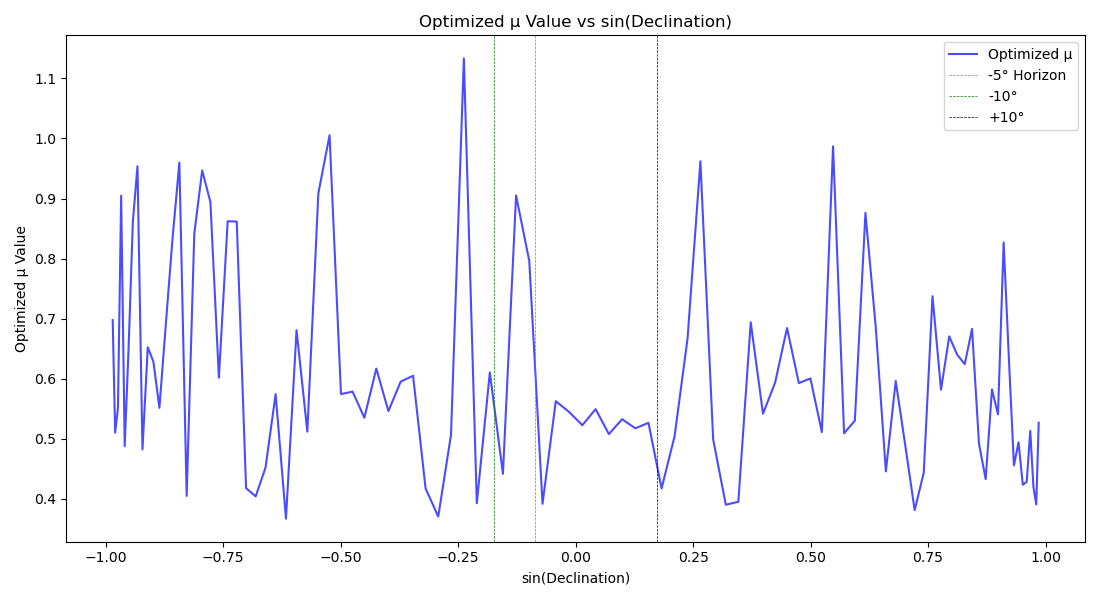

         19482970 function calls (19472354 primitive calls) in 24.031 seconds

   Ordered by: internal time
   List reduced from 1776 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   138199    3.853    0.000   17.810    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2002(pdf)
   597962    3.100    0.000    4.100    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/site-packages/numpy/lib/_stride_tricks_impl.py:349(_broadcast_to)
   138178    2.140    0.000    2.140    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1610(_logpdf)
   419213    1.116    0.000    1.116    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   165088    0.850    0.000    9.073    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:600(argsreduce)
   138199    0.812    

In [4]:
#~Working~# ts value Differential method all Dec #   MuCut 1.0
#~~~~~~~~~#=============================#


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, curve_fit
from scipy.stats import chi2
import time
import json
import cProfile
import pstats
from pstats import SortKey

# Function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Function to compute only the distance between empirical and chi-squared critical values for a given mu
def compute_distance(mu, histogram_2d, x_edges, y_edges, decl):
    distances = []
    mu = mu[0]  # Extract scalar value if mu is passed as an array
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # If no data remains after filtering, skip this iteration
        if len(filtered_y_edges) == 0 or len(filtered_fraction_above_ts_norm) == 0:
            return np.inf  # Return infinity to signal a bad fit
        
        # Fit the chi-squared model to the valid data
        try:
            popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
            df = popt[0]
        except (RuntimeError, ValueError):
            return np.inf  # Skip if fitting fails
        
        # Calculate the chi-squared fit using the valid data
        critical_ts_chi2 = chi2.ppf(1 - 0.0027/2, df)

        # Calculate the distance between the two critical values
        distance = abs(empirical_critical_value - critical_ts_chi2)
        distances.append(distance)
    
    # Return the sum of distances for all declinations
    return np.sum(distances)

# Function to calculate the optimised_3sigma after optimization
def calculate_optimised_3sigma(mu, histogram_2d, x_edges, y_edges, decl):
    mu = mu[0]
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm

        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        if len(filtered_y_edges) == 0 or len(filtered_fraction_above_ts_norm) == 0:
            return None
        
        try:
            popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
            df = popt[0]
        except (RuntimeError, ValueError):
            return None
        
        critical_ts_chi2 = chi2.ppf(1 - 0.0027/2, df)
        return critical_ts_chi2
    return None

def main():
    # Access the individual arrays
    histogram_2d = data['histogram_2d']
    x_edges = data['x_edges']
    y_edges = data['y_edges']
    total_time = 0 
    # Calculate the number of bins
    num_x_bins = len(x_edges) - 1
    num_y_bins = len(y_edges) - 1

    # Print the number of bins
    print("Number of bins along the x-axis:", num_x_bins)
    print("Number of bins along the y-axis:", num_y_bins)

    # Convert declination edges to sine of declination
    sin_x_edges = np.sin(np.radians(x_edges))

    # Arrays to store results
    optimized_mu_values = []
    optimised_3sigma_values = []
    sin_x_midpoints = []

    # Iterate over all declinations and optimize mu
    for idx in range(len(x_edges) - 1):
        start_time = time.time()
        
        decl = (x_edges[idx] + x_edges[idx + 1]) / 2
        sin_decl = np.sin(np.radians(decl))
        
        print(f"\rProcessing declination bin {idx + 1}/{num_x_bins} (Declination: {decl:.2f}°)", end='')
        
        # Optimization using differential evolution
        result = differential_evolution(compute_distance, bounds=[(0, 3)], args=(histogram_2d, x_edges, y_edges, decl))
        
        # Store the results
        optimized_mu_values.append(result.x[0])
        sin_x_midpoints.append(sin_decl)
        
        # Compute and store the optimised_3sigma value
        optimised_3sigma = calculate_optimised_3sigma(result.x, histogram_2d, x_edges, y_edges, decl)
        optimised_3sigma_values.append(optimised_3sigma)
        
        end_time = time.time()
        elapsed_time = end_time - start_time
        total_time += elapsed_time  # Update total time
        
        print(f"\rProcessing declination bin {idx + 1}/{num_x_bins} (Declination: {decl:.2f}°) - Optimized μ: {result.x[0]:.4f} - Optimised 3σ: {optimised_3sigma:.4f} - Time taken: {elapsed_time:.2f} seconds - Total time: {total_time:.2f} seconds", end='')
    
    # Save to a file
    with open('optimized_mu_values_1000.json', 'w') as f:
        json.dump({
            'sin_x_midpoints': sin_x_midpoints,
            'optimized_mu_values': optimized_mu_values,
            'optimised_3sigma_values': optimised_3sigma_values
        }, f)
    print()

    # Plot mu vs sin(declination)
    plt.figure(figsize=(11, 6))
    plt.plot(sin_x_midpoints, optimized_mu_values, color='blue', label='Optimized μ', linewidth=1.5, alpha=0.7)

    # Mark the -5° and -10° declinations as in the example
    plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=.5, label='-5° Horizon')
    plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=.5, label='-10°')
    plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=.5, label='+10°')

    plt.xlabel('sin(Declination)')
    plt.ylabel('Optimized μ Value')
    plt.title('Optimized μ Value vs sin(Declination)')
    plt.grid(False)
    plt.legend()
    plt.tight_layout()

    # Save and show the plot
    plt.savefig('optimized_mu_vs_sin_declination1000.png')
    plt.show()

if __name__ == "__main__":
    profiler = cProfile.Profile()
    profiler.enable()
    
    main()  # Run the main function which includes your code
    
    profiler.disable()
    
    # Output the profiling results
    stats = pstats.Stats(profiler).sort_stats(SortKey.TIME)
    stats.print_stats(10)  # Print the top 10 time-consuming functions

    # Optionally, you can save the profile results to a file
    # stats.dump_stats("profile_results.prof")

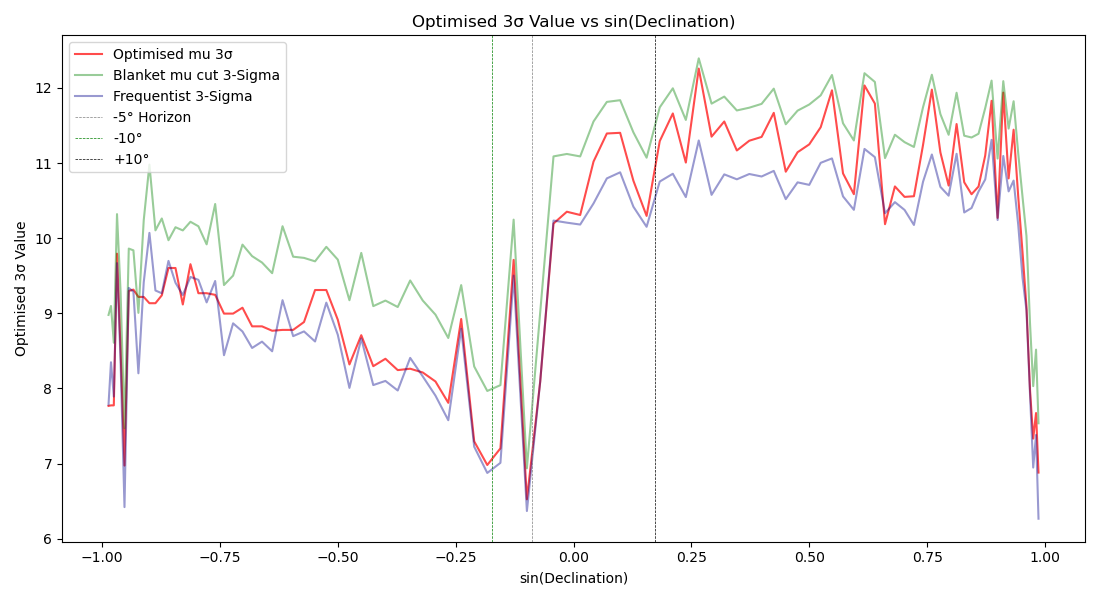

In [36]:
#~~~~~~~~~#=============================#
#~Working~# Comparison with blanket mu  #
#~~~~~~~~~#=============================#
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the saved data
with open('optimized_mu_values_1000.json', 'r') as f:
    data = json.load(f)

# Extract the data
sin_x_midpoints = np.array(data['sin_x_midpoints'])
optimised_3sigma_values = np.array(data['optimised_3sigma_values'])

# Plot optimised_3sigma vs sin(declination)
plt.figure(figsize=(11, 6))
plt.plot(sin_x_midpoints,optimised_3sigma_values, color='red', label='Optimised mu 3σ', linewidth=1.5, alpha=0.7)
plt.plot(sin_x_midpoints,theoretical_3sigma, color='green',linestyle='-', alpha=0.4, label='Blanket mu cut 3-Sigma')
plt.plot(sin_x_midpoints,empirical_3sigma, color='darkblue',linestyle='-', alpha=0.4, label='Frequentist 3-Sigma')

# Mark the -5°, -10°, and +10° declinations as in the example
plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=.5, label='-5° Horizon')
plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=.5, label='-10°')
plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=.5, label='+10°')

plt.xlabel('sin(Declination)')
plt.ylabel('Optimised 3σ Value')
plt.title('Optimised 3σ Value vs sin(Declination)')
plt.grid(False)
plt.legend()
plt.tight_layout()

# Save and show the plot
plt.savefig('optimised_3sigma_vs_sin_declination.png')
plt.show()


In [13]:
##~Working~## P Manual Sin(dec) Diff.##
##~~~~~~~~~##========================##
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Function to find the p-value for a given TS value
def find_p_value(ts_value, cumulative_distribution, y_edges):
    critical_index = np.searchsorted(y_edges[:-1], ts_value, side='right') - 1
    if critical_index < 0:
        return 1.0  # If TS is smaller than the smallest y_edge
    elif critical_index >= len(cumulative_distribution):
        return 0.0  # If TS is larger than the largest y_edge
    else:
        p_value = cumulative_distribution[critical_index] / cumulative_distribution[0]
        return p_value

# Define Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Convert declination edges to sine of declination
sin_x_edges = np.sin(np.radians(x_edges))

# List of mu values to investigate
mu_values = [0.5, 1, 1.5, 2]

# Fixed TS values
fixed_ts_values = [9, 16, 20, 25]

# Plotting for each mu value
fig, axs = plt.subplots(1, len(mu_values), figsize=(20, 6), sharey=True)

# Loop over mu values
for i, mu in enumerate(mu_values):
    sin_x_midpoints = []
    empirical_ts_9 = []
    theoretical_ts_9 = []
    empirical_ts_16 = []
    theoretical_ts_16 = []
    empirical_ts_20 = []
    theoretical_ts_20 = []
    empirical_ts_25 = []
    theoretical_ts_25 = []

    
    # Loop over declination bins
    for idx in range(len(x_edges) - 1):
        total_counts = np.sum(histogram_2d[idx, :])
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            total_trials_norm = cumulative_sum_norm_hist[0]
            fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm
    
            # Apply the mu filter to y_edges and cumulative_sum_norm_hist
            filtered_mask = y_edges[:-1] >= mu
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_cumulative_sum = cumulative_sum_norm_hist[filtered_mask]
    
            # Fit the chi-squared model to the valid data
            popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_cumulative_sum / filtered_cumulative_sum[0], p0=[2.0], maxfev=10000)
            df = popt[0]
    
            # Calculate and store the empirical and theoretical p-values for each TS value
            empirical_ts_9.append(find_p_value(9, cumulative_sum_norm_hist, y_edges[:-1]))
            theoretical_ts_9.append(1 - chi2.cdf(9, df))
    
            empirical_ts_16.append(find_p_value(16, cumulative_sum_norm_hist, y_edges[:-1]))
            theoretical_ts_16.append(1 - chi2.cdf(16, df))
    
            empirical_ts_20.append(find_p_value(20, cumulative_sum_norm_hist, y_edges[:-1]))
            theoretical_ts_20.append(1 - chi2.cdf(20, df))
    
            empirical_ts_25.append(find_p_value(25, cumulative_sum_norm_hist, y_edges[:-1]))
            theoretical_ts_25.append(1 - chi2.cdf(25, df))
    
            # Store the midpoint of sin(declination)
            sin_x_midpoints.append((sin_x_edges[idx] + sin_x_edges[idx + 1]) / 2)

    # Create a new figure for each mu value
    plt.figure(figsize=(8, 6))
    
    # Plot for each TS value with fill_between
    plt.fill_between(sin_x_midpoints, empirical_ts_9, theoretical_ts_9, color='blue', alpha=0.2, label='TS = 9')
    
    plt.plot(sin_x_midpoints, theoretical_ts_9, color='darkblue', linestyle='-', alpha=0.4, label='TS = 9')
    
    plt.fill_between(sin_x_midpoints, empirical_ts_16, theoretical_ts_16, color='green', alpha=0.6, label='TS = 16')
    
    plt.fill_between(sin_x_midpoints, empirical_ts_20, theoretical_ts_20, color='red', alpha=0.2, label='TS = 20')
    
    plt.fill_between(sin_x_midpoints, empirical_ts_25, theoretical_ts_25, color='purple', alpha=0.1, label='TS = 25')
    
    plt.axhline(y=0, color='grey', linestyle='--', linewidth=0.5)
    plt.xlabel('sin(Declination)')
    plt.ylabel('P-value')
    plt.title(f'Empirical vs Theoretical P-values for Fixed TS Values (μ = {mu})')
    plt.legend(loc='upper right', fontsize='small')
    plt.grid(False)
    plt.tight_layout()
    
    # Save and show each plot separately
    plt.savefig(f'Empirical_vs_Theoretical_pvalues_mu_{mu}.png')
    plt.show()

    plt.yscale('log')
    # Save and show each plot separately
    plt.savefig(f'Empirical_vs_Theoretical_pvalues_mu_{mu}.png')
    plt.show()


KeyError: 'histogram_2d'

Exception ignored When destroying _lsprof profiler:
Traceback (most recent call last):
  File "/tmp/ipykernel_9690/3922537400.py", line 186, in <module>
RuntimeError: Cannot install a profile function while another profile function is being installed


Number of bins along the x-axis: 100
Number of bins along the y-axis: 100
Processing declination bin 100/100 (Declination: 80.19°) - Optimized μ: 0.5514 - Time taken: 0.31 seconds - Total time: 22.93 seconds


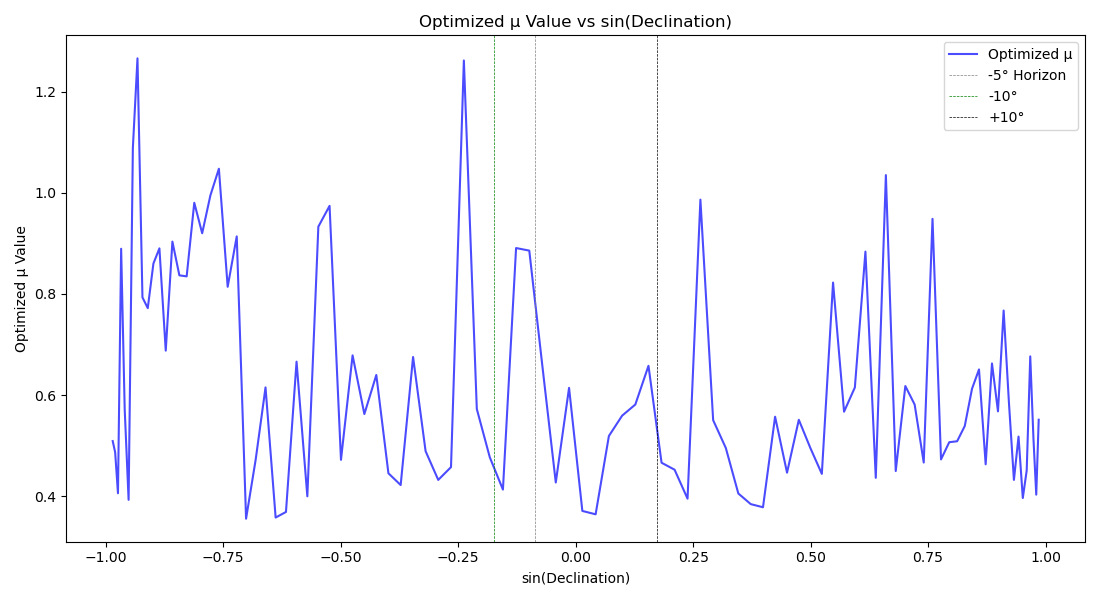

         19185933 function calls (19176300 primitive calls) in 23.257 seconds

   Ordered by: internal time
   List reduced from 1775 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   140632    3.793    0.000   17.601    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2002(pdf)
   590308    3.001    0.000    3.983    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/site-packages/numpy/lib/_stride_tricks_impl.py:349(_broadcast_to)
   140592    2.120    0.000    2.120    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1610(_logpdf)
   408408    1.062    0.000    1.062    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   140632    0.805    0.000    1.336    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1016(_support_mask)
   149772    0.759

In [39]:
#~testing~# Differential method all Dec p-value #
#~~~~~~~~~#=====================================#


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, curve_fit
from scipy.stats import chi2
import time
import json
import cProfile
import pstats
from pstats import SortKey

# Function to find the p-value for a given TS value
def find_p_value(ts_value, cumulative_distribution, y_edges):
    critical_index = np.searchsorted(y_edges[:-1], ts_value, side='right') - 1
    if critical_index < 0:
        return 1.0  # If TS is smaller than the smallest y_edge
    elif critical_index >= len(cumulative_distribution):
        return 0.0  # If TS is larger than the largest y_edge
    else:
        p_value = cumulative_distribution[critical_index] / cumulative_distribution[0]
        return p_value

# Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Function to compute the distance between empirical and chi-squared p-values for a fixed TS value (e.g., TS = 10)
def compute_distance(mu, histogram_2d, x_edges, y_edges, decl):
    distances = []
    mu = mu[0]  # Extract scalar value if mu is passed as an array
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm

        # Fixed TS value to optimize p-value for
        fixed_ts_value = 10
        
        empirical_p_value = find_p_value(fixed_ts_value, cumulative_sum_norm_hist, y_edges[:-1])

        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # If no data remains after filtering, skip this iteration
        if len(filtered_y_edges) == 0 or len(filtered_fraction_above_ts_norm) == 0:
            return np.inf  # Return infinity to signal a bad fit
        
        # Fit the chi-squared model to the valid data
        try:
            popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
            df = popt[0]
        except (RuntimeError, ValueError):
            return np.inf  # Skip if fitting fails
        
        # Calculate the theoretical p-value for the fixed TS value
        theoretical_p_value = 1 - chi2.cdf(fixed_ts_value, df)

        # Calculate the distance between the empirical and theoretical p-values
        distance = abs(empirical_p_value - theoretical_p_value)
        distances.append(distance)
    
    # Return the sum of distances for all declinations
    return np.sum(distances)

# Function to calculate the p-value after optimization
def calculate_optimised_p_value(mu, histogram_2d, x_edges, y_edges, decl):
    mu = mu[0]
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm

        fixed_ts_value = 10
        
        empirical_p_value = find_p_value(fixed_ts_value, cumulative_sum_norm_hist, y_edges[:-1])

        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        if len(filtered_y_edges) == 0 or len(filtered_fraction_above_ts_norm) == 0:
            return None
        
        try:
            popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
            df = popt[0]
        except (RuntimeError, ValueError):
            return None
        
        theoretical_p_value = 1 - chi2.cdf(fixed_ts_value, df)
        return empirical_p_value, theoretical_p_value
    return None

def main():
    # Access the individual arrays
    histogram_2d = data['histogram_2d']
    x_edges = data['x_edges']
    y_edges = data['y_edges']
    total_time = 0 
    # Calculate the number of bins
    num_x_bins = len(x_edges) - 1
    num_y_bins = len(y_edges) - 1

    # Print the number of bins
    print("Number of bins along the x-axis:", num_x_bins)
    print("Number of bins along the y-axis:", num_y_bins)

    # Convert declination edges to sine of declination
    sin_x_edges = np.sin(np.radians(x_edges))

    # Arrays to store results
    optimized_mu_values = []
    optimised_p_values = []
    sin_x_midpoints = []

    # Iterate over all declinations and optimize mu
    for idx in range(len(x_edges) - 1):
        start_time = time.time()
        
        decl = (x_edges[idx] + x_edges[idx + 1]) / 2
        sin_decl = np.sin(np.radians(decl))
        
        print(f"\rProcessing declination bin {idx + 1}/{num_x_bins} (Declination: {decl:.2f}°)", end='')
        
        # Optimization using differential evolution
        result = differential_evolution(compute_distance, bounds=[(0, 3)], args=(histogram_2d, x_edges, y_edges, decl))
        
        # Store the results
        optimized_mu_values.append(result.x[0])
        sin_x_midpoints.append(sin_decl)
        
        # Compute and store the optimized p-values
        optimised_p_value = calculate_optimised_p_value(result.x, histogram_2d, x_edges, y_edges, decl)
        optimised_p_values.append(optimised_p_value)
        
        end_time = time.time()
        elapsed_time = end_time - start_time
        total_time += elapsed_time  # Update total time
        
        print(f"\rProcessing declination bin {idx + 1}/{num_x_bins} (Declination: {decl:.2f}°) - Optimized μ: {result.x[0]:.4f} - Time taken: {elapsed_time:.2f} seconds - Total time: {total_time:.2f} seconds", end='')
    
    # Save to a file
    with open('optimized_mu_values_p_values.json', 'w') as f:
        json.dump({
            'sin_x_midpoints': sin_x_midpoints,
            'optimized_mu_values': optimized_mu_values,
            'optimised_p_values': optimised_p_values
        }, f)
    print()

    # Plot mu vs sin(declination)
    plt.figure(figsize=(11, 6))
    plt.plot(sin_x_midpoints, optimized_mu_values, color='blue', label='Optimized μ', linewidth=1.5, alpha=0.7)

    # Mark the -5° and -10° declinations as in the example
    plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=.5, label='-5° Horizon')
    plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=.5, label='-10°')
    plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=.5, label='+10°')

    plt.xlabel('sin(Declination)')
    plt.ylabel('Optimized μ Value')
    plt.title('Optimized μ Value vs sin(Declination)')
    plt.grid(False)
    plt.legend()
    plt.tight_layout()

    # Save and show the plot
    plt.savefig('optimized_mu_vs_sin_declination_p_values.png')
    plt.show()

if __name__ == "__main__":
    profiler = cProfile.Profile()
    profiler.enable()
    
    main()  # Run the main function which includes your code
    
    profiler.disable()
    
    # Output the profiling results
    stats = pstats.Stats(profiler).sort_stats(SortKey.TIME)
    stats.print_stats(10)  # Print the top 10 time-consuming functions

    # Optionally, you can save the profile results to a file
    # stats.dump_stats("profile_results.prof")

In [ ]:
#~Working~# p value Comparison with blanket mu  #
#~~~~~~~~~#=====================================#
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the saved data
with open('optimized_mu_values_p_values.json', 'r') as f:
    data = json.load(f)

# Extract the data
sin_x_midpoints = np.array(data['sin_x_midpoints'])
optimised_p_values = np.array(data['optimised_p_values'])
plt.plot(sin_x_midpoints, optimised_p_values, color='red',linestyle='-', alpha=0.7, label='Optimised mu')
plt.plot(sin_x_midpoints, theoretical_p_values, color='green', linestyle='-', alpha=0.4, label='Blanket mu cut 3-Sigma')
plt.plot(sin_x_midpoints, empirical_p_values, color= 'darkblue', linestyle='-', alpha=0.4, label='Frequentist 3-Sigma')

# Mark the -5°, -10°, and +10° declinations as in the example
plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=.5, label='-5° Horizon')
plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=.5, label='-10°')
plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=.5, label='+10°')

plt.xlabel('sin(Declination)')
plt.ylabel('Optimised 3σ Value')
plt.title('Optimised 3σ Value vs sin(Declination)')
plt.grid(False)
plt.legend()
plt.tight_layout()

# Save and show the plot
plt.savefig('optimised_3sigma_vs_sin_declination.png')
plt.show()


In [53]:
#~~~~~~~~~#
#~Testing~# Average Mu 
#~~~~~~~~~#

import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
import cProfile
import pstats
from pstats import SortKey

def compute_distance(mu, histogram_2d, x_edges, y_edges, decl):
    # Placeholder for your actual compute_distance function
    return np.random.rand()

def run_optimization(x_edges, histogram_2d, num_x_bins):
    optimized_mu_values = []
    sin_x_midpoints = []
    total_time = 0  # Initialize total time

    # Iterate over all declinations and optimize mu
    for idx in range(len(x_edges) - 1):
        start_time = time.time()
        
        decl = (x_edges[idx] + x_edges[idx + 1]) / 2
        sin_decl = np.sin(np.radians(decl))
        
        if idx == 0:
            print(f"Starting optimization...")

        # Optimization using differential evolution
        result = differential_evolution(compute_distance, bounds=[(0, 2)], args=(histogram_2d, x_edges, y_edges, decl))
        
        # Store the results
        optimized_mu_values.append(result.x[0])
        sin_x_midpoints.append(sin_decl)
        
        end_time = time.time()
        elapsed_time = end_time - start_time
        total_time += elapsed_time  # Update total time
        
        print(f"\rProcessing declination bin {idx + 1}/{num_x_bins} (Declination: {decl:.2f}°) - Optimized μ: {result.x[0]:.4f} - Time taken: {elapsed_time:.2f} seconds - Total time: {total_time:.2f} seconds", end='')

    print()  # Ensure the next print starts on a new line
    
    return sin_x_midpoints, optimized_mu_values

def main():
    # Configuration
    num_x_bins = 10
    x_edges = np.linspace(-90, 90, num_x_bins + 1)
    histogram_2d = np.random.rand(num_x_bins, num_x_bins)  # Placeholder
    
    num_runs = 10
    all_mu_values = []

    for run in range(num_runs):
        print(f"\n--- Run {run + 1}/{num_runs} ---")
        sin_x_midpoints, optimized_mu_values = run_optimization(x_edges, histogram_2d, num_x_bins)
        all_mu_values.append(optimized_mu_values)

    # Compute the average of the optimized μ values
    average_mu_values = np.mean(all_mu_values, axis=0)
    
    # Plot average mu vs sin(declination)
    plt.figure(figsize=(11, 6))
    plt.plot(sin_x_midpoints, average_mu_values, color='blue', label='Average Optimized μ', linewidth=1.5, alpha=0.7)

    # Mark the -5° and -10° declinations as in the example
    plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=.5, label='-5° Horizon')
    plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=.5, label='-10°')
    plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=.5, label='+10°')

    plt.xlabel('sin(Declination)')
    plt.ylabel('Average Optimized μ Value')
    plt.title('Average Optimized μ Value vs sin(Declination)')
    plt.grid(False)
    plt.legend()
    plt.tight_layout()

    # Save and show the plot
    plt.savefig('average_optimized_mu_vs_sin_declination.png')
    plt.show()

if __name__ == "__main__":
    profiler = cProfile.Profile()
    
    try:
        profiler.enable()
        main()  # Run the main function which includes your code
        profiler.disable()
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        # Safely print and handle the profiling results
        stats = pstats.Stats(profiler).sort_stats(SortKey.TIME)
        stats.print_stats(10)  # Print the top 10 time-consuming functions

        # Optionally, you can save the profile results to a file
        # stats.dump_stats("profile_results.prof")


--- Run 1/10 ---
Starting optimization...
Processing declination bin 10/10 (Declination: 81.00°) - Optimized μ: 0.0900 - Time taken: 0.73 seconds - Total time: 7.28 seconds

--- Run 2/10 ---
Starting optimization...
Processing declination bin 10/10 (Declination: 81.00°) - Optimized μ: 1.1309 - Time taken: 0.73 seconds - Total time: 7.43 seconds

--- Run 3/10 ---
Starting optimization...
Processing declination bin 6/10 (Declination: 9.00°) - Optimized μ: 0.7576 - Time taken: 0.71 seconds - Total time: 4.36 secondsss         12009590 function calls in 19.455 seconds

   Ordered by: internal time
   List reduced from 238 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   397669    4.018    0.000   10.122    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/site-packages/scipy/optimize/_differentialevolution.py:1734(_mutate)
   397669    2.021    0.000    2.021    0.000 /home/kennedyc/miniforge3/envs/jupenv/lib/python3.10/sit

KeyboardInterrupt: 

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.optimize import minimize_scalar
from functools import lru_cache

# Cache the chi2 PDF values to avoid recomputation
@lru_cache(maxsize=None)
def cached_chi2_pdf(k, df):
    return chi2.pdf(k, df)

# Function to calculate the empirical slope at the critical value
def empirical_slope(cumulative_sum_norm_hist, y_edges, critical_value):
    idx = np.searchsorted(y_edges, critical_value) - 1
    if idx < 0 or idx >= len(cumulative_sum_norm_hist) - 1:
        return None
    
    x1, x2 = y_edges[idx], y_edges[idx + 1]
    y1, y2 = cumulative_sum_norm_hist[idx], cumulative_sum_norm_hist[idx + 1]
    return (y2 - y1) / (x2 - x1)

# Function to calculate the slope of the chi-square distribution at a given mu
def chi2_slope(critical_value, df):
    delta = 1e-5
    pdf1 = cached_chi2_pdf(critical_value - delta, df)
    pdf2 = cached_chi2_pdf(critical_value + delta, df)
    return (pdf2 - pdf1) / (2 * delta)

# Function to find the optimal mu
def find_optimal_mu(cumulative_sum_norm_hist, y_edges, critical_value):
    emp_slope = empirical_slope(cumulative_sum_norm_hist, y_edges, critical_value)
    
    if emp_slope is None:
        return None

    def objective(mu):
        df = mu  # Assuming mu is directly related to the degrees of freedom
        chi_slope = chi2_slope(critical_value, df)
        return abs(emp_slope - chi_slope)
    
    result = minimize_scalar(objective, bounds=(0.1, 10), method='bounded')
    return result.x

def main():
    # Assuming the data variable is provided and structured as follows:
    # data = {'histogram_2d': ..., 'x_edges': ..., 'y_edges': ...}
    histogram_2d = data['histogram_2d']
    x_edges = data['x_edges']
    y_edges = data['y_edges']

    # Arrays to store results
    optimized_mu_values = []
    sin_x_midpoints = []

    for idx in range(len(x_edges) - 1):
        decl = (x_edges[idx] + x_edges[idx + 1]) / 2
        sin_decl = np.sin(np.radians(decl))
        
        total_counts = np.sum(histogram_2d[idx, :])
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            empirical_critical_value = y_edges[np.searchsorted(cumulative_sum_norm_hist, 0.0027/2)]

            optimal_mu = find_optimal_mu(cumulative_sum_norm_hist, y_edges, empirical_critical_value)
            if optimal_mu is not None:
                optimized_mu_values.append(optimal_mu)
                sin_x_midpoints.append(sin_decl)
            else:
                print(f"Warning: Could not find optimal mu for declination bin {idx + 1}")
        else:
            print(f"Warning: No counts for declination bin {idx + 1}")

    if len(optimized_mu_values) == 0:
        print("No valid mu values were calculated. Check the data.")
        return

    # Plot mu vs sin(declination)
    plt.figure(figsize=(11, 6))
    plt.plot(sin_x_midpoints, optimized_mu_values, color='blue', label='Optimized μ', linewidth=1.5, alpha=0.7)

    # Mark the -5° and -10° declinations as in the example
    plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=.5, label='-5° Horizon')
    plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=.5, label='-10°')
    plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=.5, label='+10°')

    plt.xlabel('sin(Declination)')
    plt.ylabel('Optimized μ Value')
    plt.title('Optimized μ Value vs sin(Declination)')
    plt.grid(False)
    plt.legend()
    plt.tight_layout()

    # Save and show the plot
    plt.savefig('optimized_mu_vs_sin_declination22.png')
    plt.show()

if __name__ == "__main__":
    main()

No valid mu values were calculated. Check the data.



Processing declination bin 1/100 (Declination: -80.19°)
Empirical critical value: 7.7868, Empirical slope: -9.5211e-04
Optimized μ: 0.6935, Chi-square slope: -9.5210e-04

Processing declination bin 2/100 (Declination: -78.57°)
Empirical critical value: 8.3490, Empirical slope: -8.2616e-04
Optimized μ: 0.7905, Chi-square slope: -8.2616e-04

Processing declination bin 3/100 (Declination: -76.95°)
Empirical critical value: 7.8926, Empirical slope: -8.5929e-04
Optimized μ: 0.6750, Chi-square slope: -8.5929e-04

Processing declination bin 4/100 (Declination: -75.33°)
Empirical critical value: 9.6682, Empirical slope: -7.7194e-04
Optimized μ: 1.2019, Chi-square slope: -7.7194e-04

Processing declination bin 5/100 (Declination: -73.71°)
Empirical critical value: 8.3594, Empirical slope: -8.7663e-04
Optimized μ: 0.8253, Chi-square slope: -8.7663e-04

Processing declination bin 6/100 (Declination: -72.09°)
Empirical critical value: 6.4220, Empirical slope: -9.0712e-04
Optimized μ: 8.3154, Chi-

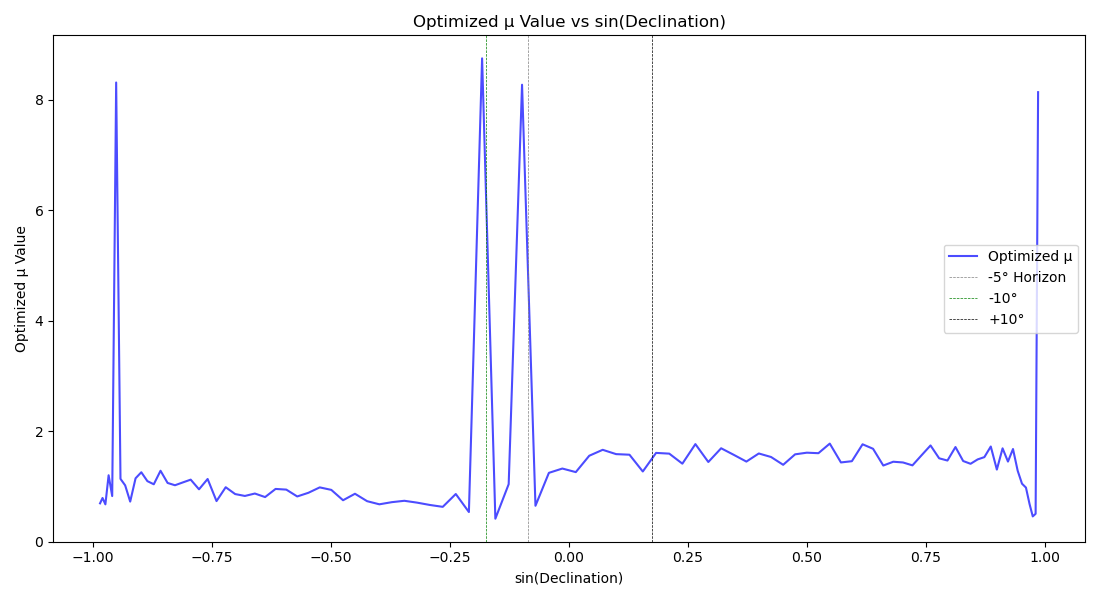

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.optimize import minimize_scalar
from functools import lru_cache

# Cache the chi2 PDF values to avoid recomputation
@lru_cache(maxsize=None)
def cached_chi2_pdf(k, df):
    return chi2.pdf(k, df)

# Function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        return y_edges[-1]
    elif critical_index == 0:
        return y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        return y0 + slope * (target - x0)

# Function to calculate the slope of the chi-square distribution at a given mu
def chi2_slope(critical_value, df):
    delta = 1e-5
    pdf1 = cached_chi2_pdf(critical_value - delta, df)
    pdf2 = cached_chi2_pdf(critical_value + delta, df)
    return (pdf2 - pdf1) / (2 * delta)

# Function to calculate the empirical slope at the critical value
def empirical_slope(cumulative_sum_norm_hist, y_edges, critical_value):
    idx = np.searchsorted(y_edges, critical_value) - 1
    if idx < 0 or idx >= len(cumulative_sum_norm_hist) - 1:
        return None
    
    x1, x2 = y_edges[idx], y_edges[idx + 1]
    y1, y2 = cumulative_sum_norm_hist[idx], cumulative_sum_norm_hist[idx + 1]
    return (y2 - y1) / (x2 - x1)

# Function to find the optimal mu
def find_optimal_mu(cumulative_sum_norm_hist, y_edges, critical_value):
    emp_slope = empirical_slope(cumulative_sum_norm_hist, y_edges, critical_value)
    
    if emp_slope is None:
        print("Empirical slope is None, skipping this bin.")
        return None

    print(f"Empirical critical value: {critical_value:.4f}, Empirical slope: {emp_slope:.4e}")

    def objective(mu):
        df = mu  # Assuming mu is directly related to the degrees of freedom
        chi_slope = chi2_slope(critical_value, df)
        return abs(emp_slope - chi_slope)
    
    result = minimize_scalar(objective, bounds=(0.1, 10), method='bounded')
    if result.success:
        final_chi_slope = chi2_slope(critical_value, result.x)
        print(f"Optimized μ: {result.x:.4f}, Chi-square slope: {final_chi_slope:.4e}")
    else:
        print(f"Optimization failed for critical value {critical_value:.4f}")
        return None
    
    return result.x

def main():
    # Assuming the data variable is provided and structured as follows:
    # data = {'histogram_2d': ..., 'x_edges': ..., 'y_edges': ...}
    histogram_2d = data['histogram_2d']
    x_edges = data['x_edges']
    y_edges = data['y_edges']

    # Arrays to store results
    optimized_mu_values = []
    sin_x_midpoints = []

    for idx in range(len(x_edges) - 1):
        decl = (x_edges[idx] + x_edges[idx + 1]) / 2
        sin_decl = np.sin(np.radians(decl))
        
        print(f"\nProcessing declination bin {idx + 1}/{len(x_edges) - 1} (Declination: {decl:.2f}°)")
        
        total_counts = np.sum(histogram_2d[idx, :])
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

            optimal_mu = find_optimal_mu(cumulative_sum_norm_hist, y_edges, empirical_critical_value)
            if optimal_mu is not None:
                optimized_mu_values.append(optimal_mu)
                sin_x_midpoints.append(sin_decl)
            else:
                print(f"Warning: Could not find optimal mu for declination bin {idx + 1}")
        else:
            print(f"Warning: No counts for declination bin {idx + 1}")

    if len(optimized_mu_values) == 0:
        print("No valid mu values were calculated. Check the data.")
        return

    # Plot mu vs sin(declination)
    plt.figure(figsize=(11, 6))
    plt.plot(sin_x_midpoints, optimized_mu_values, color='blue', label='Optimized μ', linewidth=1.5, alpha=0.7)

    # Mark the -5° and -10° declinations as in the example
    plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=.5, label='-5° Horizon')
    plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=.5, label='-10°')
    plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=.5, label='+10°')

    plt.xlabel('sin(Declination)')
    plt.ylabel('Optimized μ Value')
    plt.title('Optimized μ Value vs sin(Declination)')
    plt.grid(False)
    plt.legend()
    plt.tight_layout()

    # Save and show the plot
    plt.savefig('optimized_mu_vs_sin_declination.png')
    plt.show()

if __name__ == "__main__":
    main()


Processing declination bin 11 (Declination: -63.99°)
Empirical critical value: 10.0705, Empirical slope: -6.7045e-04
Optimized μ: 1.2563, Chi-square slope: -6.7045e-04
Sum of squared residuals for Decl = -63.989999999999995: 0.0004
Error Empirical/Fit : -0.6764


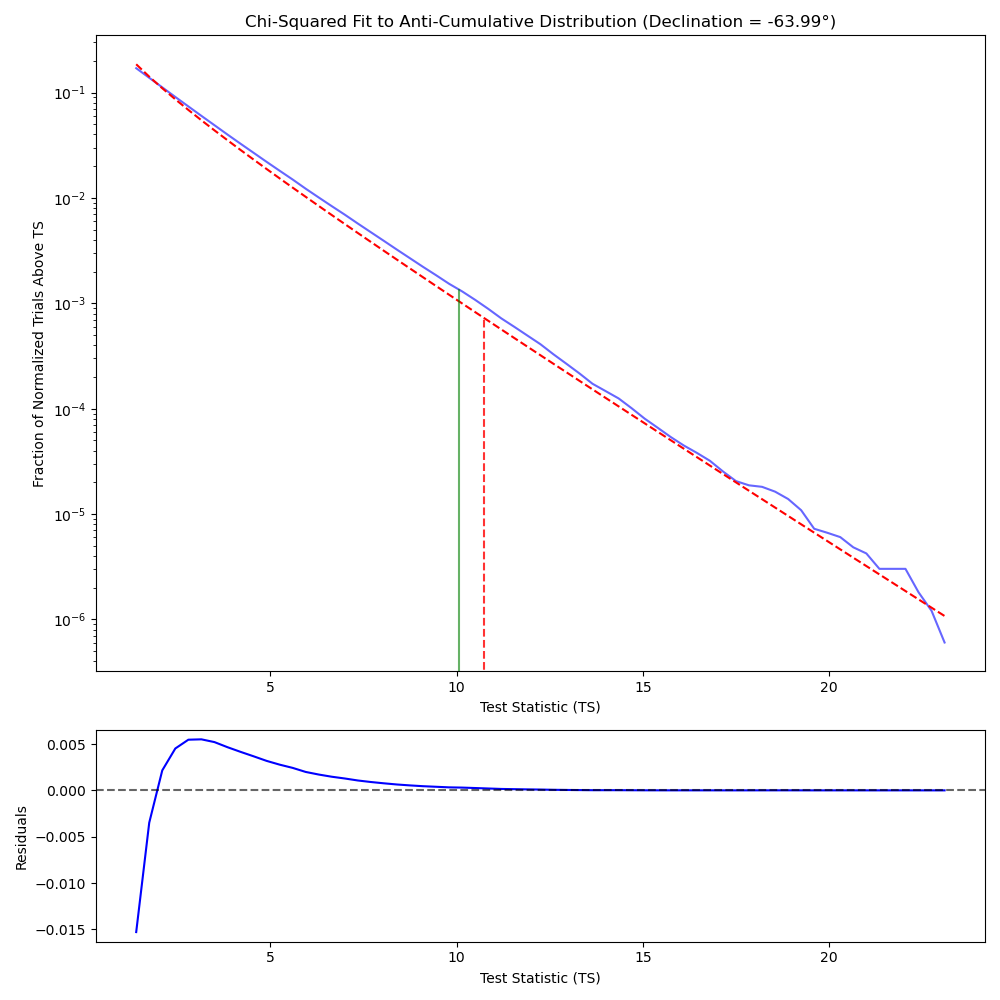

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.optimize import curve_fit, minimize_scalar

# Cache the chi2 PDF values to avoid recomputation
def cached_chi2_pdf(k, df):
    # We avoid caching here since it creates issues with curve_fit
    return chi2.pdf(k, df)

# Function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        return y_edges[-1]
    elif critical_index == 0:
        return y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        return y0 + slope * (target - x0)

# Function to calculate the slope of the chi-square distribution at a given mu
def chi2_slope(critical_value, df):
    delta = 1e-5
    pdf1 = cached_chi2_pdf(critical_value - delta, df)
    pdf2 = cached_chi2_pdf(critical_value + delta, df)
    return (pdf2 - pdf1) / (2 * delta)

# Function to calculate the empirical slope at the critical value
def empirical_slope(cumulative_sum_norm_hist, y_edges, critical_value):
    idx = np.searchsorted(y_edges, critical_value) - 1
    if idx < 0 or idx >= len(cumulative_sum_norm_hist) - 1:
        return None
    
    x1, x2 = y_edges[idx], y_edges[idx + 1]
    y1, y2 = cumulative_sum_norm_hist[idx], cumulative_sum_norm_hist[idx + 1]
    return (y2 - y1) / (x2 - x1)

# Function to find the optimal mu
def find_optimal_mu(cumulative_sum_norm_hist, y_edges, critical_value):
    emp_slope = empirical_slope(cumulative_sum_norm_hist, y_edges, critical_value)
    
    if emp_slope is None:
        print("Empirical slope is None, skipping this bin.")
        return None

    print(f"Empirical critical value: {critical_value:.4f}, Empirical slope: {emp_slope:.4e}")

    def objective(mu):
        df = mu  # Assuming mu is directly related to the degrees of freedom
        chi_slope = chi2_slope(critical_value, df)
        return abs(emp_slope - chi_slope)
    
    result = minimize_scalar(objective, bounds=(0.1, 10), method='bounded')
    if result.success:
        final_chi_slope = chi2_slope(critical_value, result.x)
        print(f"Optimized μ: {result.x:.4f}, Chi-square slope: {final_chi_slope:.4e}")
    else:
        print(f"Optimization failed for critical value {critical_value:.4f}")
        return None
    
    return result.x

# Wrapper function for curve_fit to use the cached PDF
def chi_squared_model(x, df):
    return chi2.pdf(x, df)

def plot_single_declination():
    # Assuming the data variable is provided and structured as follows:
    # data = {'histogram_2d': ..., 'x_edges': ..., 'y_edges': ...}
    histogram_2d = data['histogram_2d']
    x_edges = data['x_edges']
    y_edges = data['y_edges']

    # Choose the specific declination bin to analyze
    specific_idx = 10 # Change this index to select a specific declination bin
    decl = (x_edges[specific_idx] + x_edges[specific_idx + 1]) / 2
    sin_decl = np.sin(np.radians(decl))
    
    print(f"\nProcessing declination bin {specific_idx + 1} (Declination: {decl:.2f}°)")
    
    total_counts = np.sum(histogram_2d[specific_idx, :])
    if total_counts > 0:
        normalized_histogram = histogram_2d[specific_idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        optimal_mu = find_optimal_mu(cumulative_sum_norm_hist, y_edges, empirical_critical_value)
        if optimal_mu is not None:
            # Apply the mu filter to y_edges and cumulative_sum_norm_hist
            filtered_mask = (y_edges[:-1] >= optimal_mu) & (cumulative_sum_norm_hist > 0)
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = cumulative_sum_norm_hist[filtered_mask]

            # Fit the chi-squared model to the valid data
            popt, pcov = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[optimal_mu], maxfev=10000)
            df = popt[0]
            df_err = np.sqrt(np.diag(pcov))[0]

            # Calculate the chi-squared fit using the valid data
            chi_squared_fit = chi_squared_model(filtered_y_edges, df)

            # Initialize plot with two subplots: one for the fit and one for the residuals
            fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

            # Plot the empirical anti-cumulative distribution
            ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color='blue', label='Empirical', alpha=0.6)

            # Plot the chi-squared fit
            ax.plot(filtered_y_edges, chi_squared_fit, color='red', linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')

            # Calculate residuals and plot them
            residuals = filtered_fraction_above_ts_norm - chi_squared_fit
            ax_res.plot(filtered_y_edges, residuals, color='blue', linestyle='-', label='Residuals')

            # Calculate and print the sum of squared residuals
            sum_squared_residuals = np.sum(residuals**2)
            print(f'Sum of squared residuals for Decl = {decl}: {sum_squared_residuals:.4f}')

            # Optional: Plot vertical line at empirical critical value
            y_critical = np.interp(empirical_critical_value, filtered_y_edges, filtered_fraction_above_ts_norm)
            ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color='green', linestyle='-', alpha=0.6)

            # Calculate the 3-sigma critical value from the chi-squared distribution
            critical_ts_chi2 = chi2.ppf(1 - 0.0027/2, df)

            # Find the corresponding y value on the chi-squared fit curve
            y_critical_chi2 = chi_squared_model(critical_ts_chi2, df)

            # Plot the vertical line for the chi-squared 3-sigma critical value
            ax.plot([critical_ts_chi2, critical_ts_chi2], [0, y_critical_chi2], color='red', linestyle='--', alpha=0.8)

            # Calculate and print the distance between the empirical and chi-squared 3-sigma critical values
            distance_between_lines = empirical_critical_value - critical_ts_chi2
            print(f'Error Empirical/Fit : {distance_between_lines:.4f}')

            # Finalize the plot
            ax.set_xlabel('Test Statistic (TS)')
            ax.set_ylabel('Fraction of Normalized Trials Above TS')
            ax.set_title(f'Chi-Squared Fit to Anti-Cumulative Distribution (Declination = {decl:.2f}°)')
            ax.grid(False)
            ax.set_yscale('log')

            # Residuals plot
            ax_res.set_xlabel('Test Statistic (TS)')
            ax_res.set_ylabel('Residuals')
            ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
            ax_res.grid(False)

            plt.tight_layout()
            plt.show()

        else:
            print(f"Warning: Could not find optimal mu for declination bin {specific_idx + 1}")
    else:
        print(f"Warning: No counts for declination bin {specific_idx + 1}")

if __name__ == "__main__":
    plot_single_declination()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.optimize import curve_fit, minimize_scalar

# Function to calculate the slope and intercept of the empirical data
def empirical_slope_intercept(cumulative_sum_norm_hist, y_edges, critical_value):
    idx = np.searchsorted(y_edges, critical_value) - 1
    if idx < 0 or idx >= len(cumulative_sum_norm_hist) - 1:
        return None, None
    
    x1, x2 = y_edges[idx], y_edges[idx + 1]
    y1, y2 = cumulative_sum_norm_hist[idx], cumulative_sum_norm_hist[idx + 1]
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1
    return slope, intercept

# Function to calculate the slope and intercept of the chi-square distribution at a given df
def chi2_slope_intercept(critical_value, df):
    delta = 1e-5
    pdf1 = chi2.pdf(critical_value - delta, df)
    pdf2 = chi2.pdf(critical_value + delta, df)
    slope = (pdf2 - pdf1) / (2 * delta)
    intercept = chi2.pdf(critical_value, df) - slope * critical_value
    return slope, intercept

# Function to find the optimal df that matches both slope and intercept
def find_optimal_mu(cumulative_sum_norm_hist, y_edges, critical_value):
    emp_slope, emp_intercept = empirical_slope_intercept(cumulative_sum_norm_hist, y_edges, critical_value)
    
    if emp_slope is None or emp_intercept is None:
        print("Empirical slope/intercept is None, skipping this bin.")
        return None

    print(f"Empirical critical value: {critical_value:.4f}, Empirical slope: {emp_slope:.4e}, Empirical intercept: {emp_intercept:.4e}")

    def objective(df):
        chi_slope, chi_intercept = chi2_slope_intercept(critical_value, df)
        slope_diff = emp_slope - chi_slope
        intercept_diff = emp_intercept - chi_intercept
        return np.sqrt(slope_diff**2 + intercept_diff**2)
    
    result = minimize_scalar(objective, bounds=(0.1, 10), method='bounded')
    if result.success:
        final_chi_slope, final_chi_intercept = chi2_slope_intercept(critical_value, result.x)
        print(f"Optimized μ: {result.x:.4f}, Chi-square slope: {final_chi_slope:.4e}, Chi-square intercept: {final_chi_intercept:.4e}")
    else:
        print(f"Optimization failed for critical value {critical_value:.4f}")
        return None
    
    return result.x

# Wrapper function for curve_fit to use the chi-square model
def chi_squared_model(x, df):
    return chi2.pdf(x, df)

def plot_single_declination():
    # Assuming the data variable is provided and structured as follows:
    # data = {'histogram_2d': ..., 'x_edges': ..., 'y_edges': ...}
    histogram_2d = data['histogram_2d']
    x_edges = data['x_edges']
    y_edges = data['y_edges']

    # Choose the specific declination bin to analyze
    specific_idx = 10  # Change this index to select a specific declination bin
    decl = (x_edges[specific_idx] + x_edges[specific_idx + 1]) / 2
    sin_decl = np.sin(np.radians(decl))
    
    print(f"\nProcessing declination bin {specific_idx + 1} (Declination: {decl:.2f}°)")
    
    total_counts = np.sum(histogram_2d[specific_idx, :])
    if total_counts > 0:
        normalized_histogram = histogram_2d[specific_idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        optimal_mu = find_optimal_mu(cumulative_sum_norm_hist, y_edges, empirical_critical_value)
        if optimal_mu is not None:
            # Apply the mu filter to y_edges and cumulative_sum_norm_hist
            filtered_mask = (y_edges[:-1] >= optimal_mu) & (cumulative_sum_norm_hist > 0)
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = cumulative_sum_norm_hist[filtered_mask]

            # Fit the chi-squared model to the valid data
            popt, pcov = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[optimal_mu], maxfev=10000)
            df = popt[0]
            df_err = np.sqrt(np.diag(pcov))[0]

            # Calculate the chi-squared fit using the valid data
            chi_squared_fit = chi_squared_model(filtered_y_edges, df)

            # Initialize plot with two subplots: one for the fit and one for the residuals
            fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

            # Plot the empirical anti-cumulative distribution
            ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color='blue', label='Empirical', alpha=0.6)

            # Plot the chi-squared fit
            ax.plot(filtered_y_edges, chi_squared_fit, color='red', linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')

            # Calculate residuals and plot them
            residuals = filtered_fraction_above_ts_norm - chi_squared_fit
            ax_res.plot(filtered_y_edges, residuals, color='blue', linestyle='-', label='Residuals')

            # Calculate and print the sum of squared residuals
            sum_squared_residuals = np.sum(residuals**2)
            print(f'Sum of squared residuals for Decl = {decl}: {sum_squared_residuals:.4f}')

            # Optional: Plot vertical line at empirical critical value
            y_critical = np.interp(empirical_critical_value, filtered_y_edges, filtered_fraction_above_ts_norm)
            ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color='blue', linestyle='--', alpha=0.6)

            # Calculate the 3-sigma critical value from the chi-squared distribution
            critical_ts_chi2 = chi2.ppf(1 - 0.0027/2, df)
            print(f"Chi-square value for 3-sigma: {critical_ts_chi2:.4f}")

            # Find the corresponding y value on the chi-squared fit curve
            y_critical_chi2 = chi_squared_model(critical_ts_chi2, df)

            # Plot the vertical line for the chi-squared 3-sigma critical value
            ax.plot([critical_ts_chi2, critical_ts_chi2], [0, y_critical_chi2], color='red', linestyle='--', alpha=0.8)

            # Calculate and print the distance between the empirical and chi-squared 3-sigma critical values
            distance_between_lines = empirical_critical_value - critical_ts_chi2
            print(f'Error Empirical/Fit : {distance_between_lines:.4f}')

            # Finalize the plot
            ax.set_xlabel('Test Statistic (TS)')
            ax.set_ylabel('Fraction of Normalized Trials Above TS')
            ax.set_title(f'Chi-Squared Fit to Anti-Cumulative Distribution (Declination = {decl:.2f}°)')
            ax.grid(False)
            ax.set_yscale('log')

            # Residuals plot
            ax_res.set_xlabel('Test Statistic (TS)')
            ax_res.set_ylabel('Residuals')
            ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
            ax_res.grid(False)

            plt.tight_layout()
            plt.show()

        else:
            print(f"Warning: Could not find optimal mu for declination bin {specific_idx + 1}")
    else:
        print(f"Warning: No counts for declination bin {specific_idx + 1}")

if __name__ == "__main__":
    plot_single_declination()



Processing declination bin 1/100 (Declination: -80.19°)
Empirical critical value: 7.7868, Empirical slope: -9.5211e-04
Optimized μ: 0.6935, Chi-square slope: -9.5210e-04
Error Empirical/Fit: -1.3275

Processing declination bin 2/100 (Declination: -78.57°)
Empirical critical value: 8.3490, Empirical slope: -8.2616e-04
Optimized μ: 0.7905, Chi-square slope: -8.2616e-04
Error Empirical/Fit: -1.1560

Processing declination bin 3/100 (Declination: -76.95°)
Empirical critical value: 7.8926, Empirical slope: -8.5929e-04
Optimized μ: 0.6750, Chi-square slope: -8.5929e-04
Error Empirical/Fit: -1.1438

Processing declination bin 4/100 (Declination: -75.33°)
Empirical critical value: 9.6682, Empirical slope: -7.7194e-04
Optimized μ: 1.2019, Chi-square slope: -7.7194e-04
Error Empirical/Fit: -1.2745

Processing declination bin 5/100 (Declination: -73.71°)
Empirical critical value: 8.3594, Empirical slope: -8.7663e-04
Optimized μ: 0.8253, Chi-square slope: -8.7663e-04
Error Empirical/Fit: -1.2798


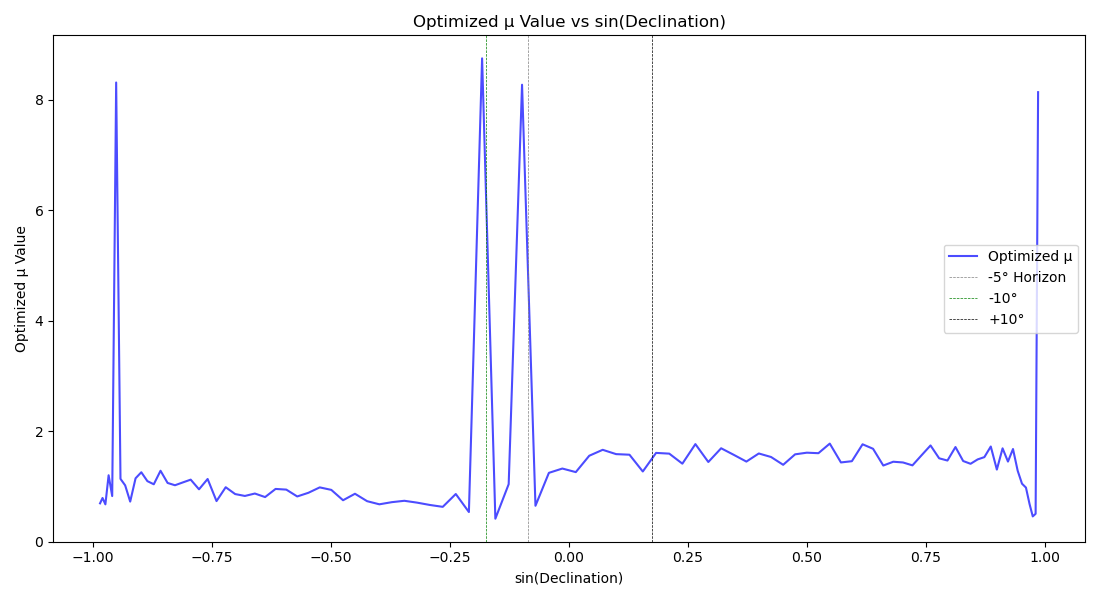

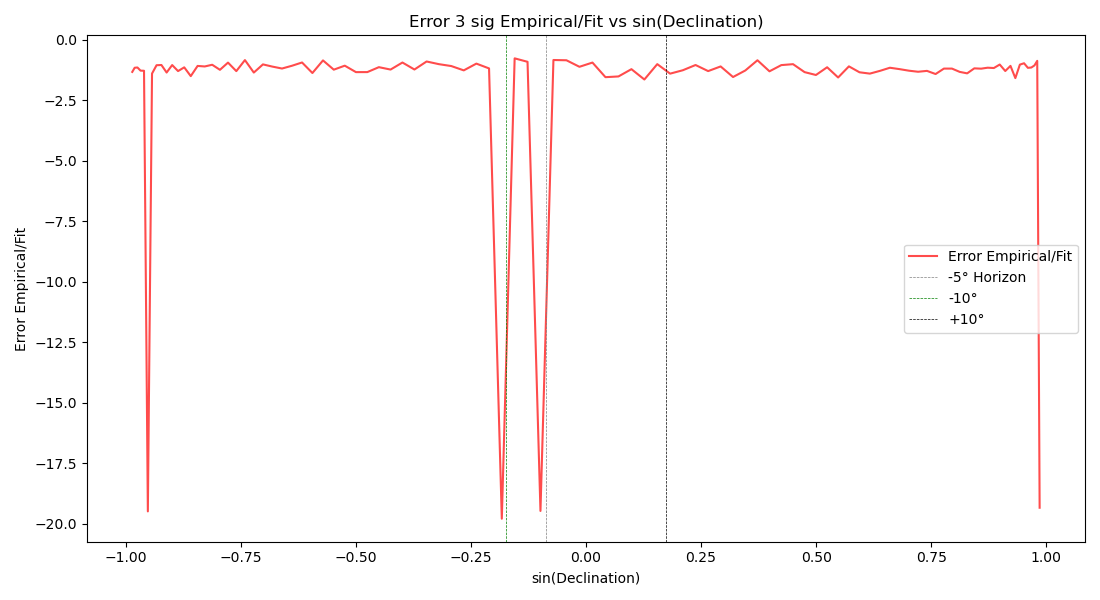

In [47]:
#~~~~~~~~~#
#~Working~#
#~~~~~~~~~#
#Empirical/fit vs declination + Optimised Mu 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.optimize import minimize_scalar
from functools import lru_cache

# Cache the chi2 PDF values to avoid recomputation
@lru_cache(maxsize=None)
def cached_chi2_pdf(k, df):
    return chi2.pdf(k, df)

# Function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        return y_edges[-1]
    elif critical_index == 0:
        return y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        return y0 + slope * (target - x0)

# Function to calculate the slope of the chi-square distribution at a given mu
def chi2_slope(critical_value, df):
    delta = 1e-5
    pdf1 = cached_chi2_pdf(critical_value - delta, df)
    pdf2 = cached_chi2_pdf(critical_value + delta, df)
    return (pdf2 - pdf1) / (2 * delta)

# Function to calculate the empirical slope at the critical value
def empirical_slope(cumulative_sum_norm_hist, y_edges, critical_value):
    idx = np.searchsorted(y_edges, critical_value) - 1
    if idx < 0 or idx >= len(cumulative_sum_norm_hist) - 1:
        return None
    
    x1, x2 = y_edges[idx], y_edges[idx + 1]
    y1, y2 = cumulative_sum_norm_hist[idx], cumulative_sum_norm_hist[idx + 1]
    return (y2 - y1) / (x2 - x1)

# Function to find the optimal mu
def find_optimal_mu(cumulative_sum_norm_hist, y_edges, critical_value):
    emp_slope = empirical_slope(cumulative_sum_norm_hist, y_edges, critical_value)
    
    if emp_slope is None:
        print("Empirical slope is None, skipping this bin.")
        return None

    print(f"Empirical critical value: {critical_value:.4f}, Empirical slope: {emp_slope:.4e}")

    def objective(mu):
        df = mu  # Assuming mu is directly related to the degrees of freedom
        chi_slope = chi2_slope(critical_value, df)
        return abs(emp_slope - chi_slope)
    
    result = minimize_scalar(objective, bounds=(0.1, 10), method='bounded')
    if result.success:
        final_chi_slope = chi2_slope(critical_value, result.x)
        print(f"Optimized μ: {result.x:.4f}, Chi-square slope: {final_chi_slope:.4e}")
    else:
        print(f"Optimization failed for critical value {critical_value:.4f}")
        return None
    
    return result.x

def main():
    # Assuming the data variable is provided and structured as follows:
    # data = {'histogram_2d': ..., 'x_edges': ..., 'y_edges': ...}
    histogram_2d = data['histogram_2d']
    x_edges = data['x_edges']
    y_edges = data['y_edges']

    # Arrays to store results
    optimized_mu_values = []
    sin_x_midpoints = []
    error_empirical_fit = []

    for idx in range(len(x_edges) - 1):
        decl = (x_edges[idx] + x_edges[idx + 1]) / 2
        sin_decl = np.sin(np.radians(decl))
        
        print(f"\nProcessing declination bin {idx + 1}/{len(x_edges) - 1} (Declination: {decl:.2f}°)")
        
        total_counts = np.sum(histogram_2d[idx, :])
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

            optimal_mu = find_optimal_mu(cumulative_sum_norm_hist, y_edges, empirical_critical_value)
            if optimal_mu is not None:
                optimized_mu_values.append(optimal_mu)
                sin_x_midpoints.append(sin_decl)

                # Calculate the chi-squared 3-sigma critical value for the optimized mu
                critical_ts_chi2 = chi2.ppf(1 - 0.0027/2, optimal_mu)
                # Compute the error between the empirical and chi-squared critical values
                error = empirical_critical_value - critical_ts_chi2
                error_empirical_fit.append(error)

                print(f'Error Empirical/Fit: {error:.4f}')

            else:
                print(f"Warning: Could not find optimal mu for declination bin {idx + 1}")
        else:
            print(f"Warning: No counts for declination bin {idx + 1}")

    if len(optimized_mu_values) == 0:
        print("No valid mu values were calculated. Check the data.")
        return

    # Plot mu vs sin(declination)
    plt.figure(figsize=(11, 6))
    plt.plot(sin_x_midpoints, optimized_mu_values, color='blue', label='Optimized μ', linewidth=1.5, alpha=0.7)

    # Mark the -5° and -10° declinations as in the example
    plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=.5, label='-5° Horizon')
    plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=.5, label='-10°')
    plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=.5, label='+10°')

    plt.xlabel('sin(Declination)')
    plt.ylabel('Optimized μ Value')
    plt.title('Optimized μ Value vs sin(Declination)')
    plt.grid(False)
    plt.legend()
    plt.tight_layout()

    # Save and show the plot
    plt.savefig('optimized_mu_vs_sin_declination.png')
    plt.show()

    # Plot Error Empirical/Fit vs sin(declination)
    plt.figure(figsize=(11, 6))
    plt.plot(sin_x_midpoints, error_empirical_fit, color='red', label='Error Empirical/Fit', linewidth=1.5, alpha=0.7)

    plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=.5, label='-5° Horizon')
    plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=.5, label='-10°')
    plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=.5, label='+10°')
    
    plt.xlabel('sin(Declination)')
    plt.ylabel('Error Empirical/Fit')
    plt.title('Error 3 sig Empirical/Fit vs sin(Declination)')
    plt.grid(False)
    #plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    
    # Save and show the plot
    plt.savefig('error_empirical_fit_vs_sin_declination.png')
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
#~~~~~~~~~#
#~Working~#
#~~~~~~~~~#
#SLope Method

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.optimize import curve_fit, minimize_scalar

# Function to calculate the slope and intercept of the empirical data
def empirical_slope_intercept(cumulative_sum_norm_hist, y_edges, critical_value):
    idx = np.searchsorted(y_edges, critical_value) - 1
    if idx < 0 or idx >= len(cumulative_sum_norm_hist) - 1:
        return None, None
    
    x1, x2 = y_edges[idx], y_edges[idx + 1]
    y1, y2 = cumulative_sum_norm_hist[idx], cumulative_sum_norm_hist[idx + 1]
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1
    return slope, intercept

# Function to calculate the slope and intercept of the chi-square distribution at a given df
def chi2_slope_intercept(critical_value, df):
    delta = 1e-5
    pdf1 = chi2.pdf(critical_value - delta, df)
    pdf2 = chi2.pdf(critical_value + delta, df)
    slope = (pdf2 - pdf1) / (2 * delta)
    intercept = chi2.pdf(critical_value, df) - slope * critical_value
    return slope, intercept

# Function to find the optimal df that matches both slope and intercept
def find_optimal_mu(cumulative_sum_norm_hist, y_edges, critical_value):
    emp_slope, emp_intercept = empirical_slope_intercept(cumulative_sum_norm_hist, y_edges, critical_value)
    
    if emp_slope is None or emp_intercept is None:
        print("Empirical slope/intercept is None, skipping this bin.")
        return None

    print(f"Empirical critical value: {critical_value:.4f}, Empirical slope: {emp_slope:.4e}, Empirical intercept: {emp_intercept:.4e}")

    def objective(df):
        chi_slope, chi_intercept = chi2_slope_intercept(critical_value, df)
        slope_diff = emp_slope - chi_slope
        intercept_diff = emp_intercept - chi_intercept
        return np.sqrt(slope_diff**2 + intercept_diff**2)
    
    result = minimize_scalar(objective, bounds=(0.1, 10), method='bounded')
    if result.success:
        final_chi_slope, final_chi_intercept = chi2_slope_intercept(critical_value, result.x)
        print(f"Optimized μ: {result.x:.4f}, Chi-square slope: {final_chi_slope:.4e}, Chi-square intercept: {final_chi_intercept:.4e}")
    else:
        print(f"Optimization failed for critical value {critical_value:.4f}")
        return None
    
    return result.x

# Wrapper function for curve_fit to use the chi-square model
def chi_squared_model(x, df):
    return chi2.pdf(x, df)

def plot_single_declination():
    # Assuming the data variable is provided and structured as follows:
    # data = {'histogram_2d': ..., 'x_edges': ..., 'y_edges': ...}
    histogram_2d = data['histogram_2d']
    x_edges = data['x_edges']
    y_edges = data['y_edges']

    # Choose the specific declination bin to analyze
    specific_idx = 10  # Change this index to select a specific declination bin
    decl = (x_edges[specific_idx] + x_edges[specific_idx + 1]) / 2
    sin_decl = np.sin(np.radians(decl))
    
    print(f"\nProcessing declination bin {specific_idx + 1} (Declination: {decl:.2f}°)")
    
    total_counts = np.sum(histogram_2d[specific_idx, :])
    if total_counts > 0:
        normalized_histogram = histogram_2d[specific_idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        empirical_critical_value_3sigma = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])
        empirical_critical_value_5sigma = find_critical_ts(cumulative_sum_norm_hist, 0.0000006/2, y_edges[:-1])

        optimal_mu = find_optimal_mu(cumulative_sum_norm_hist, y_edges, empirical_critical_value_3sigma)
        if optimal_mu is not None:
            # Apply the mu filter to y_edges and cumulative_sum_norm_hist
            filtered_mask = (y_edges[:-1] >= optimal_mu) & (cumulative_sum_norm_hist > 0)
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = cumulative_sum_norm_hist[filtered_mask]

            # Fit the chi-squared model to the valid data
            popt, pcov = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[optimal_mu], maxfev=10000)
            df = popt[0]
            df_err = np.sqrt(np.diag(pcov))[0]

            # Calculate the chi-squared fit using the valid data
            chi_squared_fit = chi_squared_model(filtered_y_edges, df)

            # Initialize plot with two subplots: one for the fit and one for the residuals
            fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

            # Plot the empirical anti-cumulative distribution
            ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color='blue', label='Empirical', alpha=0.6)

            # Plot the chi-squared fit
            ax.plot(filtered_y_edges, chi_squared_fit, color='red', linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')

            # Calculate residuals and plot them
            residuals = filtered_fraction_above_ts_norm - chi_squared_fit
            ax_res.plot(filtered_y_edges, residuals, color='blue', linestyle='-', label='Residuals')

            # Calculate and print the sum of squared residuals
            sum_squared_residuals = np.sum(residuals**2)
            print(f'Sum of squared residuals for Decl = {decl}: {sum_squared_residuals:.4f}')

            # Plot vertical lines at empirical critical values for 3-sigma and 5-sigma
            y_critical_3sigma = np.interp(empirical_critical_value_3sigma, filtered_y_edges, filtered_fraction_above_ts_norm)
            y_critical_5sigma = np.interp(empirical_critical_value_5sigma, filtered_y_edges, filtered_fraction_above_ts_norm)
            ax.plot([empirical_critical_value_3sigma, empirical_critical_value_3sigma], [0, y_critical_3sigma], color='blue', linestyle='--', alpha=0.6, label='3-sigma Empirical')
            ax.plot([empirical_critical_value_5sigma, empirical_critical_value_5sigma], [0, y_critical_5sigma], color='blue', linestyle=':', alpha=0.6, label='5-sigma Empirical')

            # Calculate the 3-sigma and 5-sigma critical values from the chi-squared distribution
            critical_ts_chi2_3sigma = chi2.ppf(1 - 0.0027/2, df)
            critical_ts_chi2_5sigma = chi2.ppf(1 - 0.0000006/2, df)
            print(f"Chi-square value for 3-sigma: {critical_ts_chi2_3sigma:.4f}")
            print(f"Chi-square value for 5-sigma: {critical_ts_chi2_5sigma:.4f}")

            # Find the corresponding y values on the chi-squared fit curve
            y_critical_chi2_3sigma = chi_squared_model(critical_ts_chi2_3sigma, df)
            y_critical_chi2_5sigma = chi_squared_model(critical_ts_chi2_5sigma, df)

            # Plot the vertical lines for the chi-squared 3-sigma and 5-sigma critical values
            ax.plot([critical_ts_chi2_3sigma, critical_ts_chi2_3sigma], [0, y_critical_chi2_3sigma], color='red', linestyle='--', alpha=0.8, label='3-sigma Chi-squared')
            ax.plot([critical_ts_chi2_5sigma, critical_ts_chi2_5sigma], [0, y_critical_chi2_5sigma], color='red', linestyle=':', alpha=0.8, label='5-sigma Chi-squared')

            # Calculate and print the distances between the empirical and chi-squared critical values
            distance_3sigma = empirical_critical_value_3sigma - critical_ts_chi2_3sigma
            distance_5sigma = empirical_critical_value_5sigma - critical_ts_chi2_5sigma
            print(f'Error 3-sigma Empirical/Fit: {distance_3sigma:.4f}')
            print(f'Error 5-sigma Empirical/Fit: {distance_5sigma:.4f}')

            # Finalize the plot
            ax.set_xlabel('Test Statistic (TS)')
            ax.set_ylabel('Fraction of Normalized Trials Above TS')
            ax.set_title(f'(Slope Method)Chi-Squared Fit to Anti-Cumulative Distribution (Declination = {decl:.2f}°)')
            ax.grid(False)
            ax.set_yscale('log')

            # Residuals plot
            ax_res.set_xlabel('Test Statistic (TS)')
            ax_res.set_ylabel('Residuals')
            ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
            ax_res.grid(False)

            plt.tight_layout()
            plt.show()

        else:
            print(f"Warning: Could not find optimal mu for declination bin {specific_idx + 1}")
    else:
        print(f"Warning: No counts for declination bin {specific_idx + 1}")

if __name__ == "__main__":
    plot_single_declination()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.optimize import curve_fit, minimize_scalar

# Function to calculate the slope and intercept of the empirical data
def empirical_slope_intercept(cumulative_sum_norm_hist, y_edges, critical_value):
    idx = np.searchsorted(y_edges, critical_value) - 1
    if idx < 0 or idx >= len(cumulative_sum_norm_hist) - 1:
        return None, None
    
    x1, x2 = y_edges[idx], y_edges[idx + 1]
    y1, y2 = cumulative_sum_norm_hist[idx], cumulative_sum_norm_hist[idx + 1]
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1
    return slope, intercept

# Function to calculate the slope and intercept of the chi-square distribution at a given df
def chi2_slope_intercept(critical_value, df):
    delta = 1e-5
    pdf1 = chi2.pdf(critical_value - delta, df)
    pdf2 = chi2.pdf(critical_value + delta, df)
    slope = (pdf2 - pdf1) / (2 * delta)
    intercept = chi2.pdf(critical_value, df) - slope * critical_value
    return slope, intercept

# Function to find the optimal df that matches both slope and intercept
def find_optimal_mu(cumulative_sum_norm_hist, y_edges, critical_value):
    emp_slope, emp_intercept = empirical_slope_intercept(cumulative_sum_norm_hist, y_edges, critical_value)
    
    if emp_slope is None or emp_intercept is None:
        print("Empirical slope/intercept is None, skipping this bin.")
        return None

    print(f"Empirical critical value: {critical_value:.4f}, Empirical slope: {emp_slope:.4e}, Empirical intercept: {emp_intercept:.4e}")

    def objective(df):
        chi_slope, chi_intercept = chi2_slope_intercept(critical_value, df)
        slope_diff = emp_slope - chi_slope
        intercept_diff = emp_intercept - chi_intercept
        return np.sqrt(slope_diff**2 + intercept_diff**2)
    
    result = minimize_scalar(objective, bounds=(0.1, 10), method='bounded')
    if result.success:
        final_chi_slope, final_chi_intercept = chi2_slope_intercept(critical_value, result.x)
        print(f"Optimized μ: {result.x:.4f}, Chi-square slope: {final_chi_slope:.4e}, Chi-square intercept: {final_chi_intercept:.4e}")
    else:
        print(f"Optimization failed for critical value {critical_value:.4f}")
        return None
    
    return result.x

# Wrapper function for curve_fit to use the chi-square model
def chi_squared_model(x, df):
    return chi2.pdf(x, df)

def plot_single_declination():
    # Assuming the data variable is provided and structured as follows:
    # data = {'histogram_2d': ..., 'x_edges': ..., 'y_edges': ...}
    histogram_2d = data['histogram_2d']
    x_edges = data['x_edges']
    y_edges = data['y_edges']

    # Choose the specific declination bin to analyze
    specific_idx = 10  # Change this index to select a specific declination bin
    decl = (x_edges[specific_idx] + x_edges[specific_idx + 1]) / 2
    sin_decl = np.sin(np.radians(decl))
    
    print(f"\nProcessing declination bin {specific_idx + 1} (Declination: {decl:.2f}°)")
    
    total_counts = np.sum(histogram_2d[specific_idx, :])
    if total_counts > 0:
        normalized_histogram = histogram_2d[specific_idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        empirical_critical_value_3sigma = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])
        empirical_critical_value_5sigma = find_critical_ts(cumulative_sum_norm_hist, 0.0000006/2, y_edges[:-1])

        optimal_mu = find_optimal_mu(cumulative_sum_norm_hist, y_edges, empirical_critical_value_3sigma)
        if optimal_mu is not None:
            # Apply the mu filter to y_edges and cumulative_sum_norm_hist
            filtered_mask = (y_edges[:-1] >= optimal_mu) & (cumulative_sum_norm_hist > 0)
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = cumulative_sum_norm_hist[filtered_mask]

            # Fit the chi-squared model to the valid data
            popt, pcov = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[optimal_mu], maxfev=10000)
            df = popt[0]
            df_err = np.sqrt(np.diag(pcov))[0]

            # Calculate the chi-squared fit using the valid data
            chi_squared_fit = chi_squared_model(filtered_y_edges, df)

            # Initialize plot with two subplots: one for the fit and one for the residuals
            fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

            # Plot the empirical anti-cumulative distribution
            ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color='blue', label='Empirical', alpha=0.6)

            # Plot the chi-squared fit
            ax.plot(filtered_y_edges, chi_squared_fit, color='red', linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')

            # Calculate residuals and plot them
            residuals = filtered_fraction_above_ts_norm - chi_squared_fit
            ax_res.plot(filtered_y_edges, residuals, color='blue', linestyle='-', label='Residuals')

            # Calculate and print the sum of squared residuals
            sum_squared_residuals = np.sum(residuals**2)
            print(f'Sum of squared residuals for Decl = {decl}: {sum_squared_residuals:.4f}')

            # Plot vertical lines at empirical critical values for 3-sigma and 5-sigma
            y_critical_3sigma = np.interp(empirical_critical_value_3sigma, filtered_y_edges, filtered_fraction_above_ts_norm)
            y_critical_5sigma = np.interp(empirical_critical_value_5sigma, filtered_y_edges, filtered_fraction_above_ts_norm)
            ax.plot([empirical_critical_value_3sigma, empirical_critical_value_3sigma], [0, y_critical_3sigma], color='blue', linestyle='--', alpha=0.6, label='3-sigma Empirical')
            ax.plot([empirical_critical_value_5sigma, empirical_critical_value_5sigma], [0, y_critical_5sigma], color='green', linestyle='--', alpha=0.6, label='5-sigma Empirical')

            # Calculate the 3-sigma and 5-sigma critical values from the chi-squared distribution
            critical_ts_chi2_3sigma = chi2.ppf(1 - 0.0027/2, df)
            critical_ts_chi2_5sigma = chi2.ppf(1 - 0.0000006/2, df)
            print(f"Chi-square value for 3-sigma: {critical_ts_chi2_3sigma:.4f}")
            print(f"Chi-square value for 5-sigma: {critical_ts_chi2_5sigma:.4f}")

            # Find the corresponding y values on the chi-squared fit curve
            y_critical_chi2_3sigma = chi_squared_model(critical_ts_chi2_3sigma, df)
            y_critical_chi2_5sigma = chi_squared_model(critical_ts_chi2_5sigma, df)

            # Plot the vertical lines for the chi-squared 3-sigma and 5-sigma critical values
            ax.plot([critical_ts_chi2_3sigma, critical_ts_chi2_3sigma], [0, y_critical_chi2_3sigma], color='red', linestyle='--', alpha=0.8, label='3-sigma Chi-squared')
            ax.plot([critical_ts_chi2_5sigma, critical_ts_chi2_5sigma], [0, y_critical_chi2_5sigma], color='orange', linestyle='--', alpha=0.8, label='5-sigma Chi-squared')

            # Calculate and print the distances between the empirical and chi-squared critical values
            distance_3sigma = empirical_critical_value_3sigma - critical_ts_chi2_3sigma
            distance_5sigma = empirical_critical_value_5sigma - critical_ts_chi2_5sigma
            print(f'Error 3-sigma Empirical/Fit: {distance_3sigma:.4f}')
            print(f'Error 5-sigma Empirical/Fit: {distance_5sigma:.4f}')

            # Finalize the plot
            ax.set_xlabel('Test Statistic (TS)')
            ax.set_ylabel('Fraction of Normalized Trials Above TS')
            ax.set_title(f'Chi-Squared Fit to Anti-Cumulative Distribution (Declination = {decl:.2f}°)')
            ax.grid(False)
            ax.set_yscale('log')

            # Residuals plot
            ax_res.set_xlabel('Test Statistic (TS)')
            ax_res.set_ylabel('Residuals')
            ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
            ax_res.grid(False)

            plt.tight_layout()
            plt.show()

        else:
            print(f"Warning: Could not find optimal mu for declination bin {specific_idx + 1}")
    else:
        print(f"Warning: No counts for declination bin {specific_idx + 1}")

if __name__ == "__main__":
    plot_single_declination()


Optimized μ: 0.3900


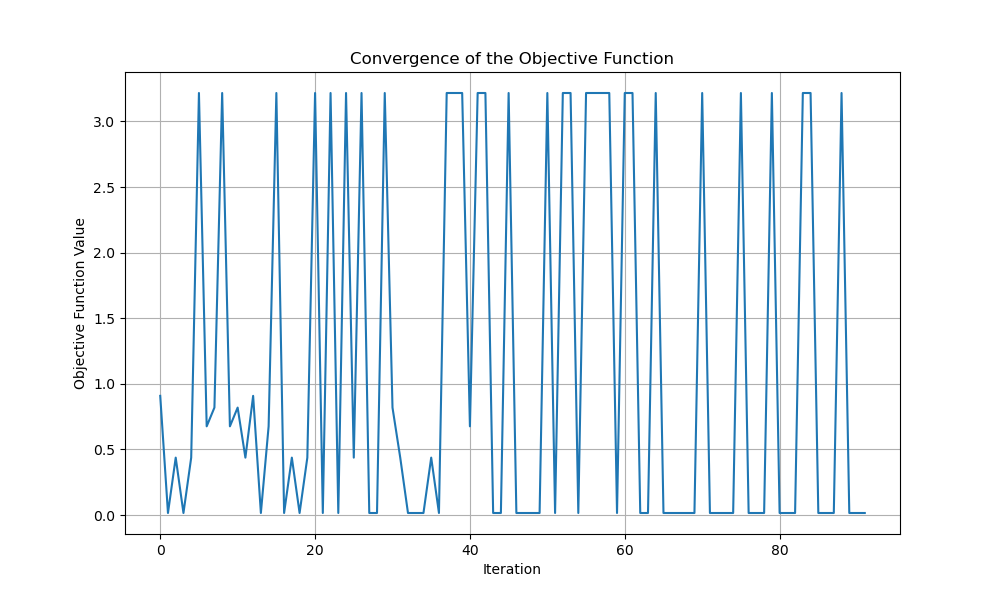

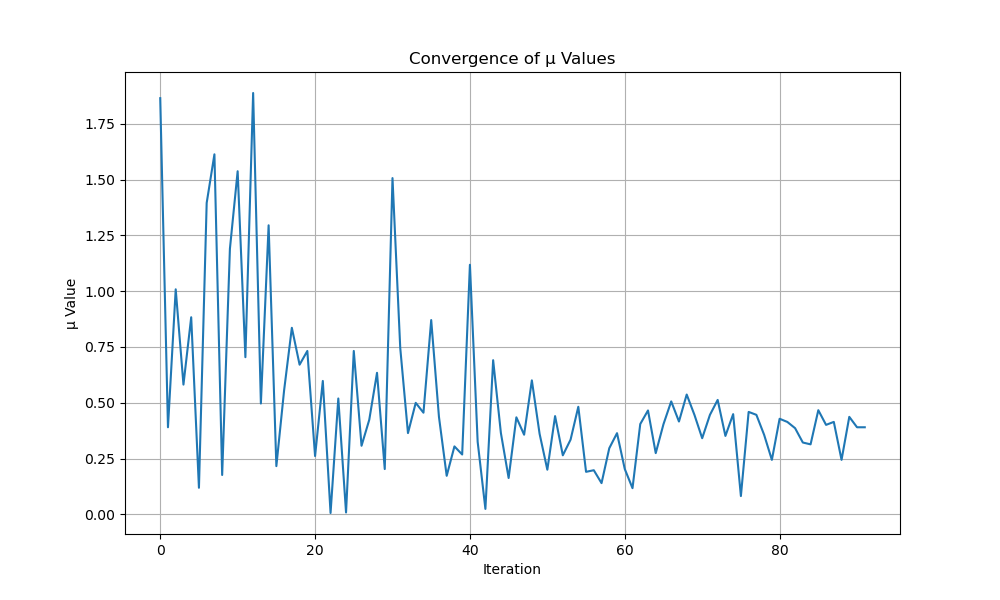

Sum of squared residuals for Decl = -63.99: 0.0067
Error 3-sigma Empirical/Fit: 0.0159
Error 4-sigma Empirical/Fit: -0.2420
At a declination of [-63.99]
For μ = 0.38996820565042967
χ²(df=0.94±0.03)


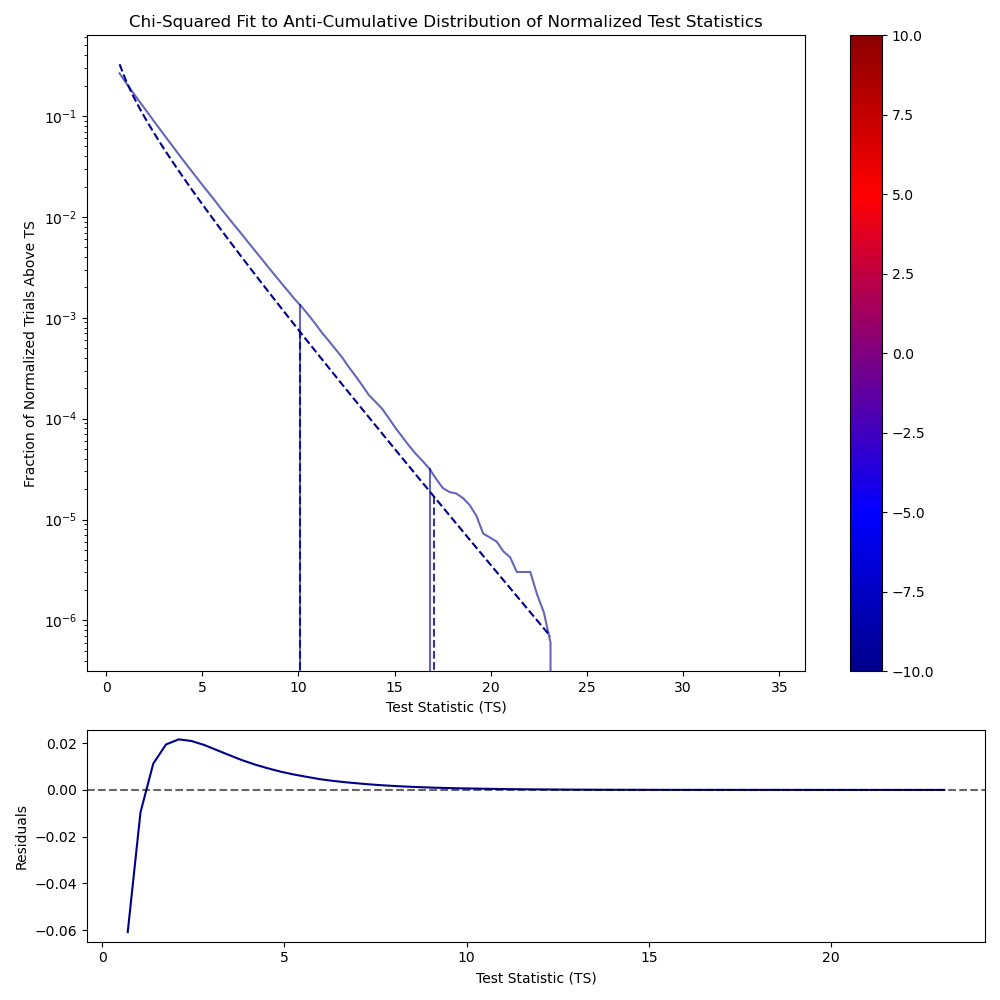

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit, differential_evolution
from scipy.stats import chi2

# Access the individual arrays (assuming these are provided in `data`)
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Specific declination values (in degrees)
declinations = [-63.99]

# Lists to store the objective function values and mu values during optimization
objective_values = []
mu_values = []

# Function to compute the distance between empirical and chi-squared critical values for a given mu
def compute_distance(mu, histogram_2d, x_edges, y_edges, declinations):
    distances = []
    mu = mu[0]  # Extract scalar value if mu is passed as an array
    
    # Store the current mu value
    mu_values.append(mu)
    
    for decl in declinations:
        idx = np.abs(x_edges - decl).argmin()
        total_counts = np.sum(histogram_2d[idx, :])
        
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            total_trials_norm = cumulative_sum_norm_hist[0]
            fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
            
            empirical_critical_value_3sigma = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])
            empirical_critical_value_4sigma = find_critical_ts(cumulative_sum_norm_hist, 0.00006334/2, y_edges[:-1])

            # Apply the mu filter to y_edges and fraction_above_ts_norm
            filtered_mask = y_edges[:-1] >= mu
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

            # If no data remains after filtering, skip this iteration
            if len(filtered_y_edges) == 0 or len(filtered_fraction_above_ts_norm) == 0:
                continue
            
            # Fit the chi-squared model to the valid data
            try:
                popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
                df = popt[0]
            except (RuntimeError, ValueError):
                continue  # Skip if fitting fails
            
            # Calculate the chi-squared 3-sigma and 4-sigma critical values
            critical_ts_chi2_3sigma = chi2.ppf(1 - 0.0027/2, df)
            critical_ts_chi2_4sigma = chi2.ppf(1 - 0.00006334/2, df)
            
            # Calculate the distance between the empirical and chi-squared 3-sigma and 4-sigma critical values
            distance_3sigma = abs(empirical_critical_value_3sigma - critical_ts_chi2_3sigma)
            distance_4sigma = abs(empirical_critical_value_4sigma - critical_ts_chi2_4sigma)
            distances.append(distance_3sigma)  # or use distance_4sigma if needed
    
    # Compute the sum of distances
    total_distance = np.sum(distances)
    
    # Store the objective function value
    objective_values.append(total_distance)
    
    return total_distance

# Initial guess for mu
initial_mu = 0.62

# Run the minimization using differential evolution
result = differential_evolution(compute_distance, bounds=[(0, 2)], args=(histogram_2d, x_edges, y_edges, declinations))

# Extract the optimized mu value
optimized_mu = result.x[0]
print(f'Optimized μ: {optimized_mu:.4f}')

# Plot the convergence of the objective function
plt.figure(figsize=(10, 6))
plt.plot(objective_values)
plt.title('Convergence of the Objective Function')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.grid(True)
plt.show()

# Plot the convergence of mu values
plt.figure(figsize=(10, 6))
plt.plot(mu_values)
plt.title('Convergence of μ Values')
plt.xlabel('Iteration')
plt.ylabel('μ Value')
plt.grid(True)
plt.show()

# Now use the optimized mu in the plotting code
mu = optimized_mu

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-10, vmax=10)

# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot the anti-cumulative distributions and fit the chi-squared model
for decl in declinations:
    color = cmap(norm(decl))
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value_3sigma = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])
        empirical_critical_value_4sigma = find_critical_ts(cumulative_sum_norm_hist, 0.00006334/2, y_edges[:-1])

        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]
        
        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df)
        
        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color=color, linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')
        
        # Calculate residuals and plot them
        residuals = y_data_valid - chi_squared_fit
        ax_res.plot(x_data_valid, residuals, color=color, linestyle='-', label=f'Residuals (Decl = {decl})')
        
        # Calculate and print the sum of squared residuals
        sum_squared_residuals = np.sum(residuals**2)
        print(f'Sum of squared residuals for Decl = {decl}: {sum_squared_residuals:.4f}')
        
        # Plot vertical lines at empirical critical values for 3-sigma and 4-sigma
        y_critical_3sigma = np.interp(empirical_critical_value_3sigma, x_data_valid, y_data_valid)
        y_critical_4sigma = np.interp(empirical_critical_value_4sigma, x_data_valid, y_data_valid)
        ax.plot([empirical_critical_value_3sigma, empirical_critical_value_3sigma], [0, y_critical_3sigma], color=color, linestyle='-', alpha=0.6, label='3-sigma Empirical')
        ax.plot([empirical_critical_value_4sigma, empirical_critical_value_4sigma], [0, y_critical_4sigma], color=color, linestyle='-', alpha=0.6, label='4-sigma Empirical')

        # Calculate the chi-squared 3-sigma and 4-sigma critical values
        critical_ts_chi2_3sigma = chi2.ppf(1 - 0.0027/2, df)
        critical_ts_chi2_4sigma = chi2.ppf(1 - 0.00006334/2, df)
        
        # Find the corresponding y values on the chi-squared fit curve
        y_critical_chi2_3sigma = chi_squared_model(critical_ts_chi2_3sigma, df)
        y_critical_chi2_4sigma = chi_squared_model(critical_ts_chi2_4sigma, df)
        
        # Plot the vertical lines for the chi-squared 3-sigma and 4-sigma critical values
        ax.plot([critical_ts_chi2_3sigma, critical_ts_chi2_3sigma], [0, y_critical_chi2_3sigma], color=color, linestyle='--', alpha=0.8, label='3-sigma Chi-squared')
        ax.plot([critical_ts_chi2_4sigma, critical_ts_chi2_4sigma], [0, y_critical_chi2_4sigma], color=color, linestyle='--', alpha=0.8, label='4-sigma Chi-squared')

        # Calculate and print the distance between the empirical and chi-squared 3-sigma and 4-sigma critical values
        distance_3sigma = empirical_critical_value_3sigma - critical_ts_chi2_3sigma
        distance_4sigma = empirical_critical_value_4sigma - critical_ts_chi2_4sigma
        print(f'Error 3-sigma Empirical/Fit: {distance_3sigma:.4f}')
        print(f'Error 4-sigma Empirical/Fit: {distance_4sigma:.4f}')

# Add the colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Squared Fit to Anti-Cumulative Distribution of Normalized Test Statistics')
ax.grid(False)
ax.set_yscale('log')

# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
ax_res.grid(False)

print('At a declination of', declinations)
print('For μ =', mu)
print(f'\u03C7²(df={df:.2f}±{df_err:.2f})')
plt.tight_layout()

# Display the plot
plt.show()


Optimized μ: 0.3766


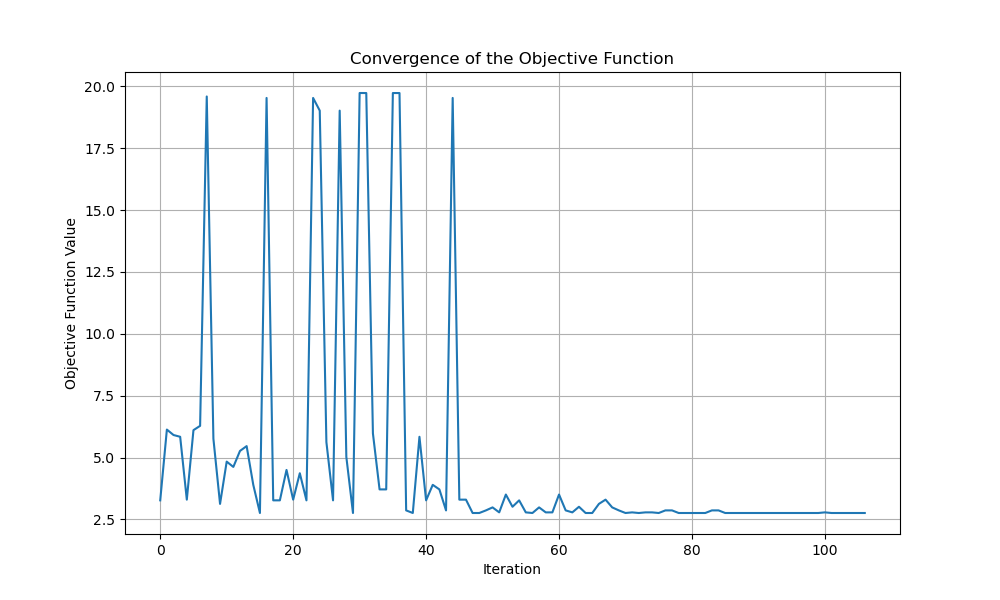

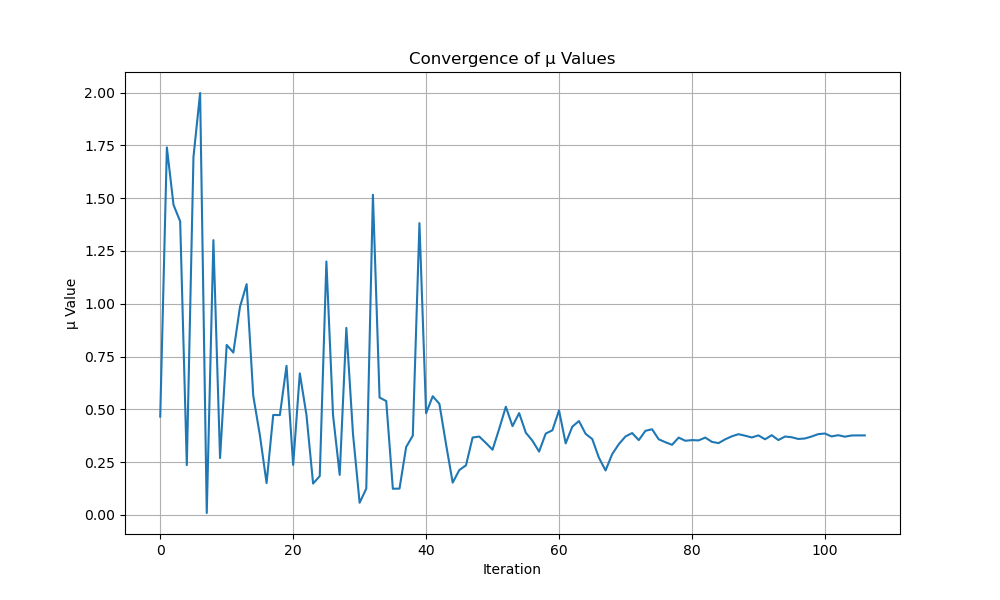

Sum of squared residuals for Decl = -30: 0.0793
Error 3-sigma Empirical/Fit: 0.0403
Error 4-sigma Empirical/Fit: 0.1480
Error 4.5-sigma Empirical/Fit: -2.5713
At a declination of [-30]
For μ = 0.37659494186588094
χ²(df=0.54±0.01)


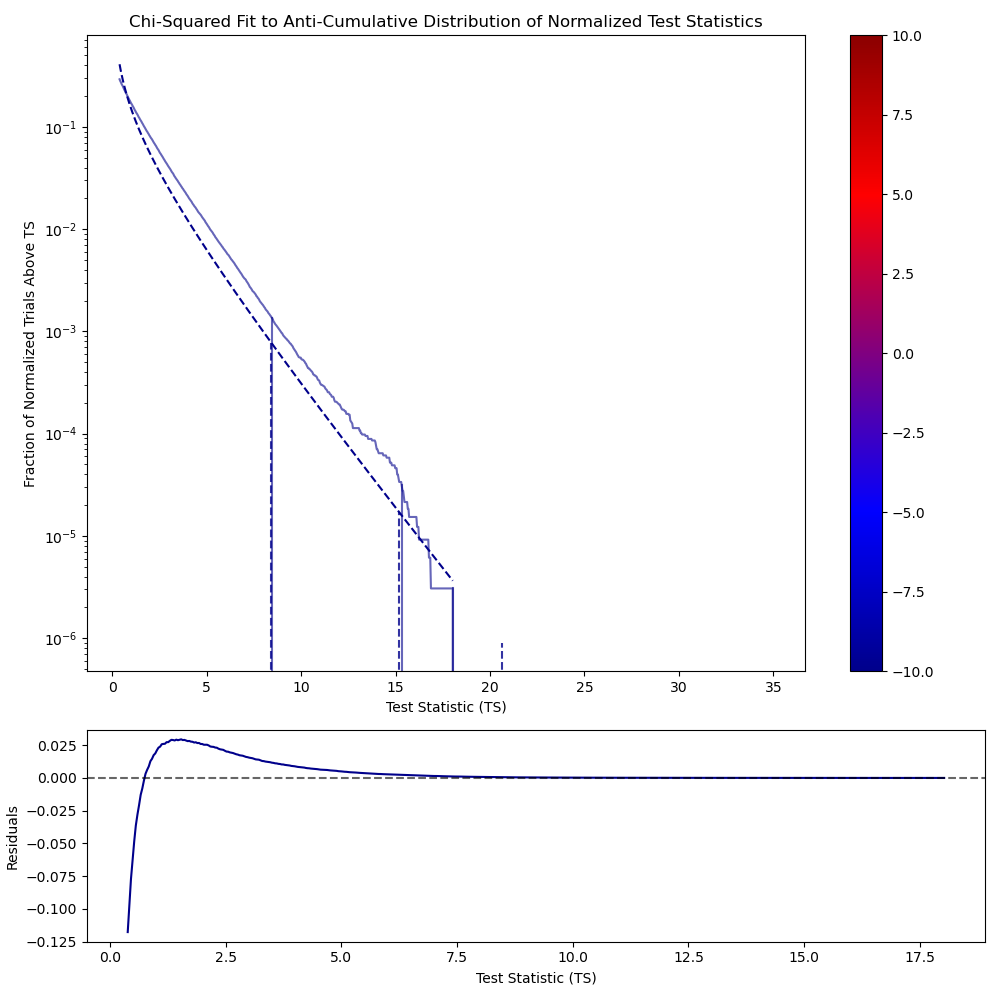

In [7]:
## Differential Method

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit, differential_evolution
from scipy.stats import chi2

# Access the individual arrays (assuming these are provided in `data`)
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Specific declination values (in degrees)
declinations = [-30]

# Lists to store the objective function values and mu values during optimization
objective_values = []
mu_values = []

# Function to compute the distance between empirical and chi-squared critical values for a given mu
def compute_distance(mu, histogram_2d, x_edges, y_edges, declinations):
    total_distance = 0
    mu = mu[0]  # Extract scalar value if mu is passed as an array
    
    # Store the current mu value
    mu_values.append(mu)
    
    for decl in declinations:
        idx = np.abs(x_edges - decl).argmin()
        total_counts = np.sum(histogram_2d[idx, :])
        
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            total_trials_norm = cumulative_sum_norm_hist[0]
            fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
            
            empirical_critical_value_3sigma = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])
            empirical_critical_value_4sigma = find_critical_ts(cumulative_sum_norm_hist, 0.00006334/2, y_edges[:-1])
            empirical_critical_value_4_5sigma = find_critical_ts(cumulative_sum_norm_hist, 0.000003397673124/2, y_edges[:-1])

            # Apply the mu filter to y_edges and fraction_above_ts_norm
            filtered_mask = y_edges[:-1] >= mu
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

            # If no data remains after filtering, skip this iteration
            if len(filtered_y_edges) == 0 or len(filtered_fraction_above_ts_norm) == 0:
                continue
            
            # Fit the chi-squared model to the valid data
            try:
                popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
                df = popt[0]
            except (RuntimeError, ValueError):
                continue  # Skip if fitting fails
            
            # Calculate the chi-squared critical values for 3-sigma, 4-sigma, and 4.5-sigma
            critical_ts_chi2_3sigma = chi2.ppf(1 - 0.0027/2, df)
            critical_ts_chi2_4sigma = chi2.ppf(1 - 0.00006334/2, df)
            critical_ts_chi2_4_5sigma = chi2.ppf(1 - 0.000003397673124/2, df)
            
            # Calculate the distances between the empirical and chi-squared critical values
            distance_3sigma = abs(empirical_critical_value_3sigma - critical_ts_chi2_3sigma)
            distance_4sigma = abs(empirical_critical_value_4sigma - critical_ts_chi2_4sigma)
            distance_4_5sigma = abs(empirical_critical_value_4_5sigma - critical_ts_chi2_4_5sigma)
            
            # Sum of distances (you could also use squared distances or weighted sums)
            total_distance += distance_3sigma + distance_4sigma + distance_4_5sigma
    
    # Store the objective function value
    objective_values.append(total_distance)
    
    return total_distance

# Initial guess for mu
initial_mu = 2.6

# Run the minimization using differential evolution
result = differential_evolution(compute_distance, bounds=[(0, 2)], args=(histogram_2d, x_edges, y_edges, declinations), maxiter=1000)

# Extract the optimized mu value
optimized_mu = result.x[0]
print(f'Optimized μ: {optimized_mu:.4f}')

# Plot the convergence of the objective function
plt.figure(figsize=(10, 6))
plt.plot(objective_values)
plt.title('Convergence of the Objective Function')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.grid(True)
plt.show()

# Plot the convergence of mu values
plt.figure(figsize=(10, 6))
plt.plot(mu_values)
plt.title('Convergence of μ Values')
plt.xlabel('Iteration')
plt.ylabel('μ Value')
plt.grid(True)
plt.show()

# Now use the optimized mu in the plotting code
mu = optimized_mu

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-10, vmax=10)

# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot the anti-cumulative distributions and fit the chi-squared model
for decl in declinations:
    color = cmap(norm(decl))
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value_3sigma = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])
        empirical_critical_value_4sigma = find_critical_ts(cumulative_sum_norm_hist, 0.00006334/2, y_edges[:-1])
        empirical_critical_value_4_5sigma = find_critical_ts(cumulative_sum_norm_hist, 0.000003397673124/2, y_edges[:-1])

        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]
        
        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df)
        
        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color=color, linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')
        
        # Calculate residuals and plot them
        residuals = y_data_valid - chi_squared_fit
        ax_res.plot(x_data_valid, residuals, color=color, linestyle='-', label=f'Residuals (Decl = {decl})')
        
        # Calculate and print the sum of squared residuals
        sum_squared_residuals = np.sum(residuals**2)
        print(f'Sum of squared residuals for Decl = {decl}: {sum_squared_residuals:.4f}')
        
        # Plot vertical lines at empirical critical values for 3-sigma, 4-sigma, and 4.5-sigma
        y_critical_3sigma = np.interp(empirical_critical_value_3sigma, x_data_valid, y_data_valid)
        y_critical_4sigma = np.interp(empirical_critical_value_4sigma, x_data_valid, y_data_valid)
        y_critical_4_5sigma = np.interp(empirical_critical_value_4_5sigma, x_data_valid, y_data_valid)
        ax.plot([empirical_critical_value_3sigma, empirical_critical_value_3sigma], [0, y_critical_3sigma], color=color, linestyle='-', alpha=0.6, label='3-sigma Empirical')
        ax.plot([empirical_critical_value_4sigma, empirical_critical_value_4sigma], [0, y_critical_4sigma], color=color, linestyle='-', alpha=0.6, label='4-sigma Empirical')
        ax.plot([empirical_critical_value_4_5sigma, empirical_critical_value_4_5sigma], [0, y_critical_4_5sigma], color=color, linestyle='-', alpha=0.6, label='4.5-sigma Empirical')

        # Calculate the chi-squared 3-sigma, 4-sigma, and 4.5-sigma critical values
        critical_ts_chi2_3sigma = chi2.ppf(1 - 0.0027/2, df)
        critical_ts_chi2_4sigma = chi2.ppf(1 - 0.00006334/2, df)
        critical_ts_chi2_4_5sigma = chi2.ppf(1 - 0.000003397673124/2, df)
        
        # Find the corresponding y values on the chi-squared fit curve
        y_critical_chi2_3sigma = chi_squared_model(critical_ts_chi2_3sigma, df)
        y_critical_chi2_4sigma = chi_squared_model(critical_ts_chi2_4sigma, df)
        y_critical_chi2_4_5sigma = chi_squared_model(critical_ts_chi2_4_5sigma, df)
        
        # Plot the vertical lines for the chi-squared 3-sigma, 4-sigma, and 4.5-sigma critical values
        ax.plot([critical_ts_chi2_3sigma, critical_ts_chi2_3sigma], [0, y_critical_chi2_3sigma], color=color, linestyle='--', alpha=0.8, label='3-sigma Chi-squared')
        ax.plot([critical_ts_chi2_4sigma, critical_ts_chi2_4sigma], [0, y_critical_chi2_4sigma], color=color, linestyle='--', alpha=0.8, label='4-sigma Chi-squared')
        ax.plot([critical_ts_chi2_4_5sigma, critical_ts_chi2_4_5sigma], [0, y_critical_chi2_4_5sigma], color=color, linestyle='--', alpha=0.8, label='4.5-sigma Chi-squared')

        # Calculate and print the distance between the empirical and chi-squared 3-sigma, 4-sigma, and 4.5-sigma critical values
        distance_3sigma = empirical_critical_value_3sigma - critical_ts_chi2_3sigma
        distance_4sigma = empirical_critical_value_4sigma - critical_ts_chi2_4sigma
        distance_4_5sigma = empirical_critical_value_4_5sigma - critical_ts_chi2_4_5sigma
        print(f'Error 3-sigma Empirical/Fit: {distance_3sigma:.4f}')
        print(f'Error 4-sigma Empirical/Fit: {distance_4sigma:.4f}')
        print(f'Error 4.5-sigma Empirical/Fit: {distance_4_5sigma:.4f}')

# Add the colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Squared Fit to Anti-Cumulative Distribution of Normalized Test Statistics')
ax.grid(False)
ax.set_yscale('log')

# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
ax_res.grid(False)

print('At a declination of', declinations)
print('For μ =', mu)
print(f'\u03C7²(df={df:.2f}±{df_err:.2f})')
plt.tight_layout()

# Display the plot
plt.show()


Optimal μ found: 2.0269
Objective value: 5.0092
Sum of squared residuals for Decl = -63.99: 0.0006
Error 3-sigma Empirical/Fit: -0.7975
Error 4-sigma Empirical/Fit: -1.1531
Error 4.5-sigma Empirical/Fit: -3.0585
At a declination of [-63.99]
For μ = 2.0268546977347657
χ²(df=1.31±0.00)


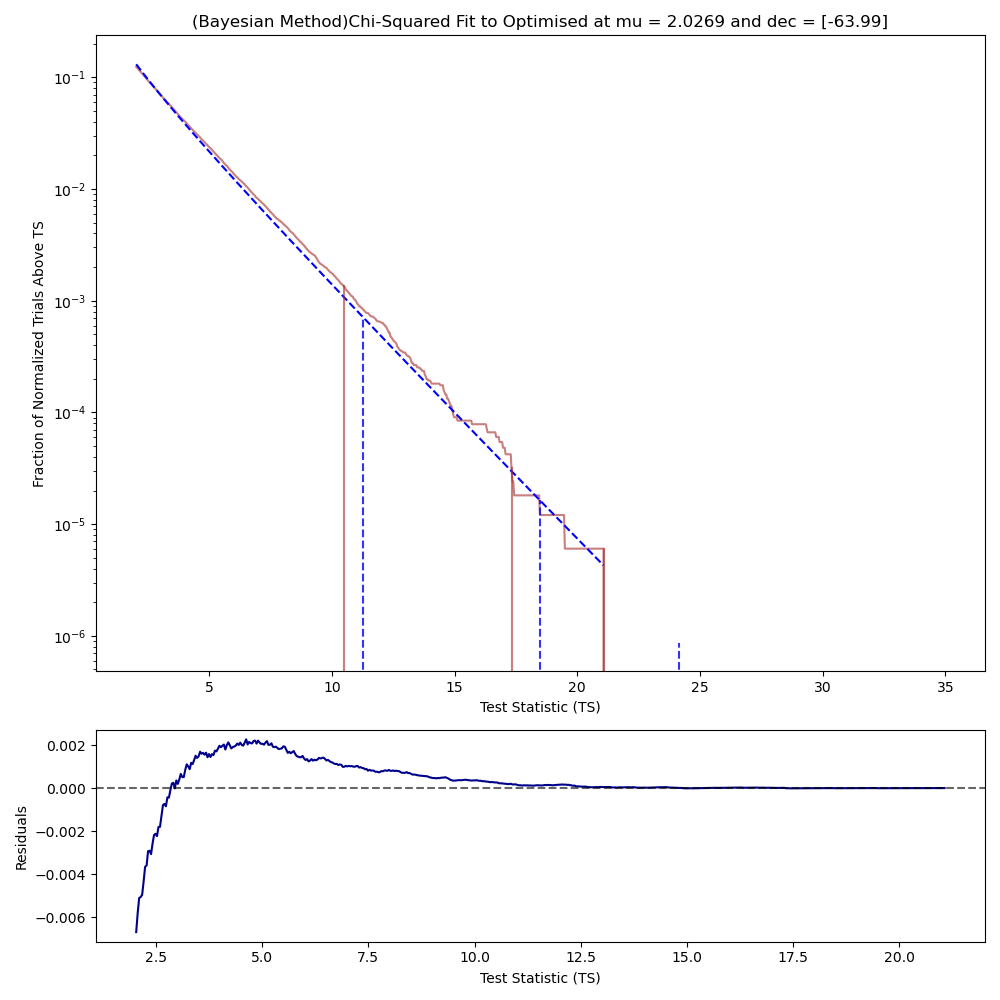

In [4]:
#~Working~##   Bayesian Aprroach   # Best method
#~~~~~~~~~##=======================#


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args

# Access the individual arrays (assuming these are provided in `data`)
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)
# Define the search space for μ
search_space = [Real(2, 4.0, name='mu')]

# Define the objective function to minimize
@use_named_args(search_space)
def objective(mu):
    total_distance = 0
    
    for decl in declinations:
        idx = np.abs(x_edges - decl).argmin()
        total_counts = np.sum(histogram_2d[idx, :])
        
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            total_trials_norm = cumulative_sum_norm_hist[0]
            fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
            
            empirical_critical_value_3sigma = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])
            empirical_critical_value_4sigma = find_critical_ts(cumulative_sum_norm_hist, 0.00006334/2, y_edges[:-1])
            empirical_critical_value_4_5sigma = find_critical_ts(cumulative_sum_norm_hist, 0.000003397673124/2, y_edges[:-1])

            # Apply the mu filter to y_edges and fraction_above_ts_norm
            filtered_mask = y_edges[:-1] >= mu
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

            # If no data remains after filtering, skip this iteration
            if len(filtered_y_edges) == 0 or len(filtered_fraction_above_ts_norm) == 0:
                continue
            
            # Fit the chi-squared model to the valid data
            try:
                popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
                df = popt[0]
            except (RuntimeError, ValueError):
                continue  # Skip if fitting fails
            
            # Calculate the chi-squared critical values for 3-sigma, 4-sigma, and 4.5-sigma
            critical_ts_chi2_3sigma = chi2.ppf(1 - 0.0027/2, df)
            critical_ts_chi2_4sigma = chi2.ppf(1 - 0.00006334/2, df)
            critical_ts_chi2_4_5sigma = chi2.ppf(1 - 0.000003397673124/2, df)
            
            # Calculate the distances between the empirical and chi-squared critical values
            distance_3sigma = abs(empirical_critical_value_3sigma - critical_ts_chi2_3sigma)
            distance_4sigma = abs(empirical_critical_value_4sigma - critical_ts_chi2_4sigma)
            distance_4_5sigma = abs(empirical_critical_value_4_5sigma - critical_ts_chi2_4_5sigma)
            
            # Sum of distances (you could also use squared distances or weighted sums)
            total_distance += distance_3sigma + distance_4sigma + distance_4_5sigma
    
    return total_distance

# Run Bayesian Optimization
from skopt import forest_minimize

res = forest_minimize(
    objective, 
    search_space, 
    n_calls=50, 
    random_state=42
)
# Output the results
print(f"Optimal μ found: {res.x[0]:.4f}")
print(f"Objective value: {res.fun:.4f}")

# Use the optimized μ in your analysis
optimal_mu = res.x[0]

# Now use the optimal μ value to plot the results as before



# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot the anti-cumulative distributions and fit the chi-squared model
for decl in declinations: 
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value_3sigma = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])
        empirical_critical_value_4sigma = find_critical_ts(cumulative_sum_norm_hist, 0.00006334/2, y_edges[:-1])
        empirical_critical_value_4_5sigma = find_critical_ts(cumulative_sum_norm_hist, 0.000003397673124/2, y_edges[:-1])

        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= optimal_mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color='brown', label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]
        
        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df)
        
        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color='blue', linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')
        
        # Calculate residuals and plot them
        residuals = y_data_valid - chi_squared_fit
        ax_res.plot(x_data_valid, residuals, color=color, linestyle='-', label=f'Residuals (Decl = {decl})')
        
        # Calculate and print the sum of squared residuals
        sum_squared_residuals = np.sum(residuals**2)
        print(f'Sum of squared residuals for Decl = {decl}: {sum_squared_residuals:.4f}')
        
        # Plot vertical lines at empirical critical values for 3-sigma, 4-sigma, and 4.5-sigma
        y_critical_3sigma = np.interp(empirical_critical_value_3sigma, x_data_valid, y_data_valid)
        y_critical_4sigma = np.interp(empirical_critical_value_4sigma, x_data_valid, y_data_valid)
        y_critical_4_5sigma = np.interp(empirical_critical_value_4_5sigma, x_data_valid, y_data_valid)
        ax.plot([empirical_critical_value_3sigma, empirical_critical_value_3sigma], [0, y_critical_3sigma], color='brown', linestyle='-', alpha=0.6, label='3-sigma Empirical')
        ax.plot([empirical_critical_value_4sigma, empirical_critical_value_4sigma], [0, y_critical_4sigma], color='brown', linestyle='-', alpha=0.6, label='4-sigma Empirical')
        ax.plot([empirical_critical_value_4_5sigma, empirical_critical_value_4_5sigma], [0, y_critical_4_5sigma], color='brown', linestyle='-', alpha=0.6, label='4.5-sigma Empirical')

        # Calculate the chi-squared 3-sigma, 4-sigma, and 4.5-sigma critical values
        critical_ts_chi2_3sigma = chi2.ppf(1 - 0.0027/2, df)
        critical_ts_chi2_4sigma = chi2.ppf(1 - 0.00006334/2, df)
        critical_ts_chi2_4_5sigma = chi2.ppf(1 - 0.000003397673124/2, df)
        
        # Find the corresponding y values on the chi-squared fit curve
        y_critical_chi2_3sigma = chi_squared_model(critical_ts_chi2_3sigma, df)
        y_critical_chi2_4sigma = chi_squared_model(critical_ts_chi2_4sigma, df)
        y_critical_chi2_4_5sigma = chi_squared_model(critical_ts_chi2_4_5sigma, df)
        
        # Plot the vertical lines for the chi-squared 3-sigma, 4-sigma, and 4.5-sigma critical values
        ax.plot([critical_ts_chi2_3sigma, critical_ts_chi2_3sigma], [0, y_critical_chi2_3sigma], color='blue', linestyle='--', alpha=0.8, label='3-sigma Chi-squared')
        ax.plot([critical_ts_chi2_4sigma, critical_ts_chi2_4sigma], [0, y_critical_chi2_4sigma], color='blue', linestyle='--', alpha=0.8, label='4-sigma Chi-squared')
        ax.plot([critical_ts_chi2_4_5sigma, critical_ts_chi2_4_5sigma], [0, y_critical_chi2_4_5sigma], color='blue', linestyle='--', alpha=0.8, label='4.5-sigma Chi-squared')

        # Calculate and print the distance between the empirical and chi-squared 3-sigma, 4-sigma, and 4.5-sigma critical values
        distance_3sigma = empirical_critical_value_3sigma - critical_ts_chi2_3sigma
        distance_4sigma = empirical_critical_value_4sigma - critical_ts_chi2_4sigma
        distance_4_5sigma = empirical_critical_value_4_5sigma - critical_ts_chi2_4_5sigma
        print(f'Error 3-sigma Empirical/Fit: {distance_3sigma:.4f}')
        print(f'Error 4-sigma Empirical/Fit: {distance_4sigma:.4f}')
        print(f'Error 4.5-sigma Empirical/Fit: {distance_4_5sigma:.4f}')

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title(f'(Bayesian Method)Chi-Squared Fit to Optimised at mu = {optimal_mu:.4f} and dec = {declinations}')
ax.grid(False)
ax.set_yscale('log')

# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
ax_res.grid(False)

print('At a declination of', declinations)
print('For μ =', optimal_mu)
print(f'\u03C7²(df={df:.2f}±{df_err:.2f})')
plt.tight_layout()

# Display the plot
plt.show()

In [50]:
#~Testing~##   Bayesian all sin(dec)  # Most consistant
#~~~~~~~~~##==========================#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2
from skopt import gp_minimize
from skopt.space import Real
import time
import cProfile
import pstats
from pstats import SortKey
from skopt import forest_minimize
# Arrays to store distances and sigma values
distance_3sigma_values = []
distance_4sigma_values = []
distance_4_5sigma_values = []
empirical_3sigma_values = []
theoretical_3sigma_values = []
empirical_4sigma_values = []
theoretical_4sigma_values = []
empirical_4_5sigma_values = []
theoretical_4_5sigma_values = []

# Arrays to store results
optimized_mu_values = []
sin_x_midpoints = []

# Function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Create the objective function as a closure to capture additional arguments
def create_objective(histogram_2d, x_edges, y_edges, decl):
    def objective(mu):
        total_distance = 0
        idx = np.abs(x_edges - decl).argmin()
        total_counts = np.sum(histogram_2d[idx, :])
        
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            total_trials_norm = cumulative_sum_norm_hist[0]
            fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
            empirical_critical_value_3sigma = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])
            empirical_critical_value_4sigma = find_critical_ts(cumulative_sum_norm_hist, 0.00006334/2, y_edges[:-1])
            empirical_critical_value_4_5sigma = find_critical_ts(cumulative_sum_norm_hist, 0.000003397673124/2, y_edges[:-1])

            # Apply the mu filter to y_edges and fraction_above_ts_norm
            filtered_mask = y_edges[:-1] >= mu
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

            # If no data remains after filtering, skip this iteration
            if len(filtered_y_edges) == 0 or len(filtered_fraction_above_ts_norm) == 0:
                return np.inf
        
            # Fit the chi-squared model to the valid data
            try:
                popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
                df = popt[0]
            except (RuntimeError, ValueError):
                return np.inf  # Skip if fitting fails
        
            # Calculate the chi-squared critical values for 3-sigma, 4-sigma, and 4.5-sigma
            critical_ts_chi2_3sigma = chi2.ppf(1 - 0.0027/2, df)
            critical_ts_chi2_4sigma = chi2.ppf(1 - 0.00006334/2, df)
            critical_ts_chi2_4_5sigma = chi2.ppf(1 - 0.000003397673124/2, df)
        
            # Calculate the distances between the empirical and chi-squared critical values
            distance_3sigma = abs(empirical_critical_value_3sigma - critical_ts_chi2_3sigma)
            distance_4sigma = abs(empirical_critical_value_4sigma - critical_ts_chi2_4sigma)
            distance_4_5sigma = abs(empirical_critical_value_4_5sigma - critical_ts_chi2_4_5sigma)
        
            # Sum of distances
            total_distance += distance_3sigma + distance_4sigma + distance_4_5sigma
            
            # Store the distances
            distance_3sigma_values.append(distance_3sigma)
            distance_4sigma_values.append(distance_4sigma)
            distance_4_5sigma_values.append(distance_4_5sigma)
        
            # Store the empirical and theoretical sigma values
            empirical_3sigma_values.append(empirical_critical_value_3sigma)
            theoretical_3sigma_values.append(critical_ts_chi2_3sigma)
        
            empirical_4sigma_values.append(empirical_critical_value_4sigma)
            theoretical_4sigma_values.append(critical_ts_chi2_4sigma)
        
            empirical_4_5sigma_values.append(empirical_critical_value_4_5sigma)
            theoretical_4_5sigma_values.append(critical_ts_chi2_4_5sigma)

        return total_distance
    
    return objective

def main():
    # Access the individual arrays
    histogram_2d = data['histogram_2d']
    x_edges = data['x_edges']
    y_edges = data['y_edges']
    total_time = 0 
    # Calculate the number of bins
    num_x_bins = len(x_edges) - 1
    num_y_bins = len(y_edges) - 1

    # Print the number of bins
    print("Number of bins along the x-axis:", num_x_bins)
    print("Number of bins along the y-axis:", num_y_bins)

    # Convert declination edges to sine of declination
    sin_x_edges = np.sin(np.radians(x_edges))

    # Iterate over all declinations and optimize mu using Bayesian optimization
    for idx in range(len(x_edges) - 1):
        start_time = time.time()
        
        decl = (x_edges[idx] + x_edges[idx + 1]) / 2
        sin_decl = np.sin(np.radians(decl))
        
        print(f"\rProcessing declination bin {idx + 1}/{num_x_bins} (Declination: {decl:.2f}°)", end='')
        
        # Create the objective function with additional arguments
        objective_func = create_objective(histogram_2d, x_edges, y_edges, decl)

        # Run Bayesian Optimization
        res = forest_minimize(objective_func,
                          dimensions=[Real(0.1, 2.0, name='mu')],
                          n_calls=50, random_state=42)
        
        # Store the results
        optimized_mu_values.append(res.x[0])
        sin_x_midpoints.append(sin_decl)
        
        end_time = time.time()
        elapsed_time = end_time - start_time
        total_time += elapsed_time  # Update total time
        
        print(f"\rProcessing declination bin {idx + 1}/{num_x_bins} (Declination: {decl:.2f}°) - Optimized μ: {res.x[0]:.4f} - Time taken: {elapsed_time:.2f} seconds - Total time: {total_time:.2f} seconds", end='')

    print()
    
    # Plot mu vs sin(declination)
    plt.figure(figsize=(11, 6))
    plt.plot(sin_x_midpoints, optimized_mu_values, color='blue', label='Optimized μ', linewidth=1.5, alpha=0.7)

    # Mark the -5° and -10° declinations as in the example
    plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=.5, label='-5° Horizon')
    plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=.5, label='-10°')
    plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=.5, label='+10°')

    plt.xlabel('sin(Declination)')
    plt.ylabel('Optimized μ Value')
    plt.title('Optimized μ Value vs sin(Declination)')
    plt.grid(False)
    plt.legend()
    plt.tight_layout()

    # Save and show the plot
    plt.savefig('optimized_mu_vs_sin_declination_bayesian.png')
    plt.show()

    # Create a DataFrame and save to a CSV file
    results_df = pd.DataFrame({
        'sin_declination': sin_x_midpoints,
        'optimized_mu': optimized_mu_values,
        'distance_3sigma': distance_3sigma_values,
        'distance_4sigma': distance_4sigma_values,
        'distance_4_5sigma': distance_4_5sigma_values,
        'empirical_3sigma': empirical_3sigma_values,
        'theoretical_3sigma': theoretical_3sigma_values,
        'empirical_4sigma': empirical_4sigma_values,
        'theoretical_4sigma': theoretical_4sigma_values,
        'empirical_4_5sigma': empirical_4_5sigma_values,
        'theoretical_4_5sigma': theoretical_4_5sigma_values
    })
    results_df.to_csv('sigma_distances_and_values_vs_sin_declination1000.csv', index=False)


if __name__ == "__main__":
    # Use a context manager to ensure the profiler is properly cleaned up
    with cProfile.Profile() as profiler:
        main()  # Run the main function which includes your code
    
    # Output the profiling results
    stats = pstats.Stats(profiler).sort_stats(SortKey.TIME)
    stats.print_stats(10)  # Print the top 10 time-consuming functions

    # Optionally, you can save the profile results to a file
    # stats.dump_stats("profile_results_bayesian.prof")






Number of bins along the x-axis: 100
Number of bins along the y-axis: 100
Processing declination bin 1/100 (Declination: -80.19°)

KeyboardInterrupt: 

The optimal value of mu is 1.8000
At a declination of [45, -5, -45]
For optimal μ = 1.8
χ²(df=0.90±0.00)


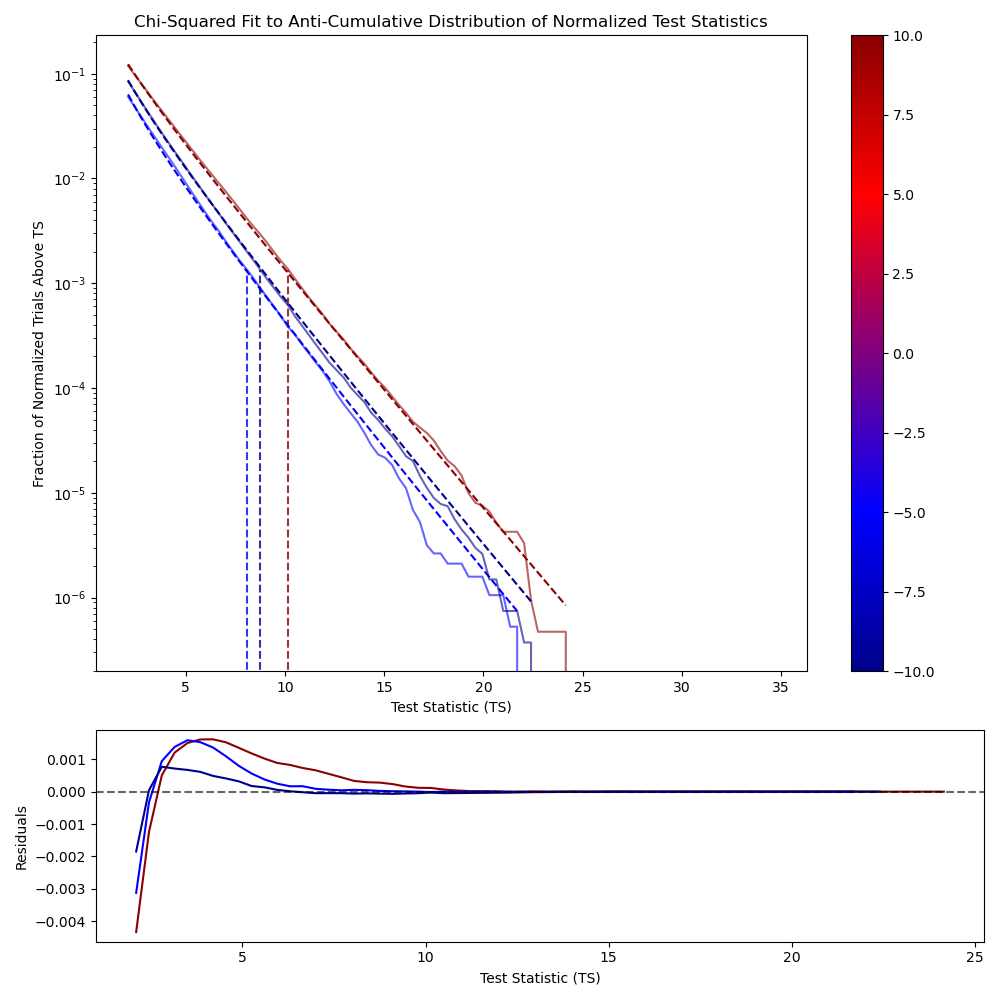

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit, minimize
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Define Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Define a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Define specific declination values (in degrees)
declinations = [45, -5, -45]

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-10, vmax=10)

# Function to calculate the goodness of fit
def goodness_of_fit(mu, histogram_2d, x_edges, y_edges, declinations):
    total_residuals_sum = 0
    
    for decl in declinations:
        idx = np.abs(x_edges - decl).argmin()
        total_counts = np.sum(histogram_2d[idx, :])
        
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            total_trials_norm = cumulative_sum_norm_hist[0]
            fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
            
            # Apply the mu filter to y_edges and fraction_above_ts_norm
            filtered_mask = y_edges[:-1] >= mu
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]
            
            # Fit the chi-squared model to the valid data
            if len(filtered_y_edges) > 0 and len(filtered_fraction_above_ts_norm) > 0:
                popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
                df = popt[0]
                
                # Calculate the chi-squared fit using the valid data
                chi_squared_fit = chi_squared_model(filtered_y_edges, df)
                
                # Calculate residuals and sum of squared residuals
                residuals = filtered_fraction_above_ts_norm - chi_squared_fit
                residuals_sum = np.sum(residuals**2)
                total_residuals_sum += residuals_sum
                
    return total_residuals_sum

# Initial value of mu (can be any reasonable guess)
initial_mu = 1.8

# Optimize mu using minimize
result = minimize(goodness_of_fit, x0=initial_mu, args=(histogram_2d, x_edges, y_edges, declinations), bounds=[(0, None)])

# Extract the optimized value of mu
optimal_mu = result.x[0]

# Print the optimal value of mu
print(f'The optimal value of mu is {optimal_mu:.4f}')

# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot the anti-cumulative distributions and fit the chi-squared model
for decl in declinations:
    color = cmap(norm(decl))
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Apply the optimal mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= optimal_mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]
        
        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df)
        
        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color=color, linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')
        
        # Calculate residuals and plot them
        residuals = y_data_valid - chi_squared_fit
        ax_res.plot(x_data_valid, residuals, color=color, linestyle='-', label=f'Residuals (Decl = {decl})')
        
        # Optional: Plot vertical line at empirical critical value
        y_critical = np.interp(empirical_critical_value, x_data_valid, y_data_valid)
        ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color=color, linestyle='--', alpha=0.8)

# Add the colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Squared Fit to Anti-Cumulative Distribution of Normalized Test Statistics')
ax.grid(False)
ax.set_yscale('log')

# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
ax_res.grid(False)

print('At a declination of', declinations)
print('For optimal μ =', optimal_mu)
print(f'\u03C7²(df={df:.2f}±{df_err:.2f})')
plt.tight_layout()

# Display the plot
plt.show()

NameError: name 'mu_range' is not defined

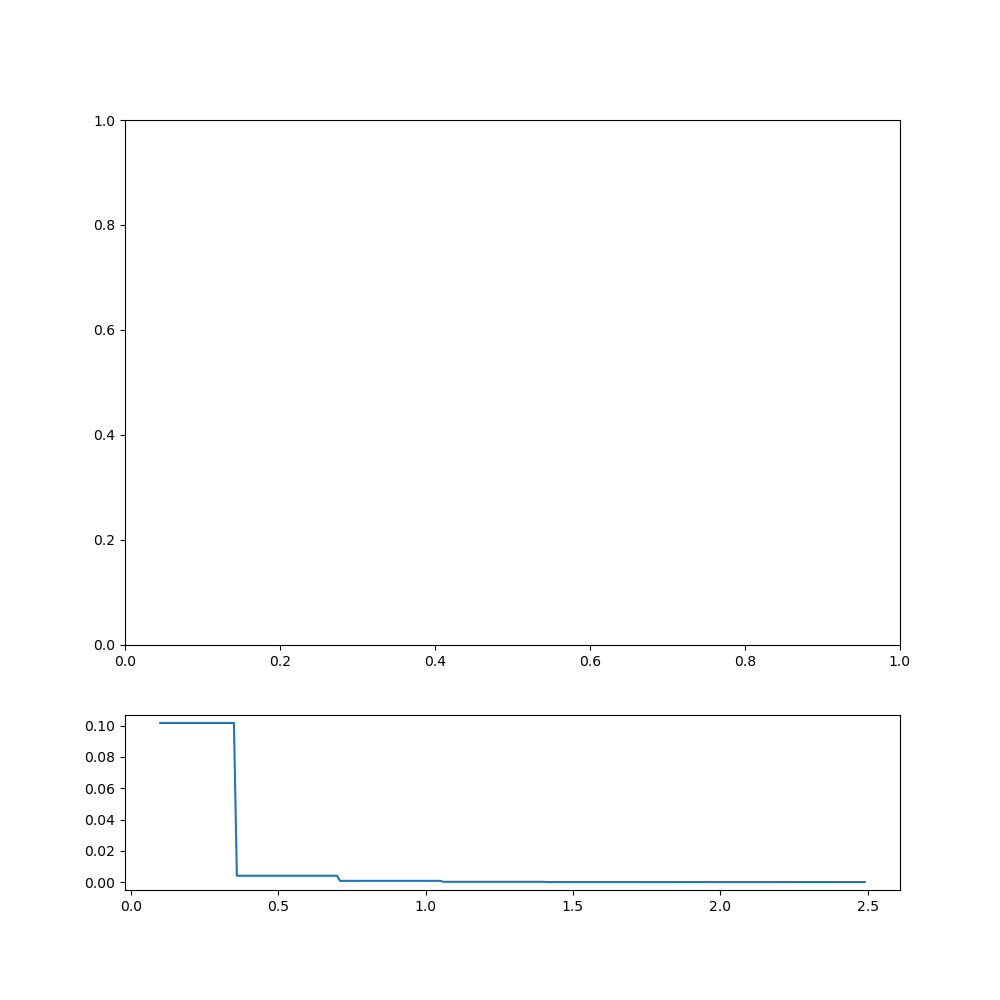

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Function to compute the residuals for a given mu value for a specific declination
def compute_residuals_for_decl(mu, histogram_2d, x_edges, y_edges, decl):
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm
        
        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = filtered_fraction_above_ts_norm > 0
        x_data_valid = filtered_y_edges[valid_data_mask]
        y_data_valid = filtered_fraction_above_ts_norm[valid_data_mask]
        
        if len(x_data_valid) > 0 and len(y_data_valid) > 0:
            # Fit the chi-squared model to the valid data
            popt, _ = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
            df = popt[0]
            
            # Calculate the chi-squared fit using the valid data
            chi_squared_fit = chi_squared_model(x_data_valid, df)
            
            # Calculate residuals
            residuals = y_data_valid - chi_squared_fit
            
            # Sum of squared residuals
            return np.sum(residuals**2)
    
    return float('inf')

# Define a function to perform a grid search over mu values for a specific declination
def find_optimal_mu_for_decl(histogram_2d, x_edges, y_edges, decl, mu_range, mu_step):
    best_mu = None
    best_residual_sum = float('inf')
    
    for mu in np.arange(mu_range[0], mu_range[1], mu_step):
        residual_sum = compute_residuals_for_decl(mu, histogram_2d, x_edges, y_edges, decl)
        
        if residual_sum < best_residual_sum:
            best_residual_sum = residual_sum
            best_mu = mu
    
    return best_mu, best_residual_sum

# Define Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Define specific declination values (in degrees)
declinations = [-45, -5, 45]  # Add more declinations as needed

# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-10, vmax=10)

# Iterate over each declination and find the optimal mu
for decl in declinations:
    mu_values = np.arange(0.1, 2.5, 0.01)
    residuals_list = []
    for mu in mu_values:
        residual_sum = compute_residuals_for_decl(mu, histogram_2d, x_edges, y_edges, decl)
        residuals_list.append(residual_sum)
    
    plt.plot(mu_values, residuals_list, label=f'Declination {decl}')
    optimal_mu, residual_sum = find_optimal_mu_for_decl(histogram_2d, x_edges, y_edges, decl, mu_range, mu_step)

    print(f'Optimal mu for declination {decl}: {optimal_mu}')
    print(f'Minimized sum of squared residuals for declination {decl}: {residual_sum}')
    
    # Now use the optimal mu in the main plotting and fitting code
    mu = optimal_mu
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros) -- this step is now redundant since we've already filtered
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]
        
        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df)
        
        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color=color, linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')
        
        # Calculate residuals and plot them
        residuals = y_data_valid - chi_squared_fit
        ax_res.plot(x_data_valid, residuals, color=color, linestyle='-', label=f'Residuals (Decl = {decl})')
        
        # Optional: Plot vertical line at empirical critical value
        y_critical = np.interp(empirical_critical_value, x_data_valid, y_data_valid)
        ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color=color, linestyle='--', alpha=0.8)

plt.xlabel('mu')
plt.ylabel('Sum of Squared Residuals')
plt.title('Residuals vs. mu for Different Declinations')
plt.legend()
plt.show()
# Add the colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Squared Fit to Anti-Cumulative Distribution of Normalized Test Statistics')
ax.grid(False)
ax.set_yscale('log')
# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
ax_res.grid(False)

plt.tight_layout()

# Display the plot
plt.show()

The optimal value of mu for declination 45 is 1.8000


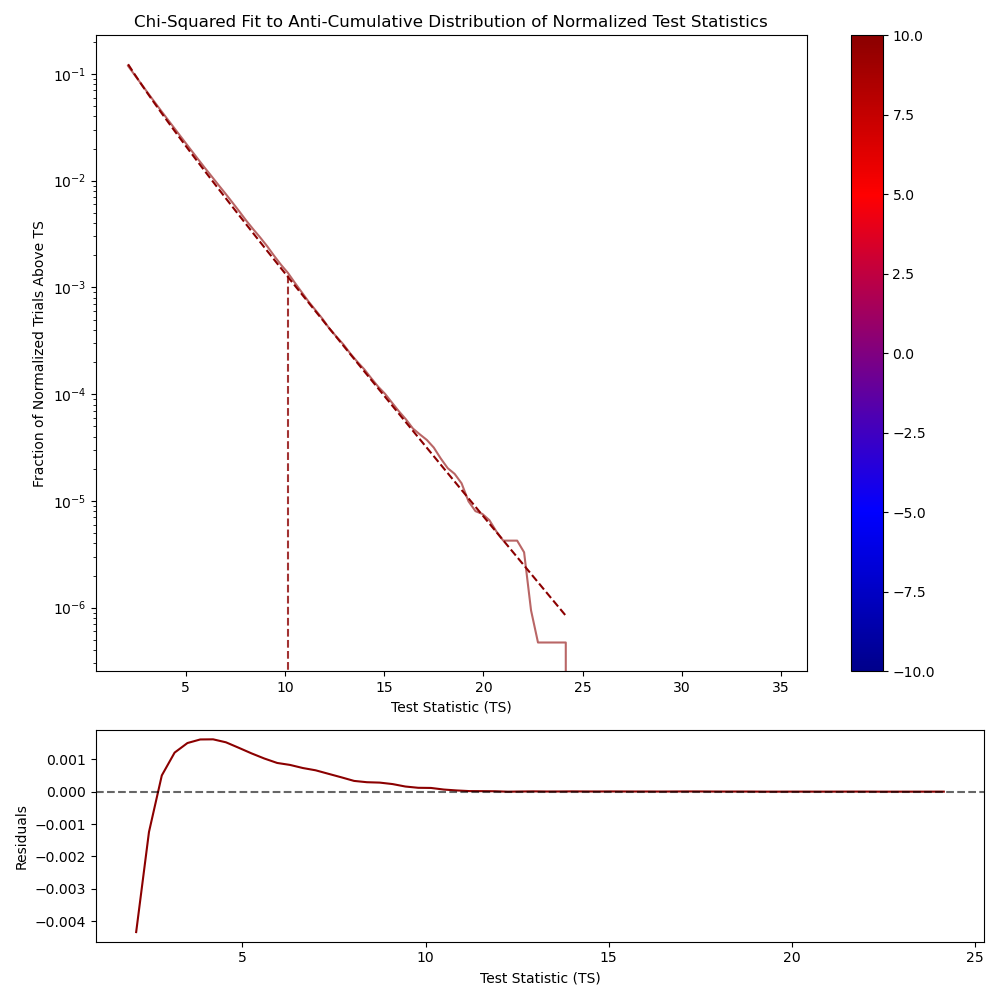

At declination 45, optimal μ = 1.8000
χ²(df=1.29±0.00)


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit, minimize
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Define Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Define a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Define specific declination values (in degrees)
declinations = [45]

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-10, vmax=10)

# Function to calculate the goodness of fit
def goodness_of_fit(mu_list, histogram_2d, x_edges, y_edges, declinations):
    total_residuals_sum = 0
    
    for mu, decl in zip(mu_list, declinations):
        idx = np.abs(x_edges - decl).argmin()
        total_counts = np.sum(histogram_2d[idx, :])
        
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            total_trials_norm = cumulative_sum_norm_hist[0]
            fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
            
            # Apply the mu filter to y_edges and fraction_above_ts_norm
            filtered_mask = y_edges[:-1] >= mu
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]
            
            # Fit the chi-squared model to the valid data
            if len(filtered_y_edges) > 0 and len(filtered_fraction_above_ts_norm) > 0:
                popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
                df = popt[0]
                
                # Calculate the chi-squared fit using the valid data
                chi_squared_fit = chi_squared_model(filtered_y_edges, df)
                
                # Calculate residuals and sum of squared residuals
                residuals = filtered_fraction_above_ts_norm - chi_squared_fit
                residuals_sum = np.sum(residuals**2)
                total_residuals_sum += residuals_sum
                
    return total_residuals_sum

# Initial values of mu (one for each declination)
initial_mu_list = [1.8] * len(declinations)

# Optimize mu using minimize for each declination
result = minimize(goodness_of_fit, x0=initial_mu_list, args=(histogram_2d, x_edges, y_edges, declinations), bounds=[(0, None)] * len(declinations))

# Extract the optimized values of mu
optimal_mu_list = result.x

# Print the optimal values of mu
for decl, mu in zip(declinations, optimal_mu_list):
    print(f'The optimal value of mu for declination {decl} is {mu:.4f}')

# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot the anti-cumulative distributions and fit the chi-squared model
for decl, mu in zip(declinations, optimal_mu_list):
    color = cmap(norm(decl))
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Apply the optimal mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]
        
        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df)
        
        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color=color, linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')
        
        # Calculate residuals and plot them
        residuals = y_data_valid - chi_squared_fit
        ax_res.plot(x_data_valid, residuals, color=color, linestyle='-', label=f'Residuals (Decl = {decl})')
        
        # Optional: Plot vertical line at empirical critical value
        y_critical = np.interp(empirical_critical_value, x_data_valid, y_data_valid)
        ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color=color, linestyle='--', alpha=0.8)

# Add the colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Squared Fit to Anti-Cumulative Distribution of Normalized Test Statistics')
ax.grid(False)
ax.set_yscale('log')

# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
ax_res.grid(False)

# Display the plot with tight layout
plt.tight_layout()
plt.show()

# Print the final summary of results
for decl, mu in zip(declinations, optimal_mu_list):
    print(f'At declination {decl}, optimal μ = {mu:.4f}')
    print(f'\u03C7²(df={df:.2f}±{df_err:.2f})')


The optimal value of mu for declination -45 is 1.8000
Error 3-sigma Empirical/Fit: -1.1557
Error 4-sigma Empirical/Fit: -1.3454
Error 4.5-sigma Empirical/Fit: -2.2289


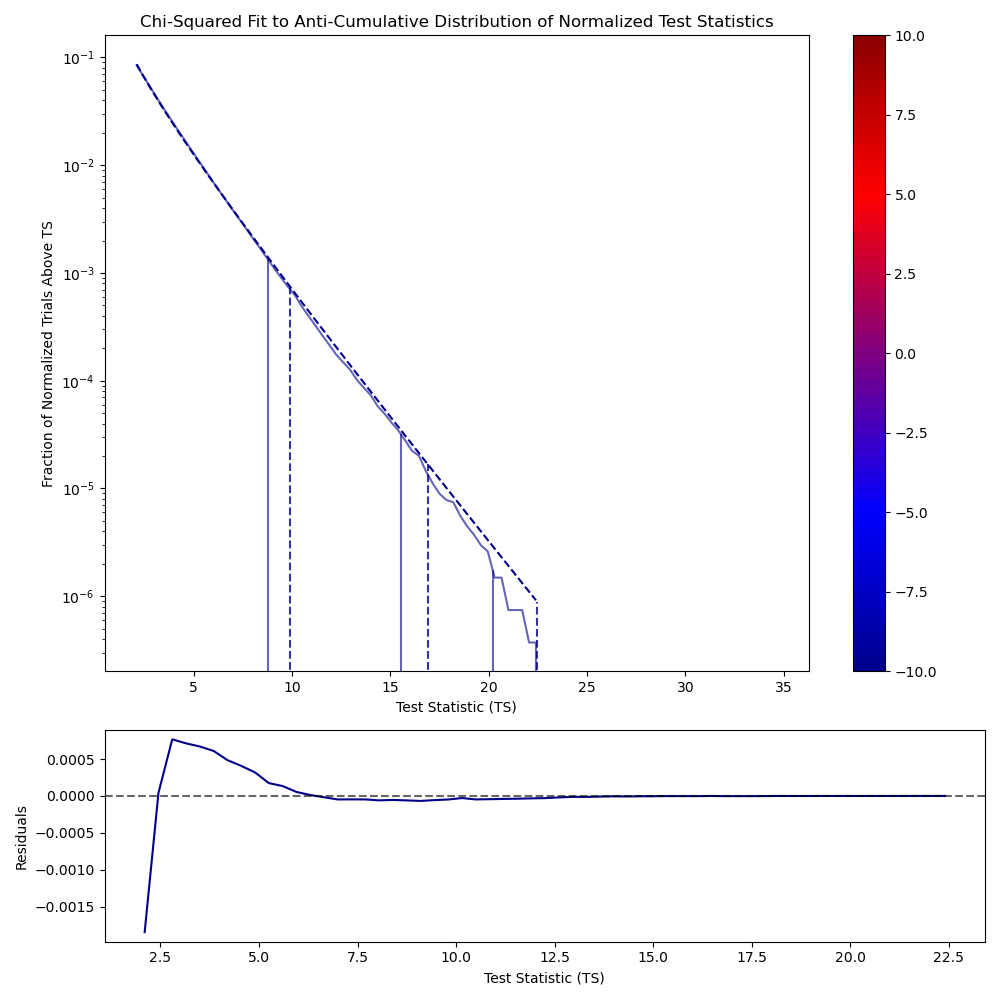

At declination -45, optimal μ = 1.8000
χ²(df=0.90±0.00)


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit, minimize
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Define Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Define a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Define specific declination values (in degrees)
declinations = [-45]

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-10, vmax=10)

# Function to calculate the goodness of fit
def goodness_of_fit(mu_list, histogram_2d, x_edges, y_edges, declinations):
    total_residuals_sum = 0
    
    for mu, decl in zip(mu_list, declinations):
        idx = np.abs(x_edges - decl).argmin()
        total_counts = np.sum(histogram_2d[idx, :])
        
        if total_counts > 0:
            normalized_histogram = histogram_2d[idx, :] / total_counts
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            total_trials_norm = cumulative_sum_norm_hist[0]
            fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
            
            # Apply the mu filter to y_edges and fraction_above_ts_norm
            filtered_mask = y_edges[:-1] >= mu
            filtered_y_edges = y_edges[:-1][filtered_mask]
            filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]
            
            # Fit the chi-squared model to the valid data
            if len(filtered_y_edges) > 0 and len(filtered_fraction_above_ts_norm) > 0:
                popt, _ = curve_fit(chi_squared_model, filtered_y_edges, filtered_fraction_above_ts_norm, p0=[2.0], maxfev=10000)
                df = popt[0]
                
                # Calculate the chi-squared fit using the valid data
                chi_squared_fit = chi_squared_model(filtered_y_edges, df)
                
                # Calculate residuals and sum of squared residuals
                residuals = filtered_fraction_above_ts_norm - chi_squared_fit
                residuals_sum = np.sum(residuals**2)
                total_residuals_sum += residuals_sum
                
    return total_residuals_sum

# Initial values of mu (one for each declination)
initial_mu_list = [1.8] * len(declinations)

# Optimize mu using minimize for each declination
result = minimize(goodness_of_fit, x0=initial_mu_list, args=(histogram_2d, x_edges, y_edges, declinations), bounds=[(0, None)] * len(declinations))

# Extract the optimized values of mu
optimal_mu_list = result.x

# Print the optimal values of mu
for decl, mu in zip(declinations, optimal_mu_list):
    print(f'The optimal value of mu for declination {decl} is {mu:.4f}')

# Initialize plot with two subplots: one for the fit and one for the residuals
fig, (ax, ax_res) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot the anti-cumulative distributions and fit the chi-squared model
for decl, mu in zip(declinations, optimal_mu_list):
    color = cmap(norm(decl))
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Apply the optimal mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # Plot the anti-cumulative distribution and store the line object
        line, = ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color=color, label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]
        
        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df)
        
        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color=color, linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')
        
        # Calculate residuals and plot them
        residuals = y_data_valid - chi_squared_fit
        ax_res.plot(x_data_valid, residuals, color=color, linestyle='-', label=f'Residuals (Decl = {decl})')
        
        # Optional: Plot vertical line at empirical critical value
        # y_critical = np.interp(empirical_critical_value, x_data_valid, y_data_valid)
        # ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color='blue', linestyle=':', alpha=0.8)

        # Plot vertical lines at empirical critical values for 3-sigma, 4-sigma, and 4.5-sigma
        empirical_critical_value_3sigma = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])
        empirical_critical_value_4sigma = find_critical_ts(cumulative_sum_norm_hist, 0.00006334/2, y_edges[:-1])
        empirical_critical_value_4_5sigma = find_critical_ts(cumulative_sum_norm_hist, 0.000003397673124/2, y_edges[:-1])

        y_critical_3sigma = np.interp(empirical_critical_value_3sigma, x_data_valid, y_data_valid)
        y_critical_4sigma = np.interp(empirical_critical_value_4sigma, x_data_valid, y_data_valid)
        y_critical_4_5sigma = np.interp(empirical_critical_value_4_5sigma, x_data_valid, y_data_valid)

        ax.plot([empirical_critical_value_3sigma, empirical_critical_value_3sigma], [0, y_critical_3sigma], color=color, linestyle='-', alpha=0.6, label='3-sigma Empirical')
        ax.plot([empirical_critical_value_4sigma, empirical_critical_value_4sigma], [0, y_critical_4sigma], color=color, linestyle='-', alpha=0.6, label='4-sigma Empirical')
        ax.plot([empirical_critical_value_4_5sigma, empirical_critical_value_4_5sigma], [0, y_critical_4_5sigma], color=color, linestyle='-', alpha=0.6, label='4.5-sigma Empirical')

        # Calculate the chi-squared 3-sigma, 4-sigma, and 4.5-sigma critical values
        critical_ts_chi2_3sigma = chi2.ppf(1 - 0.0027/2, df)
        critical_ts_chi2_4sigma = chi2.ppf(1 - 0.00006334/2, df)
        critical_ts_chi2_4_5sigma = chi2.ppf(1 - 0.000003397673124/2, df)

        # Find the corresponding y values on the chi-squared fit curve
        y_critical_chi2_3sigma = chi_squared_model(critical_ts_chi2_3sigma, df)
        y_critical_chi2_4sigma = chi_squared_model(critical_ts_chi2_4sigma, df)
        y_critical_chi2_4_5sigma = chi_squared_model(critical_ts_chi2_4_5sigma, df)

        # Plot the vertical lines for the chi-squared 3-sigma, 4-sigma, and 4.5-sigma critical values
        ax.plot([critical_ts_chi2_3sigma, critical_ts_chi2_3sigma], [0, y_critical_chi2_3sigma], color=color, linestyle='--', alpha=0.8, label='3-sigma Chi-squared')
        ax.plot([critical_ts_chi2_4sigma, critical_ts_chi2_4sigma], [0, y_critical_chi2_4sigma], color=color, linestyle='--', alpha=0.8, label='4-sigma Chi-squared')
        ax.plot([critical_ts_chi2_4_5sigma, critical_ts_chi2_4_5sigma], [0, y_critical_chi2_4_5sigma], color=color, linestyle='--', alpha=0.8, label='4.5-sigma Chi-squared')

        # Calculate and print the distance between the empirical and chi-squared 3-sigma, 4-sigma, and 4.5-sigma critical values
        distance_3sigma = empirical_critical_value_3sigma - critical_ts_chi2_3sigma
        distance_4sigma = empirical_critical_value_4sigma - critical_ts_chi2_4sigma
        distance_4_5sigma = empirical_critical_value_4_5sigma - critical_ts_chi2_4_5sigma
        print(f'Error 3-sigma Empirical/Fit: {distance_3sigma:.4f}')
        print(f'Error 4-sigma Empirical/Fit: {distance_4sigma:.4f}')
        print(f'Error 4.5-sigma Empirical/Fit: {distance_4_5sigma:.4f}')

# Add the colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Chi-Squared Fit to Anti-Cumulative Distribution of Normalized Test Statistics')
ax.grid(False)
ax.set_yscale('log')

# Residuals plot
ax_res.set_xlabel('Test Statistic (TS)')
ax_res.set_ylabel('Residuals')
ax_res.axhline(0, color='black', linestyle='--', alpha=0.6)
ax_res.grid(False)

# Display the plot with tight layout
plt.tight_layout()
plt.show()

# Print the final summary of results
for decl, mu in zip(declinations, optimal_mu_list):
    print(f'At declination {decl}, optimal μ = {mu:.4f}')
    print(f'\u03C7²(df={df:.2f}±{df_err:.2f})')

In [ ]:
##~Working~## P-value manual Single(dec) cut and fit.##
##~~~~~~~~~##========================================##
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Create a function to find the critical p-value for a given TS value
def find_critical_p_value(cumulative_distribution, ts_value, y_edges):
    if ts_value < y_edges[0] or ts_value > y_edges[-1]:
        raise ValueError("TS value is out of the range of y_edges.")

    critical_index = np.searchsorted(y_edges, ts_value, side='left')

    if critical_index == len(y_edges):
        return 0.0
    elif critical_index == 0:
        return 1.0

    y0, y1 = y_edges[critical_index - 1], y_edges[critical_index]
    p0, p1 = cumulative_distribution[critical_index - 1], cumulative_distribution[critical_index]

    slope = (p1 - p0) / (y1 - y0)
    p_value = p0 + slope * (ts_value - y0)

    total_trials = cumulative_distribution[0]
    p_value = p_value / total_trials

    return p_value

# Chi-squared model function
def chi_squared_model(k, df):
    return chi2.pdf(k, df)

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 7))
mu = 0.5
print(f'mu cut at {mu} TS')


# Plot the p-value distributions and fit the chi-square model
for decl in declinations:
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        color = 'brown'
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       

        # Apply the mu filter to y_edges and fraction_above_ts_norm
        filtered_mask = y_edges[:-1] >= mu
        filtered_y_edges = y_edges[:-1][filtered_mask]
        filtered_fraction_above_ts_norm = fraction_above_ts_norm[filtered_mask]

        # Plot the anti-cumulative distribution
        ax.plot(y_edges[:-1], fraction_above_ts_norm, color='red', label=f'Decl = {decl}', alpha=0.8)
        
        # Plot the anti-cumulative distribution after the mu filter
        line, = ax.plot(filtered_y_edges, filtered_fraction_above_ts_norm, color='blue', linestyle='-', alpha=0.6, label=f'Decl = {decl} (Mu Filtered)')
        
        # Extract the data that was actually plotted
        x_data_plotted = line.get_xdata()
        y_data_plotted = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = y_data_plotted > 0
        x_data_valid = x_data_plotted[valid_data_mask]
        y_data_valid = y_data_plotted[valid_data_mask]

        # Fit the chi-squared model to the valid data
        popt, pcov = curve_fit(chi_squared_model, x_data_valid, y_data_valid, p0=[2.0], maxfev=10000)
        df = popt[0]
        df_err = np.sqrt(np.diag(pcov))[0]  # Uncertainty in the degree of freedom
        
        # Calculate the chi-squared fit using the valid data
        chi_squared_fit = chi_squared_model(x_data_valid, df)
        
        # Plot the chi-squared fit
        ax.plot(x_data_valid, chi_squared_fit, color='blue', linestyle='--', label=f'\u03C7²(df={df:.2f}±{df_err:.2f})')

        # Calculate and plot p-values for specific TS values
        ts_values = [9, 16, 20, 25]
        for ts_value in ts_values:
            # Frequentist p-value
            frequentist_p_value = find_critical_p_value(cumulative_sum_norm_hist, ts_value, y_edges[:-1])
            y_frequentist = np.interp(ts_value, filtered_y_edges, filtered_fraction_above_ts_norm)
            ax.plot([ts_value, ts_value], [0, y_frequentist], color='red', linestyle='--', alpha=0.6)
            ax.plot([y_edges[0], ts_value], [y_frequentist, y_frequentist], color='red', linestyle='--', alpha=0.6)
            print(f"Frequentist P-value for TS = {ts_value}: {frequentist_p_value:.4e}")

            # Fitted p-value using chi-squared model
            fitted_p_value = chi2.sf(ts_value, df)
            y_fitted = np.interp(ts_value, x_data_valid, chi_squared_fit)
            ax.plot([ts_value, ts_value], [0, y_fitted], color='blue', linestyle=':', alpha=0.6)
            ax.plot([y_edges[0], ts_value], [y_fitted, y_fitted], color='blue', linestyle=':', alpha=0.6)
            print(f"Fitted P-value for TS = {ts_value}: {fitted_p_value:.4e}")

            # Ensure the printed p-values match the plotted lines
            p_value_difference = y_frequentist - y_fitted
            print(f"Difference between Frequentist and Fitted P-values for TS = {ts_value}: {p_value_difference:.4e}")

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title(f'Anti-Cumulative Distribution of P-values for sin(Dec) = {declinations_str}')
ax.set_yscale('log')
ax.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Legend')
ax.grid(False)
plt.tight_layout()

# Display the plot
plt.show()